In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as graph
import seaborn as sns
import cartopy.crs as ccrs
from sklearn.linear_model import LinearRegression
import sklearn as sk
from tqdm import tqdm
import os

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import itertools
from tqdm import tqdm, trange
import scipy.stats as stats

## Data

In [16]:
# time_series = pd.read_csv('/home/arshad/Sapna_lab/Intermittent_lakes_time_series_v1.0.csv')
drivers = pd.read_csv('/mnt/c/Users/imrit/Downloads/Sapna_work/To_check/Intermittent_lakes_ALLdrivers_v1.3.csv')
# lake_characteristics = pd.read_csv('/home/arshad/Sapna_lab/Intermittent_lakes_characteristics_v1.0.csv')

In [17]:
all_time = pd.read_csv('/mnt/c/users/imrit/Downloads/Sapna_work/To_check/Long_time_series_withTDJFandHydroLAKES.csv')
all_time = all_time[all_time['start_year'] > 1938]
all_time = all_time[all_time['IceFree'].notna()]
display(all_time.head())

print(all_time['IntermittentLake'].unique())
print(all_time['IceFree'].unique())
print(len(all_time['lakecode'].unique()))
print(len(all_time))

,lakecode,lake,start_year,Latitude,Longitude,Country,HydroLAKES_id,HydroLAKES_Hylak_id,HydroLAKES_Lake_name,HydroLAKES_Country,...,HydroLAKES_Dis_avg,HydroLAKES_Res_time,HydroLAKES_Elevation,HydroLAKES_Slope_100,HydroLAKES_Wshd_area,HydroLAKES_Pour_long,HydroLAKES_Pour_lat,tmp_DJF,IceFree,IntermittentLake
0,ARAI1,Lake Suwa,1939,36.15,138.08,Japan,14842.0,14842.0,NaN,Japan,...,17.589,65.7,755.0,2.76,525.3,138.053992,36.052225,-4.333334,0.0,1
1,ARAI1,Lake Suwa,1940,36.15,138.08,Japan,14842.0,14842.0,NaN,Japan,...,17.589,65.7,755.0,2.76,525.3,138.053992,36.052225,-2.833334,0.0,1
2,ARAI1,Lake Suwa,1941,36.15,138.08,Japan,14842.0,14842.0,NaN,Japan,...,17.589,65.7,755.0,2.76,525.3,138.053992,36.052225,-3.966667,0.0,1
3,ARAI1,Lake Suwa,1942,36.15,138.08,Japan,14842.0,14842.0,NaN,Japan,...,17.589,65.7,755.0,2.76,525.3,138.053992,36.052225,-4.533333,0.0,1
4,ARAI1,Lake Suwa,1943,36.15,138.08,Japan,14842.0,14842.0,NaN,Japan,...,17.589,65.7,755.0,2.76,525.3,138.053992,36.052225,-4.266667,0.0,1


[1 0]
[0. 1.]
122
9041


In [18]:
drivers = drivers[drivers['start_year'] > 1938]
display(drivers.head())

,lakecode,lake,start_year,end_year,FrozeYN,tmp_lagJJA,tmp_lagSON,tmp_DJF,tmp_MAM,pre_lagJJA,...,PDO mean A-DEC lag1,QBO mean A-DEC lag1,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,NAO mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1,TSI A-DEC lag1,ENSO paleo A-DEC lag1,Daily Total Sunspot Number mean A-DEC lag1
496,ARAI1,Lake Suwa,1939,1940,Y,19.266666,11.033334,-4.333334,5.566667,442.30000,...,0.065000,NaN,0.020000,-0.184167,NaN,NaN,0.104917,1361.091553,-1.740,147.956164
497,ARAI1,Lake Suwa,1940,1941,Y,18.533335,10.466667,-2.833333,5.633334,436.50000,...,1.769167,NaN,-1.524167,0.612500,NaN,NaN,-0.034083,1360.998535,-1.080,113.030055
498,ARAI1,Lake Suwa,1941,1942,Y,17.933334,9.733334,-3.966667,6.266667,641.30005,...,1.994167,NaN,-1.447500,1.021667,NaN,NaN,0.169250,1360.911377,1.902,79.161644
499,ARAI1,Lake Suwa,1942,1943,Y,19.800001,9.733334,-4.533333,4.633334,398.50000,...,0.465833,NaN,0.019167,-0.685833,NaN,NaN,0.178250,1360.791016,1.221,50.758904
500,ARAI1,Lake Suwa,1943,1944,Y,19.100000,10.366667,-4.266667,4.433333,385.60000,...,0.114167,NaN,0.355000,-0.424167,NaN,NaN,0.027667,1360.626099,-0.930,27.117808


In [19]:
print(drivers['lake'].unique())

['Lake Suwa' 'LAKE CONSTANCE                      '
 'SEBAGO LAKE                         '
 'BIG GREEN LAKE                      '
 'LAKE GENEVA                         '
 'LAKE SUPERIOR AT BAYFIELD           '
 'GEORGE                              '
 'OTSEGO                              '
 'ONEIDA                              ' 'Gull Lake'
 'LAKE MUEGGELSEE                     '
 'NEHMITZSEE                          '
 'STECHLINSEE                         '
 'GRAND TRAVERSE BAY                  '
 'LAKE CHAMPLAIN                      ' 'Lunz' 'Ransfjorden' 'VÄTTERN'
 'Vattern' 'Lake Balaton']


In [20]:
# lakecodes_not_using = ['EK28', 'RA2', 'xKB1890', 'xKB1895', 'RA1', 'RA3']
# drivers = drivers[~drivers['lakecode'].isin(lakecodes_not_using)]

In [21]:
# drivers_2 = drivers.drop_duplicates(subset=['lakecode']).sort_values(by='start_year', ascending=False)
# display(drivers_2)

## Columns to choose from

In [22]:
climate_columns = ['start_year', 'Daily Total Sunspot Number mean A-DEC lag1', 
                   'PDO mean A-DEC lag1', 'QBO mean A-DEC lag1', 'SOI mean A-DEC lag1', 'NINO3 mean A-DEC lag1', 
                   'NAO mean A-DEC lag1', 'AO mean A-DEC lag1', 'AMO mean A-DEC lag1', 'TSI A-DEC lag1', 
                   'ENSO paleo A-DEC lag1', 'NAO-']

lake_characteristics_column = ['lakecode', 'lake', 'surface_area', 'HydroLAKES_Lake_area', 'HydroLAKES_Wshd_area', 'LIAG_surface_area',
                               'HydroLAKES_Depth_avg', 'LIAG_mean_depth', 'LIAG_secchi_depth', 'LIAG_median_depth', 
                               'median_depth', 'Latitude', 'Longitude']

all_climate_columns = ['lakecode', 'start_year', 'tmp_lagJJA', 'tmp_lagSON', 'tmp_DJF', 'tmp_MAM', 'pre_lagJJA', 'pre_lagSON', 'pre_DJF', 
'pre_MAM', 'cld_lagJJA', 'cld_lagSON', 'cld_DJF', 'cld_MAM', 'SIS_lagJJA', 'SIS_lagSON', 'SIS_DJF', 'SIS_MAM', 'cfc_lagJJA', 
'cfc_lagSON', 'cfc_DJF', 'cfc_MAM', 
'PDO mean A-DEC', 'QBO mean A-DEC', 'SOI mean A-DEC', 'NINO3 mean A-DEC', 'NAO mean A-DEC', 'AO mean A-DEC', 'AMO mean A-DEC',  
'PDO mean DJF', 'QBO mean DJF', 'SOI mean DJF', 'NINO3 mean DJF', 'NAO mean DJF', 'AO mean DJF', 'AMO mean DJF',
'NAO DJFM', 'TSI A-DEC', 'ENSO paleo A-DEC', 'AO DJFM', 
                       'Daily Total Sunspot Number mean DJF', 
'PDO mean A-DEC lag1', 'QBO mean A-DEC lag1', 'SOI mean A-DEC lag1', 'NINO3 mean A-DEC lag1', 'NAO mean A-DEC lag1', 'AO mean A-DEC lag1', 
'AMO mean A-DEC lag1', 'TSI A-DEC lag1', 'ENSO paleo A-DEC lag1', 'Daily Total Sunspot Number mean A-DEC lag1']

extra_columns = ['Daily Total Sunspot Number mean A-DEC', 'Daily Total Sunspot Number mean A-MAR', 'Daily Total Sunspot Number mean A-APR', 
                 'Daily Total Sunspot Number mean MAM',
                 'PDO mean A-MAR', 'QBO mean A-MAR', 'SOI mean A-MAR', 'NINO3 mean A-MAR', 'NAO mean A-MAR', 'AO mean A-MAR', 
                 'AMO mean A-MAR', 'PDO mean A-APR', 'QBO mean A-APR', 'SOI mean A-APR', 'NINO3 mean A-APR', 'NAO mean A-APR', 
                 'AO mean A-APR', 'AMO mean A-APR',
                 'PDO mean MAM', 'QBO mean MAM', 'SOI mean MAM', 'NINO3 mean MAM', 'NAO mean MAM', 'AO mean MAM', 'AMO mean MAM', 
                 'PDO mean JFM', 'QBO mean JFM', 'SOI mean JFM', 'NINO3 mean JFM', 'NAO mean JFM', 'AO mean JFM', 'AMO mean JFM',
                 'NH', 'SH', 'Global', 
                 'Daily Total Sunspot Number mean JFM', 'Daily Total Sunspot Number mean lagSON', ]

correlated_climate = ['lakecode', 'start_year', 'tmp_lagJJA', 'tmp_lagSON', 'tmp_DJF', 'tmp_MAM', 'pre_lagSON', 'cld_lagSON', 
                      'cld_DJF', 'SIS_lagJJA', 'SIS_DJF', 'SIS_MAM', 'cfc_lagJJA', 'cfc_lagSON', 'NAO mean A-DEC', 'AMO mean A-DEC',  
                      'SOI mean DJF', 'NINO3 mean DJF', 'NAO mean DJF', 'AO mean DJF', 'AMO mean DJF', 'NAO DJFM', 'TSI A-DEC', 'AO DJFM', 
                      'NINO3 mean A-DEC lag1', 'AO mean A-DEC lag1', 'AMO mean A-DEC lag1', 'TSI A-DEC lag1', 'ENSO paleo A-DEC lag1']

sapna_columns = ['lakecode', 'start_year', 'tmp_MAM', 'AMO mean A-DEC', 'NINO3 mean A-DEC lag1', 'tmp_DJF', 'NAO mean DJF', 'AMO_mean_DJF', 
                 'SOI mean A-DEC lag1', 'AO mean A-DEC lag1', 'cld_DJF', 'cfc_lagSON', 'AMO mean A-DEC lag1', 'cld_lagSON', 'cfc_lagJJA', 
                 'no_freeze_count', 'proportion']

## Codes for lake locations

In [23]:
european_lakes = ['xKB1058', 'xKB1457', 'xTAK01'] # 3 lakes
north_american_lakes = ['JJM27', 'JJM24', 'KMS10', 'RAA3', 'MICH03', 'USGS1', 'JJM33', 'LR1', 'KMS14', 'GAH21'] # 10 lakes
asian_lakes = ['ARAI1']

predicted_lakes = ['USGS1', 'RAA3', 'ARAI1', 'GAH21', 'KMS10', 'xKB1457', 'xTAK01', 'JJM33']
lakecodes_not_using = ['EK28', 'RA2', 'xKB1890', 'xKB1895', 'RA1', 'RA3']

### Get proxy for climate columns

In [24]:
# pre_suwa = drivers[drivers['lakecode'] == 'ARAI1']
# suwa_proxy_climate = pre_suwa[pre_suwa.columns.intersection(sapna_columns)]
# # suwa_proxy_climate = pre_suwa[pre_suwa.columns.intersection(all_climate_columns + extra_columns)]
# print(len(suwa_proxy_climate))
# display(suwa_proxy_climate.tail())

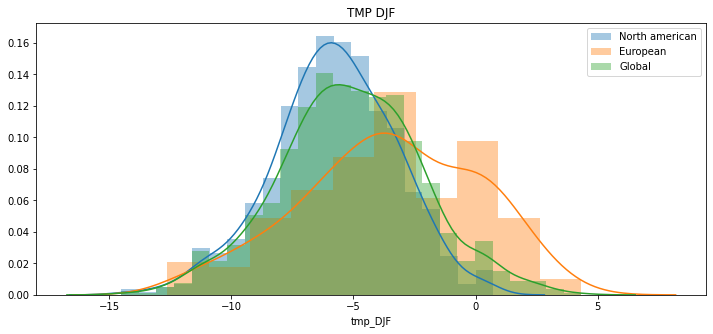

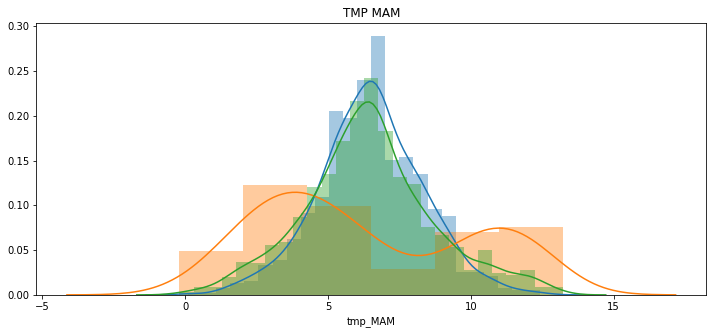

In [25]:
graph.figure(figsize=(12,5))
graph.title('TMP DJF')
sns.distplot(drivers[drivers['lakecode'].isin(north_american_lakes)]['tmp_DJF'].dropna(), norm_hist=True, label='North american')
sns.distplot(drivers[drivers['lakecode'].isin(european_lakes)]['tmp_DJF'].dropna(), norm_hist=True, label='European')
sns.distplot(drivers[~drivers['lakecode'].isin(lakecodes_not_using)]['tmp_DJF'].dropna(), norm_hist=True, label='Global')
graph.legend()
graph.show()

graph.figure(figsize=(12,5))
graph.title('TMP MAM')
sns.distplot(drivers[drivers['lakecode'].isin(north_american_lakes)]['tmp_MAM'].dropna(), norm_hist=True, label='North american')
sns.distplot(drivers[drivers['lakecode'].isin(european_lakes)]['tmp_MAM'].dropna(), norm_hist=True, label='European')
sns.distplot(drivers[~drivers['lakecode'].isin(lakecodes_not_using)]['tmp_MAM'].dropna(), norm_hist=True, label='Global')
graph.show()

## Filtering to non freeze years, unusable lakes, ambiguous years

In [26]:
#RA1, RA3, german lakes

lakecodes_not_using = ['EK28', 'RA2', 'xKB1890', 'xKB1895', 'RA1', 'RA3']
drivers = drivers[~drivers['lakecode'].isin(lakecodes_not_using)]
drivers = drivers[drivers['FrozeYN'] != '-999']
drivers_no = drivers[drivers['FrozeYN'] == 'N']
drivers_extreme_no = drivers_no[~drivers_no['lakecode'].isin(lakecodes_not_using)]
# drivers_extreme_no = drivers[~drivers['lakecode'].isin(lakecodes_not_using)]
display(drivers_extreme_no.head())
print(len(drivers_extreme_no))

,lakecode,lake,start_year,end_year,FrozeYN,tmp_lagJJA,tmp_lagSON,tmp_DJF,tmp_MAM,pre_lagJJA,...,PDO mean A-DEC lag1,QBO mean A-DEC lag1,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,NAO mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1,TSI A-DEC lag1,ENSO paleo A-DEC lag1,Daily Total Sunspot Number mean A-DEC lag1
505,ARAI1,Lake Suwa,1948,1949,N,19.200000,10.333334,-1.300000,4.766667,550.90000,...,-0.874167,-6.252500,-0.232500,-0.095833,NaN,NaN,0.005000,1361.506348,-0.124,193.030055
518,ARAI1,Lake Suwa,1961,1962,N,19.800001,11.866667,-2.866667,6.100000,630.90000,...,-0.817500,4.416667,-0.010833,-0.305833,0.043333,-0.045167,0.088167,1360.995728,-0.873,76.430137
528,ARAI1,Lake Suwa,1971,1972,N,18.866667,9.200000,-2.066667,6.300000,600.90000,...,-1.290833,4.799167,1.072500,-0.989167,0.010000,0.006083,-0.326667,1361.040039,-1.466,94.400000
535,ARAI1,Lake Suwa,1978,1979,N,20.566668,10.000000,-1.300000,6.033333,380.80002,...,0.235833,6.806667,-0.287500,-0.292500,0.317500,-0.150333,-0.196833,1361.216187,0.270,130.991781
543,ARAI1,Lake Suwa,1986,1987,N,18.466667,9.933333,-2.133333,6.633334,501.30002,...,1.239167,-0.984167,-0.322500,-0.039167,0.503333,0.084833,-0.292000,1360.641724,-0.409,14.764384


142


## Lake data for different locations

In [27]:
# asian_data = drivers_extreme_no[drivers_extreme_no['lakecode'].isin(asian_lakes)]
# print(len(asian_data))

north_american_data = drivers_extreme_no[drivers_extreme_no['lakecode'].isin(north_american_lakes)]
print(len(north_american_data))

european_data = drivers_extreme_no[drivers_extreme_no['lakecode'].isin(european_lakes)]
print(len(european_data))

predicted_data = drivers_extreme_no[drivers_extreme_no['lakecode'].isin(predicted_lakes)]
print(len(predicted_data))

display(european_data.head())

106
15
130


,lakecode,lake,start_year,end_year,FrozeYN,tmp_lagJJA,tmp_lagSON,tmp_DJF,tmp_MAM,pre_lagJJA,...,PDO mean A-DEC lag1,QBO mean A-DEC lag1,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,NAO mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1,TSI A-DEC lag1,ENSO paleo A-DEC lag1,Daily Total Sunspot Number mean A-DEC lag1
3514,xKB1058,Lunz,2005,2006,N,14.266667,6.666666,-5.366667,4.900000,537.40000,...,0.375000,-17.126667,-0.456667,-0.173333,-0.267500,-0.37525,0.273833,1360.700439,NaN,45.802740
3521,xKB1058,Lunz,2012,2013,N,16.300000,7.600000,-3.433333,5.200000,459.80002,...,-1.100000,-20.786667,-0.180000,0.115833,-0.455833,-0.18150,0.195917,1361.192627,NaN,84.538251
3755,xKB1457,Ransfjorden,1988,1989,N,14.300000,3.400000,-2.500000,3.766667,383.00000,...,0.531667,1.557500,0.736667,-1.115833,-0.013333,0.04025,-0.022250,1361.119507,-0.730,122.997268
3756,xKB1457,Ransfjorden,1989,1990,N,13.066667,4.433333,-3.333333,4.766667,306.60000,...,-0.179167,-10.695833,0.616667,-0.621667,0.701667,0.95000,-0.100167,1361.643311,-1.475,211.052055
3773,xKB1457,Ransfjorden,2006,2007,N,15.300000,6.233334,-4.933333,4.133333,241.80000,...,0.190833,4.466667,-0.282500,0.133333,-0.207500,0.13775,0.249000,1360.679565,NaN,24.676712


In [28]:
# location_data = [asian_data, north_american_data, european_data]
# names_temp = ['asian_grouped', 'north_american_grouped', 'european_grouped']

# asian_grouped = pd.DataFrame(asian_data.groupby('start_year').mean())
# asian_grouped.reset_index(level=0, inplace=True)
# display(asian_grouped)

north_american_grouped = (pd.DataFrame(drivers[drivers['lakecode'].isin(north_american_lakes)].groupby('start_year').mean()))
north_american_grouped.reset_index(level=0, inplace=True)
display(north_american_grouped.head())

# north_american_grouped = pd.DataFrame(north_american_data.groupby('start_year').mean())
# north_american_grouped.reset_index(level=0, inplace=True)
# display(north_american_grouped.head())

european_grouped = (pd.DataFrame(drivers[drivers['lakecode'].isin(european_lakes)].groupby('start_year').mean()))
european_grouped.reset_index(level=0, inplace=True)
display(european_grouped.head())

predicted_grouped = (pd.DataFrame(drivers[drivers['lakecode'].isin(predicted_lakes)].groupby('start_year').mean()))
predicted_grouped.reset_index(level=0, inplace=True)
display(predicted_grouped.head())

,start_year,end_year,tmp_lagJJA,tmp_lagSON,tmp_DJF,tmp_MAM,pre_lagJJA,pre_lagSON,pre_DJF,pre_MAM,...,PDO mean A-DEC lag1,QBO mean A-DEC lag1,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,NAO mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1,TSI A-DEC lag1,ENSO paleo A-DEC lag1,Daily Total Sunspot Number mean A-DEC lag1
0,1939,1940,20.230000,9.030000,-6.380000,4.290000,238.500000,157.230002,136.600003,257.020006,...,0.065000,NaN,0.020000,-0.184167,NaN,NaN,0.104917,1361.091553,-1.740,147.956164
1,1940,1941,19.230000,8.386667,-5.720000,6.733333,299.320000,211.020004,149.900001,158.740000,...,1.769167,NaN,-1.524167,0.612500,NaN,NaN,-0.034083,1360.998535,-1.080,113.030055
2,1941,1942,19.943334,10.086667,-5.360000,8.093333,235.370006,259.760005,131.360002,239.090003,...,1.994167,NaN,-1.447500,1.021667,NaN,NaN,0.169250,1360.911377,1.902,79.161644
3,1942,1943,19.483334,9.000000,-7.353333,4.403333,275.090006,256.620004,180.630002,252.890004,...,0.465833,NaN,0.019167,-0.685833,NaN,NaN,0.178250,1360.791016,1.221,50.758904
4,1943,1944,20.286667,7.933334,-5.373333,5.560000,298.430001,217.180002,109.410001,221.090004,...,0.114167,NaN,0.355000,-0.424167,NaN,NaN,0.027667,1360.626099,-0.930,27.117808


,start_year,end_year,tmp_lagJJA,tmp_lagSON,tmp_DJF,tmp_MAM,pre_lagJJA,pre_lagSON,pre_DJF,pre_MAM,...,PDO mean A-DEC lag1,QBO mean A-DEC lag1,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,NAO mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1,TSI A-DEC lag1,ENSO paleo A-DEC lag1,Daily Total Sunspot Number mean A-DEC lag1
0,1939,1940,17.066667,7.916667,-6.650000,6.366667,301.650005,285.050005,157.650000,240.900005,...,0.065000,NaN,0.020000,-0.184167,NaN,NaN,0.104917,1361.091553,-1.740,147.956164
1,1940,1941,15.383333,8.683333,-4.383333,6.316667,405.700000,232.400000,161.950005,272.700000,...,1.769167,NaN,-1.524167,0.612500,NaN,NaN,-0.034083,1360.998535,-1.080,113.030055
2,1941,1942,16.050000,6.250000,-5.800000,6.516667,353.950000,232.550000,171.450005,248.000000,...,1.994167,NaN,-1.447500,1.021667,NaN,NaN,0.169250,1360.911377,1.902,79.161644
3,1942,1943,16.500000,9.783333,-1.600000,8.333334,247.300010,147.950000,109.600000,156.050000,...,0.465833,NaN,0.019167,-0.685833,NaN,NaN,0.178250,1360.791016,1.221,50.758904
4,1943,1944,16.883333,9.066667,-1.100000,6.416666,318.400000,179.000000,165.600000,254.500000,...,0.114167,NaN,0.355000,-0.424167,NaN,NaN,0.027667,1360.626099,-0.930,27.117808


,start_year,end_year,tmp_lagJJA,tmp_lagSON,tmp_DJF,tmp_MAM,pre_lagJJA,pre_lagSON,pre_DJF,pre_MAM,...,PDO mean A-DEC lag1,QBO mean A-DEC lag1,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,NAO mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1,TSI A-DEC lag1,ENSO paleo A-DEC lag1,Daily Total Sunspot Number mean A-DEC lag1
0,1939,1940,19.442857,8.680953,-6.357143,4.647619,264.957144,196.757146,128.042861,243.685723,...,0.065000,NaN,0.020000,-0.184167,NaN,NaN,0.104917,1361.091553,-1.740,147.956164
1,1940,1941,18.347620,8.514286,-5.504762,6.266667,286.971429,233.685719,135.128571,175.742860,...,1.769167,NaN,-1.524167,0.612500,NaN,NaN,-0.034083,1360.998535,-1.080,113.030055
2,1941,1942,18.800000,8.990476,-5.528571,7.361905,297.657156,235.742863,134.971430,240.142859,...,1.994167,NaN,-1.447500,1.021667,NaN,NaN,0.169250,1360.911377,1.902,79.161644
3,1942,1943,18.947619,8.990476,-6.476191,4.642857,255.071434,244.042859,150.042857,203.728573,...,0.465833,NaN,0.019167,-0.685833,NaN,NaN,0.178250,1360.791016,1.221,50.758904
4,1943,1944,19.309524,8.361905,-5.233333,5.252381,305.485714,258.928573,108.628572,205.771434,...,0.114167,NaN,0.355000,-0.424167,NaN,NaN,0.027667,1360.626099,-0.930,27.117808


In [29]:
# grouped_years = (pd.DataFrame(drivers_extreme_no.groupby('start_year').mean()))
grouped_years = (pd.DataFrame(drivers[~drivers['lakecode'].isin(lakecodes_not_using)].groupby('start_year').mean()))

grouped_years.reset_index(level=0, inplace=True)
display(grouped_years.head())

# drivers = drivers[~drivers_no['lakecode'].isin(lakecodes_not_using)]
# drivers_no = drivers[drivers['FrozeYN'] == 'N']
# drivers_extreme_no = drivers_no[~drivers_no['lakecode'].isin(lakecodes_not_using)]

,start_year,end_year,tmp_lagJJA,tmp_lagSON,tmp_DJF,tmp_MAM,pre_lagJJA,pre_lagSON,pre_DJF,pre_MAM,...,PDO mean A-DEC lag1,QBO mean A-DEC lag1,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,NAO mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1,TSI A-DEC lag1,ENSO paleo A-DEC lag1,Daily Total Sunspot Number mean A-DEC lag1
0,1939,1940,19.669231,9.012821,-6.264103,4.707692,263.892308,194.330771,135.815387,249.861544,...,0.065000,NaN,0.020000,-0.184167,NaN,NaN,0.104917,1361.091553,-1.740,147.956164
1,1940,1941,18.584616,8.592308,-5.292308,6.584616,326.238462,217.661542,148.323078,190.046155,...,1.769167,NaN,-1.524167,0.612500,NaN,NaN,-0.034083,1360.998535,-1.080,113.030055
2,1941,1942,19.189744,9.469231,-5.320513,7.710256,284.838470,262.546159,136.323080,243.692310,...,1.994167,NaN,-1.447500,1.021667,NaN,NaN,0.169250,1360.911377,1.902,79.161644
3,1942,1943,19.048718,9.176923,-6.251282,5.025641,280.307698,249.438465,164.084617,234.776926,...,0.465833,NaN,0.019167,-0.685833,NaN,NaN,0.178250,1360.791016,1.221,50.758904
4,1943,1944,19.671795,8.294872,-4.630769,5.605128,308.207693,227.138463,115.330770,232.100005,...,0.114167,NaN,0.355000,-0.424167,NaN,NaN,0.027667,1360.626099,-0.930,27.117808


In [30]:
all_columns = list(drivers_extreme_no.columns)
print(all_columns)

['lakecode', 'lake', 'start_year', 'end_year', 'FrozeYN', 'tmp_lagJJA', 'tmp_lagSON', 'tmp_DJF', 'tmp_MAM', 'pre_lagJJA', 'pre_lagSON', 'pre_DJF', 'pre_MAM', 'cld_lagJJA', 'cld_lagSON', 'cld_DJF', 'cld_MAM', 'SIS_lagJJA', 'SIS_lagSON', 'SIS_DJF', 'SIS_MAM', 'cfc_lagJJA', 'cfc_lagSON', 'cfc_DJF', 'cfc_MAM', 'Latitude', 'Longitude', 'Country', 'HydroLAKES_id', 'Contributor', 'Source', 'HydroLAKES_Lake_name', 'HydroLAKES_Country', 'HydroLAKES_Continent', 'HydroLAKES_Poly_src', 'HydroLAKES_Lake_type', 'HydroLAKES_Grand_id', 'HydroLAKES_Lake_area', 'HydroLAKES_Shore_len', 'HydroLAKES_Shore_dev', 'HydroLAKES_Vol_total', 'HydroLAKES_Vol_res', 'HydroLAKES_Vol_src', 'HydroLAKES_Depth_avg', 'HydroLAKES_Dis_avg', 'HydroLAKES_Res_time', 'HydroLAKES_Elevation', 'HydroLAKES_Slope_100', 'HydroLAKES_Wshd_area', 'HydroLAKES_Pour_long', 'HydroLAKES_Pour_lat', 'LIAG_lakename', 'LIAG_lakeorriver', 'LIAG_continent', 'LIAG_country', 'LIAG_state', 'LIAG_latitude', 'LIAG_longitude', 'LIAG_elevation', 'LIAG_me

## Calculate number of extreme years and proportion

In [31]:
indices = np.arange(1939, 2019, 1)

In [32]:
extreme_years_freq = pd.DataFrame(drivers_extreme_no['start_year'].value_counts().reindex(index=indices, 
                                                                                          fill_value=0).sort_index())
all_years_counts = pd.DataFrame(drivers['start_year'].value_counts().sort_index())

year_counts = pd.merge(extreme_years_freq, all_years_counts, left_index=True, right_index=True)
year_counts.reset_index(level=0, inplace=True)

year_counts.rename(columns={'index': 'start_year', 'start_year_x': 'no_freeze_count', 'start_year_y': 'all_counts'}, 
                   inplace=True)
year_counts['proportion'] = year_counts['no_freeze_count'] / year_counts['all_counts'] * 100
display(year_counts.tail(10))

# years_climate= pd.merge(year_counts, suwa_proxy_climate, on='start_year')

years_climate= pd.merge(year_counts, grouped_years, on='start_year')
years_climate.replace(-999, np.nan, inplace=True)
years_climate.drop(columns=['all_counts'], inplace=True)
# all_years_counts = pd.DataFrame(drivers['start_year'].value_counts().sort_index())
display(years_climate.head())

# display(all_years_counts.tail(5))
# display(extreme_years_freq.tail(5))

,start_year,no_freeze_count,all_counts,proportion
70,2009,4,14,28.571429
71,2010,2,14,14.285714
72,2011,7,14,50.000000
73,2012,4,14,28.571429
74,2013,2,14,14.285714
75,2014,3,14,21.428571
76,2015,7,13,53.846154
77,2016,6,13,46.153846
78,2017,2,9,22.222222
79,2018,1,8,12.500000


,start_year,no_freeze_count,proportion,end_year,tmp_lagJJA,tmp_lagSON,tmp_DJF,tmp_MAM,pre_lagJJA,pre_lagSON,...,PDO mean A-DEC lag1,QBO mean A-DEC lag1,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,NAO mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1,TSI A-DEC lag1,ENSO paleo A-DEC lag1,Daily Total Sunspot Number mean A-DEC lag1
0,1939,1,7.692308,1940,19.669231,9.012821,-6.264103,4.707692,263.892308,194.330771,...,0.065000,NaN,0.020000,-0.184167,NaN,NaN,0.104917,1361.091553,-1.740,147.956164
1,1940,0,0.000000,1941,18.584616,8.592308,-5.292308,6.584616,326.238462,217.661542,...,1.769167,NaN,-1.524167,0.612500,NaN,NaN,-0.034083,1360.998535,-1.080,113.030055
2,1941,0,0.000000,1942,19.189744,9.469231,-5.320513,7.710256,284.838470,262.546159,...,1.994167,NaN,-1.447500,1.021667,NaN,NaN,0.169250,1360.911377,1.902,79.161644
3,1942,0,0.000000,1943,19.048718,9.176923,-6.251282,5.025641,280.307698,249.438465,...,0.465833,NaN,0.019167,-0.685833,NaN,NaN,0.178250,1360.791016,1.221,50.758904
4,1943,0,0.000000,1944,19.671795,8.294872,-4.630769,5.605128,308.207693,227.138463,...,0.114167,NaN,0.355000,-0.424167,NaN,NaN,0.027667,1360.626099,-0.930,27.117808


In [33]:
# North American

extreme_years_freq_north_american = pd.DataFrame(north_american_data['start_year'].value_counts().reindex(index=indices, 
                                                                                          fill_value=0).sort_index())
all_years_counts_north_american =  pd.DataFrame(drivers[drivers['lakecode'].isin(north_american_lakes)]['start_year'].value_counts().sort_index())

year_counts_north_american = pd.merge(extreme_years_freq_north_american, all_years_counts_north_american, left_index=True, right_index=True)
year_counts_north_american.reset_index(level=0, inplace=True)
year_counts_north_american.rename(columns={'index': 'start_year', 'start_year_x': 'no_freeze_count', 'start_year_y': 'all_counts'}, inplace=True)
year_counts_north_american['proportion'] = year_counts_north_american['no_freeze_count'] / year_counts_north_american['all_counts'] * 100
display(year_counts_north_american.tail(10))

# years_climate= pd.merge(year_counts, suwa_proxy_climate, on='start_year')

years_climate_north_american= pd.merge(year_counts_north_american, north_american_grouped, on='start_year')
years_climate_north_american.replace(-999, np.nan, inplace=True)
years_climate_north_american.drop(columns=['all_counts'], inplace=True)
display(years_climate_north_american.head())

,start_year,no_freeze_count,all_counts,proportion
70,2009,3,10,30.0
71,2010,2,10,20.0
72,2011,7,10,70.0
73,2012,3,10,30.0
74,2013,0,10,0.0
75,2014,0,10,0.0
76,2015,5,10,50.0
77,2016,5,10,50.0
78,2017,2,8,25.0
79,2018,0,7,0.0


,start_year,no_freeze_count,proportion,end_year,tmp_lagJJA,tmp_lagSON,tmp_DJF,tmp_MAM,pre_lagJJA,pre_lagSON,...,PDO mean A-DEC lag1,QBO mean A-DEC lag1,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,NAO mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1,TSI A-DEC lag1,ENSO paleo A-DEC lag1,Daily Total Sunspot Number mean A-DEC lag1
0,1939,1,10.0,1940,20.230000,9.030000,-6.380000,4.290000,238.500000,157.230002,...,0.065000,NaN,0.020000,-0.184167,NaN,NaN,0.104917,1361.091553,-1.740,147.956164
1,1940,0,0.0,1941,19.230000,8.386667,-5.720000,6.733333,299.320000,211.020004,...,1.769167,NaN,-1.524167,0.612500,NaN,NaN,-0.034083,1360.998535,-1.080,113.030055
2,1941,0,0.0,1942,19.943334,10.086667,-5.360000,8.093333,235.370006,259.760005,...,1.994167,NaN,-1.447500,1.021667,NaN,NaN,0.169250,1360.911377,1.902,79.161644
3,1942,0,0.0,1943,19.483334,9.000000,-7.353333,4.403333,275.090006,256.620004,...,0.465833,NaN,0.019167,-0.685833,NaN,NaN,0.178250,1360.791016,1.221,50.758904
4,1943,0,0.0,1944,20.286667,7.933334,-5.373333,5.560000,298.430001,217.180002,...,0.114167,NaN,0.355000,-0.424167,NaN,NaN,0.027667,1360.626099,-0.930,27.117808


In [34]:
# Predicted

extreme_years_freq_predicted = pd.DataFrame(predicted_data['start_year'].value_counts().reindex(index=indices, 
                                                                                          fill_value=0).sort_index())
all_years_counts_predicted =  pd.DataFrame(drivers[drivers['lakecode'].isin(predicted_lakes)]['start_year'].value_counts().sort_index())

year_counts_predicted = pd.merge(extreme_years_freq_predicted, all_years_counts_predicted, left_index=True, right_index=True)
year_counts_predicted.reset_index(level=0, inplace=True)
year_counts_predicted.rename(columns={'index': 'start_year', 'start_year_x': 'no_freeze_count', 'start_year_y': 'all_counts'}, inplace=True)
year_counts_predicted['proportion'] = year_counts_predicted['no_freeze_count'] / year_counts_predicted['all_counts'] * 100
display(year_counts_predicted.tail(10))

# years_climate= pd.merge(year_counts, suwa_proxy_climate, on='start_year')

years_climate_predicted= pd.merge(year_counts_predicted, predicted_grouped, on='start_year')
years_climate_predicted.replace(-999, np.nan, inplace=True)
years_climate_predicted.drop(columns=['all_counts'], inplace=True)
display(years_climate_predicted.head())

,start_year,no_freeze_count,all_counts,proportion
70,2009,4,8,50.0
71,2010,2,8,25.0
72,2011,5,8,62.5
73,2012,3,8,37.5
74,2013,2,8,25.0
75,2014,3,8,37.5
76,2015,7,8,87.5
77,2016,4,8,50.0
78,2017,2,5,40.0
79,2018,1,4,25.0


,start_year,no_freeze_count,proportion,end_year,tmp_lagJJA,tmp_lagSON,tmp_DJF,tmp_MAM,pre_lagJJA,pre_lagSON,...,PDO mean A-DEC lag1,QBO mean A-DEC lag1,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,NAO mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1,TSI A-DEC lag1,ENSO paleo A-DEC lag1,Daily Total Sunspot Number mean A-DEC lag1
0,1939,1,14.285714,1940,19.442857,8.680953,-6.357143,4.647619,264.957144,196.757146,...,0.065000,NaN,0.020000,-0.184167,NaN,NaN,0.104917,1361.091553,-1.740,147.956164
1,1940,0,0.000000,1941,18.347620,8.514286,-5.504762,6.266667,286.971429,233.685719,...,1.769167,NaN,-1.524167,0.612500,NaN,NaN,-0.034083,1360.998535,-1.080,113.030055
2,1941,0,0.000000,1942,18.800000,8.990476,-5.528571,7.361905,297.657156,235.742863,...,1.994167,NaN,-1.447500,1.021667,NaN,NaN,0.169250,1360.911377,1.902,79.161644
3,1942,0,0.000000,1943,18.947619,8.990476,-6.476191,4.642857,255.071434,244.042859,...,0.465833,NaN,0.019167,-0.685833,NaN,NaN,0.178250,1360.791016,1.221,50.758904
4,1943,0,0.000000,1944,19.309524,8.361905,-5.233333,5.252381,305.485714,258.928573,...,0.114167,NaN,0.355000,-0.424167,NaN,NaN,0.027667,1360.626099,-0.930,27.117808


In [35]:
# European

extreme_years_freq_european = pd.DataFrame(european_data['start_year'].value_counts().reindex(index=indices, 
                                                                                          fill_value=0).sort_index())
all_years_counts_european =  pd.DataFrame(drivers[drivers['lakecode'].isin(european_lakes)]['start_year'].value_counts().sort_index())

year_counts_european = pd.merge(extreme_years_freq_european, all_years_counts_european, left_index=True, right_index=True)
year_counts_european.reset_index(level=0, inplace=True)
year_counts_european.rename(columns={'index': 'start_year', 'start_year_x': 'no_freeze_count', 'start_year_y': 'all_counts'}, inplace=True)
year_counts_european['proportion'] = year_counts_european['no_freeze_count'] / year_counts_european['all_counts'] * 100
display(year_counts_european.tail(10))

# years_climate= pd.merge(year_counts, suwa_proxy_climate, on='start_year')

years_climate_european= pd.merge(year_counts_european, european_grouped, on='start_year')
years_climate_european.replace(-999, np.nan, inplace=True)
years_climate_european.drop(columns=['all_counts'], inplace=True)
display(years_climate_european.head())

,start_year,no_freeze_count,all_counts,proportion
68,2007,1,3,33.333333
69,2008,0,3,0.000000
70,2009,0,3,0.000000
71,2010,0,3,0.000000
72,2011,0,3,0.000000
73,2012,1,3,33.333333
74,2013,1,3,33.333333
75,2014,2,3,66.666667
76,2015,1,2,50.000000
77,2016,0,2,0.000000


,start_year,no_freeze_count,proportion,end_year,tmp_lagJJA,tmp_lagSON,tmp_DJF,tmp_MAM,pre_lagJJA,pre_lagSON,...,PDO mean A-DEC lag1,QBO mean A-DEC lag1,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,NAO mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1,TSI A-DEC lag1,ENSO paleo A-DEC lag1,Daily Total Sunspot Number mean A-DEC lag1
0,1939,0,0.0,1940,17.066667,7.916667,-6.650000,6.366667,301.650005,285.050005,...,0.065000,NaN,0.020000,-0.184167,NaN,NaN,0.104917,1361.091553,-1.740,147.956164
1,1940,0,0.0,1941,15.383333,8.683333,-4.383333,6.316667,405.700000,232.400000,...,1.769167,NaN,-1.524167,0.612500,NaN,NaN,-0.034083,1360.998535,-1.080,113.030055
2,1941,0,0.0,1942,16.050000,6.250000,-5.800000,6.516667,353.950000,232.550000,...,1.994167,NaN,-1.447500,1.021667,NaN,NaN,0.169250,1360.911377,1.902,79.161644
3,1942,0,0.0,1943,16.500000,9.783333,-1.600000,8.333334,247.300010,147.950000,...,0.465833,NaN,0.019167,-0.685833,NaN,NaN,0.178250,1360.791016,1.221,50.758904
4,1943,0,0.0,1944,16.883333,9.066667,-1.100000,6.416666,318.400000,179.000000,...,0.114167,NaN,0.355000,-0.424167,NaN,NaN,0.027667,1360.626099,-0.930,27.117808


In [36]:
# lakes_years_proportion_including_german = year_counts.copy()
# display(lakes_years_proportion_including_german.head())

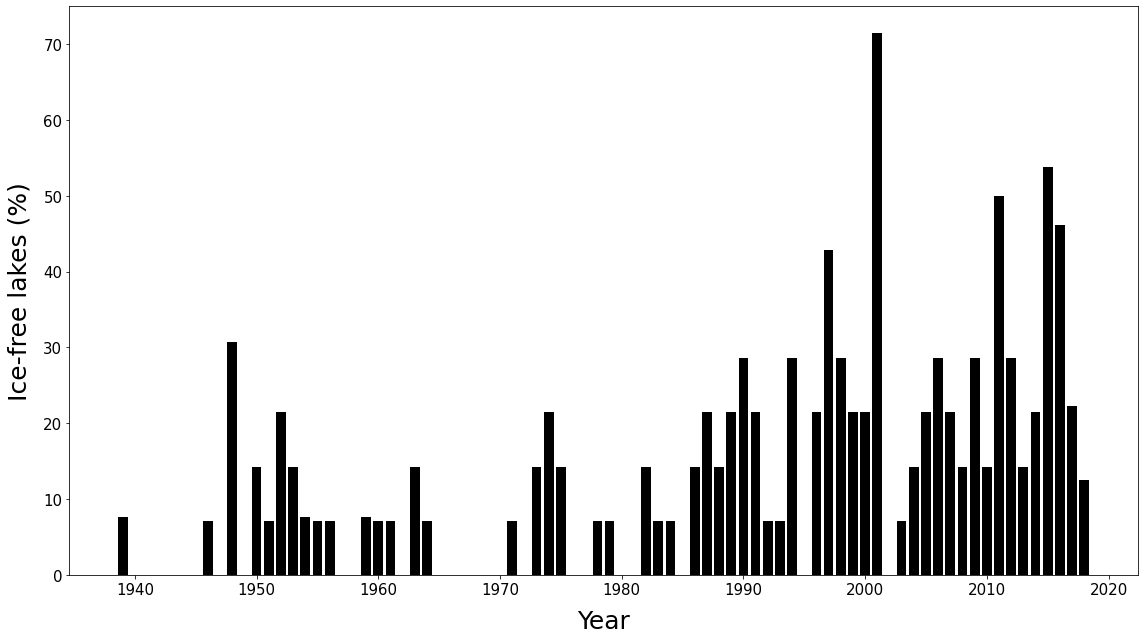

In [37]:
# graph.style.use('grayscale')
graph.figure(figsize=(16,9))
# graph.title('Extreme Years Proportion', fontsize=20)
graph.bar(years_climate['start_year'], years_climate['proportion'], label='No german lake', color='black')
# graph.bar(lakes_years_proportion_including_german['start_year'], lakes_years_proportion_including_german['proportion'], 
#           label='Including german lake', alpha=0.5)
graph.xlabel('Year', fontsize=25, labelpad=12)
graph.ylabel('Ice-free lakes (%)', fontsize=25, labelpad=12)
# graph.xlim(1938, 2019)
graph.xticks(fontsize=15)
# graph.legend()
graph.yticks(fontsize=15)
graph.tight_layout()
# graph.savefig('/mnt/c/users/imrit/Downloads/Extreme_events_presentation/global_extreme_years_proportion_black_and_white.png')
graph.show()

In [38]:
display(years_climate.tail(25))

,start_year,no_freeze_count,proportion,end_year,tmp_lagJJA,tmp_lagSON,tmp_DJF,tmp_MAM,pre_lagJJA,pre_lagSON,...,PDO mean A-DEC lag1,QBO mean A-DEC lag1,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,NAO mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1,TSI A-DEC lag1,ENSO paleo A-DEC lag1,Daily Total Sunspot Number mean A-DEC lag1
55,1994,4,28.571429,1995,19.414286,9.823810,-3.416667,6.359524,303.835717,212.200002,...,-0.151667,-13.666667,-1.353333,0.041667,0.575833,0.532417,-0.194167,1360.741943,-1.652,44.884932
56,1995,0,0.000000,1996,20.133334,8.142857,-6.290476,5.097619,283.078575,276.592862,...,0.642500,7.820833,-0.335833,-0.259167,-0.080833,-0.274583,0.117500,1360.731689,0.531,25.073973
57,1996,3,21.428571,1997,18.816667,8.219048,-4.364286,5.261905,308.735719,268.628574,...,0.640833,-16.061667,0.562500,-0.447500,-0.214167,-0.456333,-0.075583,1360.676270,-0.758,11.560109
58,1997,6,42.857143,1998,18.623810,8.057143,-1.940476,7.969048,300.371436,206.200001,...,1.460833,7.863333,-1.288333,1.619167,-0.156667,-0.039667,0.034250,1360.807251,-0.393,28.936986
59,1998,4,28.571429,1999,18.888096,9.471429,-3.566667,7.245238,337.464298,236.028573,...,0.245833,-12.828333,-0.224167,0.588333,-0.480833,-0.271000,0.354750,1361.175903,0.977,88.257534
60,1999,3,21.428571,2000,19.402381,9.704762,-3.788095,7.690476,315.964292,234.635717,...,-1.063333,10.173333,0.786667,-0.865000,0.390833,0.112500,0.100083,1361.479980,1.434,136.328767
61,2000,3,21.428571,2001,18.316667,9.195238,-5.569048,6.738095,318.550002,240.742860,...,-0.590000,-6.492500,0.722500,-0.701667,0.206667,-0.046417,0.010417,1361.660278,-1.019,173.857924
62,2001,10,71.428571,2002,19.171429,9.690476,-1.985714,6.438095,278.850001,238.314287,...,-0.562500,-15.238333,-0.078333,-0.389167,-0.182500,-0.161500,0.101333,1361.568604,0.065,170.408219
63,2002,0,0.000000,2003,19.859524,8.559524,-6.195238,6.164286,305.192859,252.464289,...,0.220833,8.715000,-0.723333,0.390000,0.039167,0.071583,0.047167,1361.633179,-1.078,163.561644
64,2003,1,7.142857,2004,19.300000,8.973810,-5.130952,7.326191,285.664291,279.778573,...,0.969167,-13.811667,-0.426667,0.054167,0.097500,0.152083,0.213417,1361.128296,NaN,99.273973


In [39]:
first_season_max_year = 1977
final_year = 2016

first_season = years_climate.loc[years_climate['start_year'] <= first_season_max_year]
display(first_season.tail())
print(f"Number no freeze events from {first_season['start_year'].min()} to {first_season['start_year'].max()}: {first_season['no_freeze_count'].sum()}")

second_season = years_climate.loc[(years_climate['start_year'] > first_season_max_year) & 
                                  (years_climate['start_year'] <= final_year)]
display(second_season.tail())
print(f"Number no freeze events from {second_season['start_year'].min()} to {second_season['start_year'].max()}: {second_season['no_freeze_count'].sum()}")
    

,start_year,no_freeze_count,proportion,end_year,tmp_lagJJA,tmp_lagSON,tmp_DJF,tmp_MAM,pre_lagJJA,pre_lagSON,...,PDO mean A-DEC lag1,QBO mean A-DEC lag1,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,NAO mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1,TSI A-DEC lag1,ENSO paleo A-DEC lag1,Daily Total Sunspot Number mean A-DEC lag1
34,1973,2,14.285714,1974,19.535715,8.819048,-4.852381,6.042857,268.292860,223.942858,...,-0.804167,4.404167,0.640000,-0.635833,-0.086667,0.240667,-0.231333,1360.864746,2.052,54.126027
35,1974,3,21.428571,1975,18.309524,7.711905,-3.683333,5.685714,316.707146,230.871429,...,-0.336667,-13.422500,0.959167,-0.616667,0.180833,-0.202583,-0.436583,1360.770996,-1.747,49.216438
36,1975,2,14.285714,1976,19.050000,9.307143,-5.002381,6.416667,344.678576,253.214287,...,-1.101667,1.249167,1.328333,-0.852500,-0.074167,0.434333,-0.315250,1360.715454,1.212,22.498630
37,1976,0,0.000000,1977,18.714286,6.935714,-7.597619,8.311905,281.778575,217.192859,...,0.008333,0.853333,0.058333,0.228333,0.187500,-0.030750,-0.380417,1360.694580,-0.094,18.415301
38,1977,0,0.000000,1978,18.190477,8.719048,-7.109524,5.523810,293.500000,295.664290,...,0.230833,-11.269167,-1.135000,0.250000,-0.335833,-0.432333,-0.206250,1360.890503,-1.576,39.320548


Number no freeze events from 1939 to 1977: 31


,start_year,no_freeze_count,proportion,end_year,tmp_lagJJA,tmp_lagSON,tmp_DJF,tmp_MAM,pre_lagJJA,pre_lagSON,...,PDO mean A-DEC lag1,QBO mean A-DEC lag1,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,NAO mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1,TSI A-DEC lag1,ENSO paleo A-DEC lag1,Daily Total Sunspot Number mean A-DEC lag1
73,2012,4,28.571429,2013,20.271429,9.257143,-3.842857,6.254762,285.114290,244.921432,...,-1.100000,-20.786667,-0.180000,0.115833,-0.455833,-0.181500,0.195917,1361.192627,NaN,84.538251
74,2013,2,14.285714,2014,19.561905,9.107143,-6.173810,6.130953,345.300004,247.857144,...,-0.517500,9.058333,0.345833,-0.331667,0.210000,0.001000,0.149000,1361.263062,NaN,94.021918
75,2014,3,21.428571,2015,19.114286,9.128572,-5.974359,7.228205,361.514290,255.435716,...,1.130833,-9.097500,-0.381667,0.353333,0.186667,-0.066667,0.084583,1361.386230,NaN,113.345206
76,2015,7,53.846154,2016,19.505129,10.925641,-2.002564,7.843590,331.600000,263.876926,...,1.634167,-4.162500,-1.174167,1.497500,0.433333,0.629583,0.096833,1361.409790,NaN,69.816438
77,2016,6,46.153846,2017,20.443590,10.987180,-2.392593,7.159259,298.561542,257.830771,...,1.542500,7.918333,-0.456667,0.395833,-0.038333,-0.114250,0.325583,1360.951904,NaN,39.822404


Number no freeze events from 1978 to 2016: 108


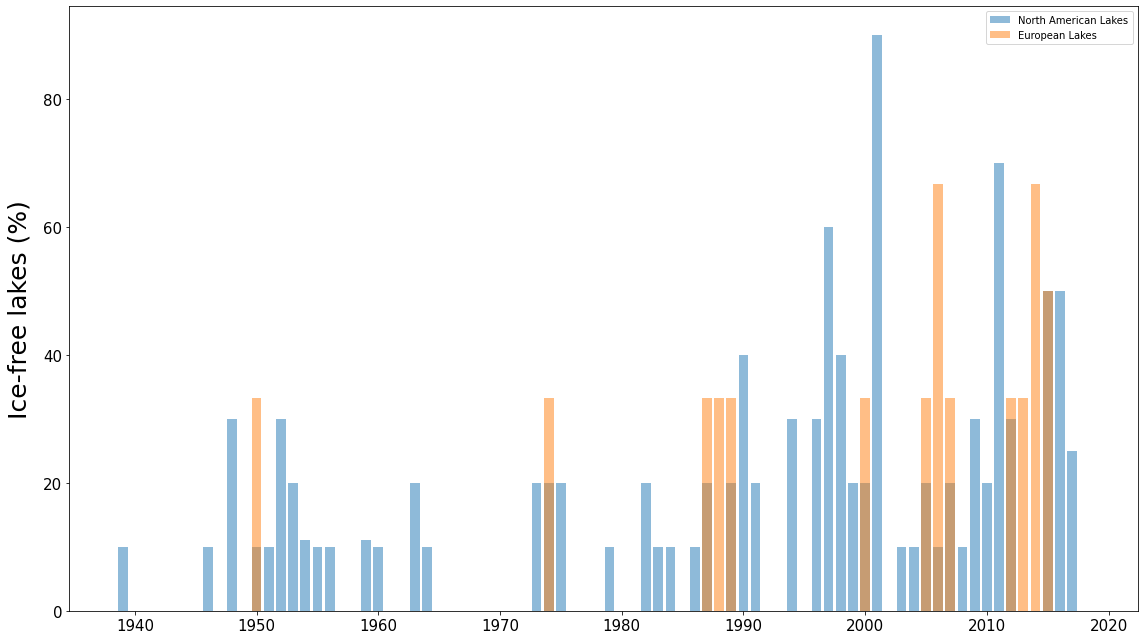

In [40]:
# graph.style.use('grayscale')
graph.figure(figsize=(16,9))
# graph.title('Extreme Years Proportion', fontsize=20)
graph.bar(years_climate_north_american['start_year'], years_climate_north_american['proportion'], 
          label='North American Lakes', alpha=0.5)
graph.bar(years_climate_european['start_year'], years_climate_european['proportion'], 
          label='European Lakes', alpha=0.5)
# graph.bar(lakes_years_proportion_including_german['start_year'], lakes_years_proportion_including_german['proportion'], 
#           label='Including german lake', alpha=0.5)
# graph.xlabel('Year', fontsize=25, labelpad=12)
graph.ylabel('Ice-free lakes (%)', fontsize=25, labelpad=12)
# graph.xlim(1938, 2019)
graph.xticks(fontsize=15)
graph.legend()
graph.yticks(fontsize=15)
graph.tight_layout()
# graph.savefig('/mnt/c/users/imrit/Downloads/Extreme_events_presentation/global_extreme_years_proportion_black_and_white.png')
graph.show()

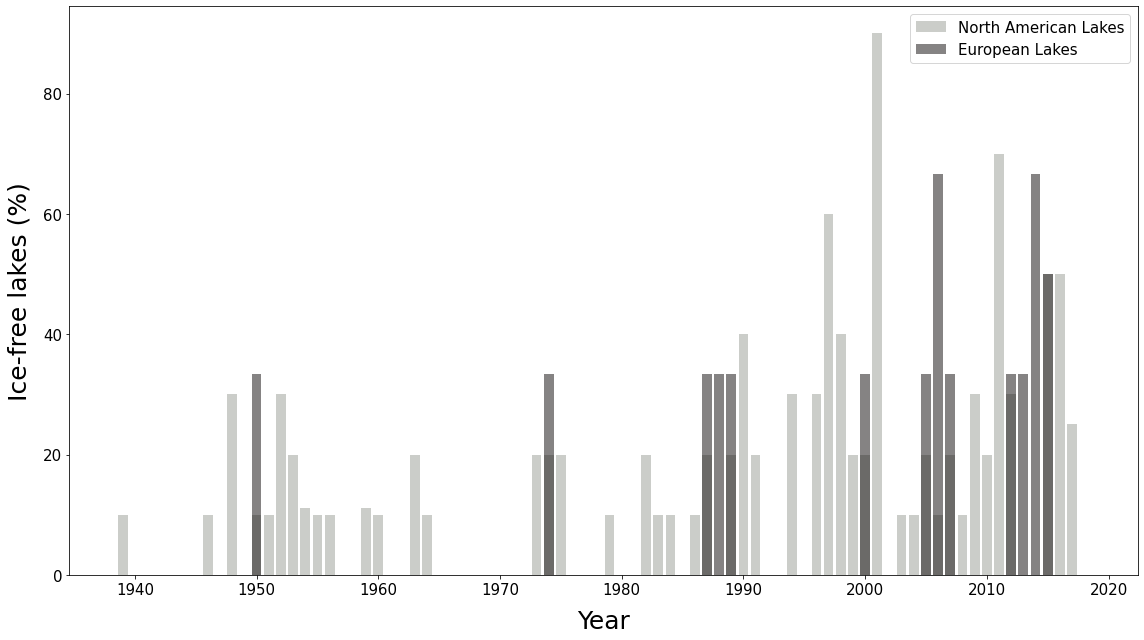

In [41]:
graph.figure(figsize=(16, 9))
# graph.title('Extreme Years Proportion North American and European Lakes', fontsize=20)
graph.bar(year_counts_north_american['start_year'], year_counts_north_american['proportion'], 
          alpha=0.5, label='North American Lakes', color='#989C94')
graph.bar(year_counts_european['start_year'], year_counts_european['proportion'], alpha=0.5, 
          label='European Lakes', color='#0D0809')
# graph.bar(lakes_years_proportion_including_german['start_year'], lakes_years_proportion_including_german['proportion'], 
#           label='Including german lake', alpha=0.5)
graph.xlabel('Year', fontsize=25, labelpad=12)
graph.ylabel('Ice-free lakes (%)', fontsize=25, labelpad=12)
# graph.xlim(1938, 2019)
graph.xticks(fontsize=15)
graph.legend(fontsize=15)
graph.yticks(fontsize=15)
graph.tight_layout()
# graph.savefig('/mnt/c/users/imrit/Downloads/Extreme_events_presentation/european_north_american_extreme_years_proportion_black_and_white.png')
graph.show()

In [42]:
display(years_climate.head())
display(years_climate.tail())

,start_year,no_freeze_count,proportion,end_year,tmp_lagJJA,tmp_lagSON,tmp_DJF,tmp_MAM,pre_lagJJA,pre_lagSON,...,PDO mean A-DEC lag1,QBO mean A-DEC lag1,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,NAO mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1,TSI A-DEC lag1,ENSO paleo A-DEC lag1,Daily Total Sunspot Number mean A-DEC lag1
0,1939,1,7.692308,1940,19.669231,9.012821,-6.264103,4.707692,263.892308,194.330771,...,0.065000,NaN,0.020000,-0.184167,NaN,NaN,0.104917,1361.091553,-1.740,147.956164
1,1940,0,0.000000,1941,18.584616,8.592308,-5.292308,6.584616,326.238462,217.661542,...,1.769167,NaN,-1.524167,0.612500,NaN,NaN,-0.034083,1360.998535,-1.080,113.030055
2,1941,0,0.000000,1942,19.189744,9.469231,-5.320513,7.710256,284.838470,262.546159,...,1.994167,NaN,-1.447500,1.021667,NaN,NaN,0.169250,1360.911377,1.902,79.161644
3,1942,0,0.000000,1943,19.048718,9.176923,-6.251282,5.025641,280.307698,249.438465,...,0.465833,NaN,0.019167,-0.685833,NaN,NaN,0.178250,1360.791016,1.221,50.758904
4,1943,0,0.000000,1944,19.671795,8.294872,-4.630769,5.605128,308.207693,227.138463,...,0.114167,NaN,0.355000,-0.424167,NaN,NaN,0.027667,1360.626099,-0.930,27.117808


,start_year,no_freeze_count,proportion,end_year,tmp_lagJJA,tmp_lagSON,tmp_DJF,tmp_MAM,pre_lagJJA,pre_lagSON,...,PDO mean A-DEC lag1,QBO mean A-DEC lag1,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,NAO mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1,TSI A-DEC lag1,ENSO paleo A-DEC lag1,Daily Total Sunspot Number mean A-DEC lag1
75,2014,3,21.428571,2015,19.114286,9.128572,-5.974359,7.228205,361.514290,255.435716,...,1.130833,-9.097500,-0.381667,0.353333,0.186667,-0.066667,0.084583,1361.386230,NaN,113.345206
76,2015,7,53.846154,2016,19.505129,10.925641,-2.002564,7.843590,331.600000,263.876926,...,1.634167,-4.162500,-1.174167,1.497500,0.433333,0.629583,0.096833,1361.409790,NaN,69.816438
77,2016,6,46.153846,2017,20.443590,10.987180,-2.392593,7.159259,298.561542,257.830771,...,1.542500,7.918333,-0.456667,0.395833,-0.038333,-0.114250,0.325583,1360.951904,NaN,39.822404
78,2017,2,22.222222,2018,19.596297,10.896297,NaN,NaN,352.044449,252.844444,...,0.517500,-2.460833,0.109167,-0.236667,0.225833,0.256250,0.298833,1360.659668,NaN,21.739726
79,2018,1,12.500000,2019,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-15.254167,0.066667,-0.020833,1.083333,0.202917,0.051917,1360.638672,NaN,6.972603


In [43]:
df_selected_columns = years_climate[years_climate.columns.intersection(sapna_columns)]
display(df_selected_columns.head())

north_american_selected_columns = years_climate_north_american[years_climate_north_american.columns.intersection(sapna_columns)]
display(north_american_selected_columns.head())

european_selected_columns = years_climate_european[years_climate_european.columns.intersection(sapna_columns)]
display(european_selected_columns.head())

eurasian_selected_columns = years_climate_eurasian[years_climate_eurasian.columns.intersection(sapna_columns)]
display(eurasian_selected_columns.head())

,start_year,no_freeze_count,proportion,tmp_DJF,tmp_MAM,cld_lagSON,cld_DJF,cfc_lagJJA,cfc_lagSON,AMO mean A-DEC,NAO mean DJF,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1
0,1939,1,7.692308,-6.264103,4.707692,63.653848,71.846155,NaN,NaN,-0.034083,NaN,0.020000,-0.184167,NaN,0.104917
1,1940,0,0.000000,-5.292308,6.584616,66.035899,73.174359,NaN,NaN,0.169250,NaN,-1.524167,0.612500,NaN,-0.034083
2,1941,0,0.000000,-5.320513,7.710256,66.158977,72.256411,NaN,NaN,0.178250,NaN,-1.447500,1.021667,NaN,0.169250
3,1942,0,0.000000,-6.251282,5.025641,63.510258,70.405129,NaN,NaN,0.027667,NaN,0.019167,-0.685833,NaN,0.178250
4,1943,0,0.000000,-4.630769,5.605128,66.310257,69.084618,NaN,NaN,0.343333,NaN,0.355000,-0.424167,NaN,0.027667


,start_year,no_freeze_count,proportion,tmp_DJF,tmp_MAM,cld_lagSON,cld_DJF,cfc_lagJJA,cfc_lagSON,AMO mean A-DEC,NAO mean DJF,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1
0,1939,1,10.0,-6.380000,4.290000,62.976668,74.160001,NaN,NaN,-0.034083,NaN,0.020000,-0.184167,NaN,0.104917
1,1940,0,0.0,-5.720000,6.733333,67.136668,73.933334,NaN,NaN,0.169250,NaN,-1.524167,0.612500,NaN,-0.034083
2,1941,0,0.0,-5.360000,8.093333,66.633336,73.740000,NaN,NaN,0.178250,NaN,-1.447500,1.021667,NaN,0.169250
3,1942,0,0.0,-7.353333,4.403333,64.766669,72.046668,NaN,NaN,0.027667,NaN,0.019167,-0.685833,NaN,0.178250
4,1943,0,0.0,-5.373333,5.560000,67.113334,68.880003,NaN,NaN,0.343333,NaN,0.355000,-0.424167,NaN,0.027667


,start_year,no_freeze_count,proportion,tmp_DJF,tmp_MAM,cld_lagSON,cld_DJF,cfc_lagJJA,cfc_lagSON,AMO mean A-DEC,NAO mean DJF,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1
0,1939,0,0.0,-6.650000,6.366667,63.416668,69.466670,NaN,NaN,-0.034083,NaN,0.020000,-0.184167,NaN,0.104917
1,1940,0,0.0,-4.383333,6.316667,62.300002,79.666664,NaN,NaN,0.169250,NaN,-1.524167,0.612500,NaN,-0.034083
2,1941,0,0.0,-5.800000,6.516667,62.633335,71.166668,NaN,NaN,0.178250,NaN,-1.447500,1.021667,NaN,0.169250
3,1942,0,0.0,-1.600000,8.333334,54.933335,70.616665,NaN,NaN,0.027667,NaN,0.019167,-0.685833,NaN,0.178250
4,1943,0,0.0,-1.100000,6.416666,58.983333,76.766671,NaN,NaN,0.343333,NaN,0.355000,-0.424167,NaN,0.027667


NameError: name 'years_climate_eurasian' is not defined

In [44]:
final_columns_global_march_3 = ['tmp_DJF', 'tmp_MAM', 'tmp_lagSON', 'AO mean A-DEC lag1', 'AMO mean A-DEC', 'tmp_lagJJA', 'NINO3 mean A-APR', 
                 'NAO mean A-DEC lag1']

In [45]:
df = years_climate[years_climate.columns.intersection(final_columns_global_march_3)]

empty_df = []
for var in final_columns_global_march_3:
    df_2 = years_climate[['proportion', var]]
    df_2.dropna(inplace=True)
    stats_corr = stats.pearsonr(df_2['proportion'], df_2[var])
    correlation = stats_corr[0]
    p_value = stats_corr[1]
    empty_df.append([var, correlation, p_value])

corr_p = pd.DataFrame(empty_df)
corr_p
# stats.pearsonr(df['proportion'], df['tmp_DJF'].dropna())

/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,0,1,2
0,tmp_DJF,0.774437,9.035942e-17
1,tmp_MAM,0.417197,1.447465e-04
2,tmp_lagSON,0.501821,2.459348e-06
3,AO mean A-DEC lag1,0.349088,3.283627e-03
4,AMO mean A-DEC,0.337631,2.192686e-03
5,tmp_lagJJA,0.326367,3.331149e-03
6,NINO3 mean A-APR,0.177879,1.144325e-01
7,NAO mean A-DEC lag1,0.131881,2.800532e-01


In [46]:
years_climate.sort_values(by='proportion', ascending=False, inplace=True)
years_climate.head(20)

,start_year,no_freeze_count,proportion,end_year,tmp_lagJJA,tmp_lagSON,tmp_DJF,tmp_MAM,pre_lagJJA,pre_lagSON,...,PDO mean A-DEC lag1,QBO mean A-DEC lag1,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,NAO mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1,TSI A-DEC lag1,ENSO paleo A-DEC lag1,Daily Total Sunspot Number mean A-DEC lag1
62,2001,10,71.428571,2002,19.171429,9.690476,-1.985714,6.438095,278.850001,238.314287,...,-0.562500,-15.238333,-0.078333,-0.389167,-0.182500,-0.161500,0.101333,1361.568604,0.065,170.408219
76,2015,7,53.846154,2016,19.505129,10.925641,-2.002564,7.843590,331.600000,263.876926,...,1.634167,-4.162500,-1.174167,1.497500,0.433333,0.629583,0.096833,1361.409790,NaN,69.816438
72,2011,7,50.000000,2012,19.835714,10.152381,-2.369048,9.300000,332.785715,277.785721,...,-1.230833,1.963333,1.395833,-0.612500,0.293333,0.525667,0.084583,1361.068970,NaN,80.841096
77,2016,6,46.153846,2017,20.443590,10.987180,-2.392593,7.159259,298.561542,257.830771,...,1.542500,7.918333,-0.456667,0.395833,-0.038333,-0.114250,0.325583,1360.951904,NaN,39.822404
58,1997,6,42.857143,1998,18.623810,8.057143,-1.940476,7.969048,300.371436,206.200001,...,1.460833,7.863333,-1.288333,1.619167,-0.156667,-0.039667,0.034250,1360.807251,-0.393,28.936986
9,1948,4,30.769231,1949,19.071795,10.010256,-3.453846,6.807693,277.569231,197.453847,...,-0.874167,-6.252500,-0.232500,-0.095833,NaN,NaN,0.005000,1361.506348,-0.124,193.030055
59,1998,4,28.571429,1999,18.888096,9.471429,-3.566667,7.245238,337.464298,236.028573,...,0.245833,-12.828333,-0.224167,0.588333,-0.480833,-0.271000,0.354750,1361.175903,0.977,88.257534
51,1990,4,28.571429,1991,18.923810,9.269048,-4.209524,8.035714,301.057147,292.492861,...,-0.355833,7.381667,-0.325833,-0.003333,0.594167,1.024250,-0.055667,1361.552124,-0.998,191.761644
55,1994,4,28.571429,1995,19.414286,9.823810,-3.416667,6.359524,303.835717,212.200002,...,-0.151667,-13.666667,-1.353333,0.041667,0.575833,0.532417,-0.194167,1360.741943,-1.652,44.884932
70,2009,4,28.571429,2010,18.295238,9.323810,-4.845238,8.642857,360.485722,222.892864,...,-0.612500,-3.490000,-0.131667,0.410000,-0.243333,-0.330333,0.021583,1360.606567,NaN,4.780822


In [47]:
final_columns_global_march_3

['tmp_DJF',
 'tmp_MAM',
 'tmp_lagSON',
 'AO mean A-DEC lag1',
 'AMO mean A-DEC',
 'tmp_lagJJA',
 'NINO3 mean A-APR',
 'NAO mean A-DEC lag1']

In [48]:
labels = ['Proportion', 'Winter temp', 'Spring temp', 'Fall temp', 'AO', 'AMO', 'Summer temp', 'NINO3', 'NAO']

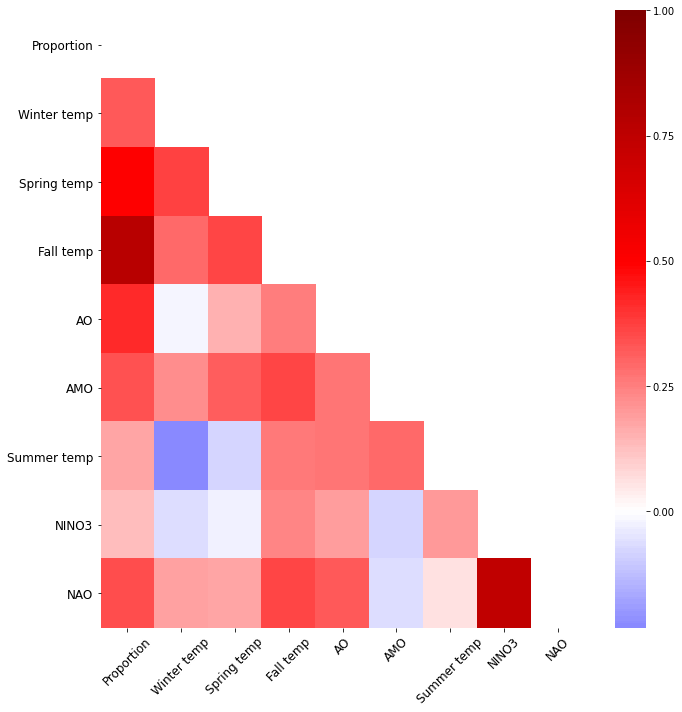

In [49]:
test_df = years_climate[years_climate.columns.intersection(final_columns_global_march_3 + ['proportion'])]
test_df_corr = test_df.corr()

mask = np.zeros_like(test_df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

graph.figure(figsize=(10, 10))
cmap = "seismic"
sns.heatmap(test_df_corr, center=0, mask=mask, xticklabels=labels, yticklabels=labels, cmap=cmap)
graph.xticks(fontsize=12, rotation=45)
graph.yticks(fontsize=12)
graph.tight_layout()
# graph.savefig('/mnt/c/users/imrit/Downloads/Sapna_sharma_lab/Extreme_events/Graphs/correlations.png', format='png', dpi=300, bbox_inches = "tight")
# sns.heatmap(climate_corr_european[['proportion', 'no_freeze_count']].sort_values(by='proportion', ascending=False), annot=True, center=0)
# graph.savefig('/home/arshad/Sapna_lab/heatmap_climate_correlation_european_lakes_jan_20_2020.png', format='png', dpi=400, bbox_inches = "tight")
graph.show()

In [29]:
# climate_corr_global.to_csv('/mnt/c/users/imrit/Downloads/Sapna_sharma_lab/climate_global_correlations.csv', index=False)

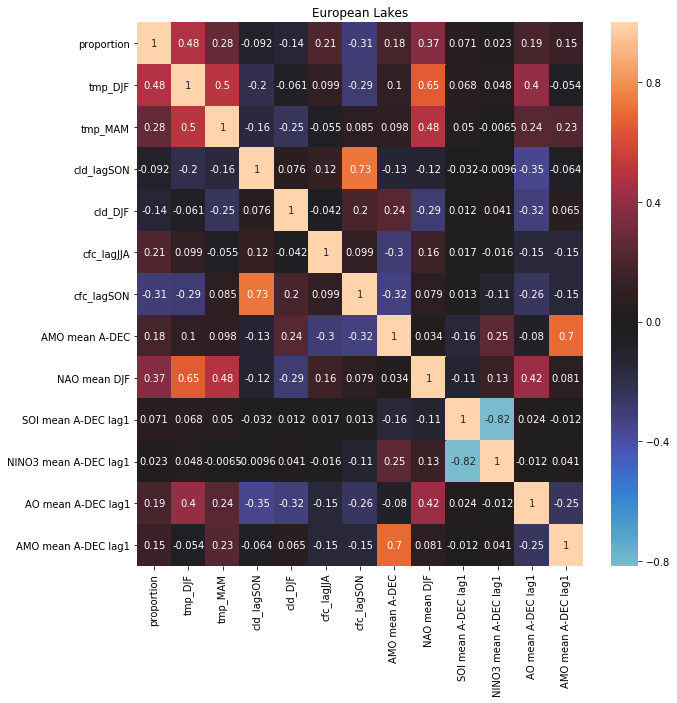

In [51]:
#cmap="YlGnBu"
#, annot=True, center=0
climate_corr_european = european_selected_columns.drop(columns=['start_year', 'no_freeze_count']).corr()

mask = np.zeros_like(climate_corr_european, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

graph.figure(figsize=(10, 10))
graph.title('European Lakes')
sns.heatmap(climate_corr_european, annot=True, center=0)
# sns.heatmap(climate_corr_european[['proportion', 'no_freeze_count']].sort_values(by='proportion', ascending=False), annot=True, center=0)
# graph.savefig('/home/arshad/Sapna_lab/heatmap_climate_correlation_european_lakes_jan_20_2020.png', format='png', dpi=400, bbox_inches = "tight")
graph.show()

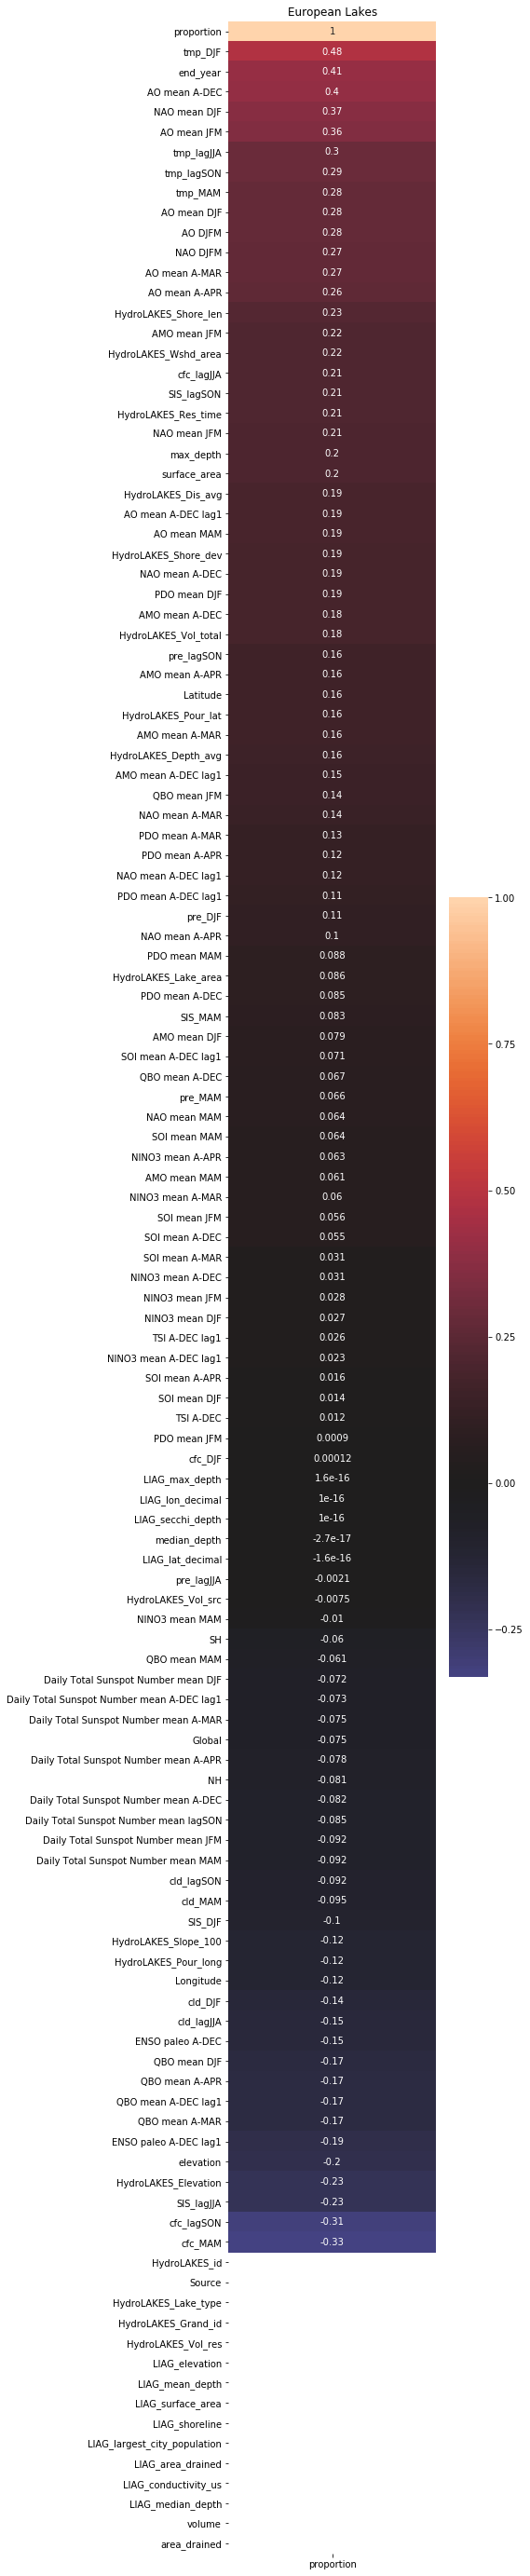

In [60]:
#cmap="YlGnBu"
#, annot=True, center=0
climate_corr_european = years_climate_european.drop(columns=['start_year', 'no_freeze_count']).corr()

mask = np.zeros_like(climate_corr_european, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

graph.figure(figsize=(5, 50))
graph.title('European Lakes')
sns.heatmap(climate_corr_european[['proportion']].sort_values(by='proportion', ascending=False), annot=True, center=0)
# sns.heatmap(climate_corr_european[['proportion', 'no_freeze_count']].sort_values(by='proportion', ascending=False), annot=True, center=0)
# graph.savefig('/home/arshad/Sapna_lab/heatmap_climate_correlation_european_lakes_feb_5_2020.png', format='png', dpi=300, bbox_inches = "tight")
graph.show()
# climate_corr_european.to_csv('/mnt/c/users/imrit/Downloads/correlations_european_feb_27_2020.csv', index=False)

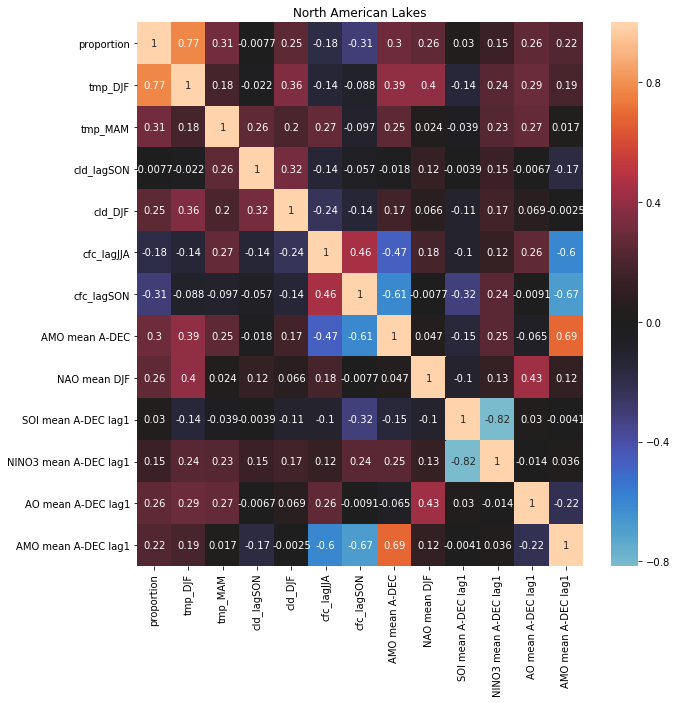

In [53]:
#cmap="YlGnBu"
#, annot=True, center=0
climate_corr_north_american = north_american_selected_columns.drop(columns=['start_year', 'no_freeze_count']).corr()

mask = np.zeros_like(climate_corr_north_american, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

graph.figure(figsize=(10, 10))
graph.title('North American Lakes')
sns.heatmap(climate_corr_north_american, annot=True, center=0)
# sns.heatmap(climate_corr_north_american[['proportion', 'no_freeze_count']].sort_values(by='proportion', ascending=False), annot=True, center=0)
# graph.savefig('/home/arshad/Sapna_lab/heatmap_climate_correlation_north_american_lakes_jan_20_2020.png', format='png', dpi=400, bbox_inches = "tight")
graph.show()

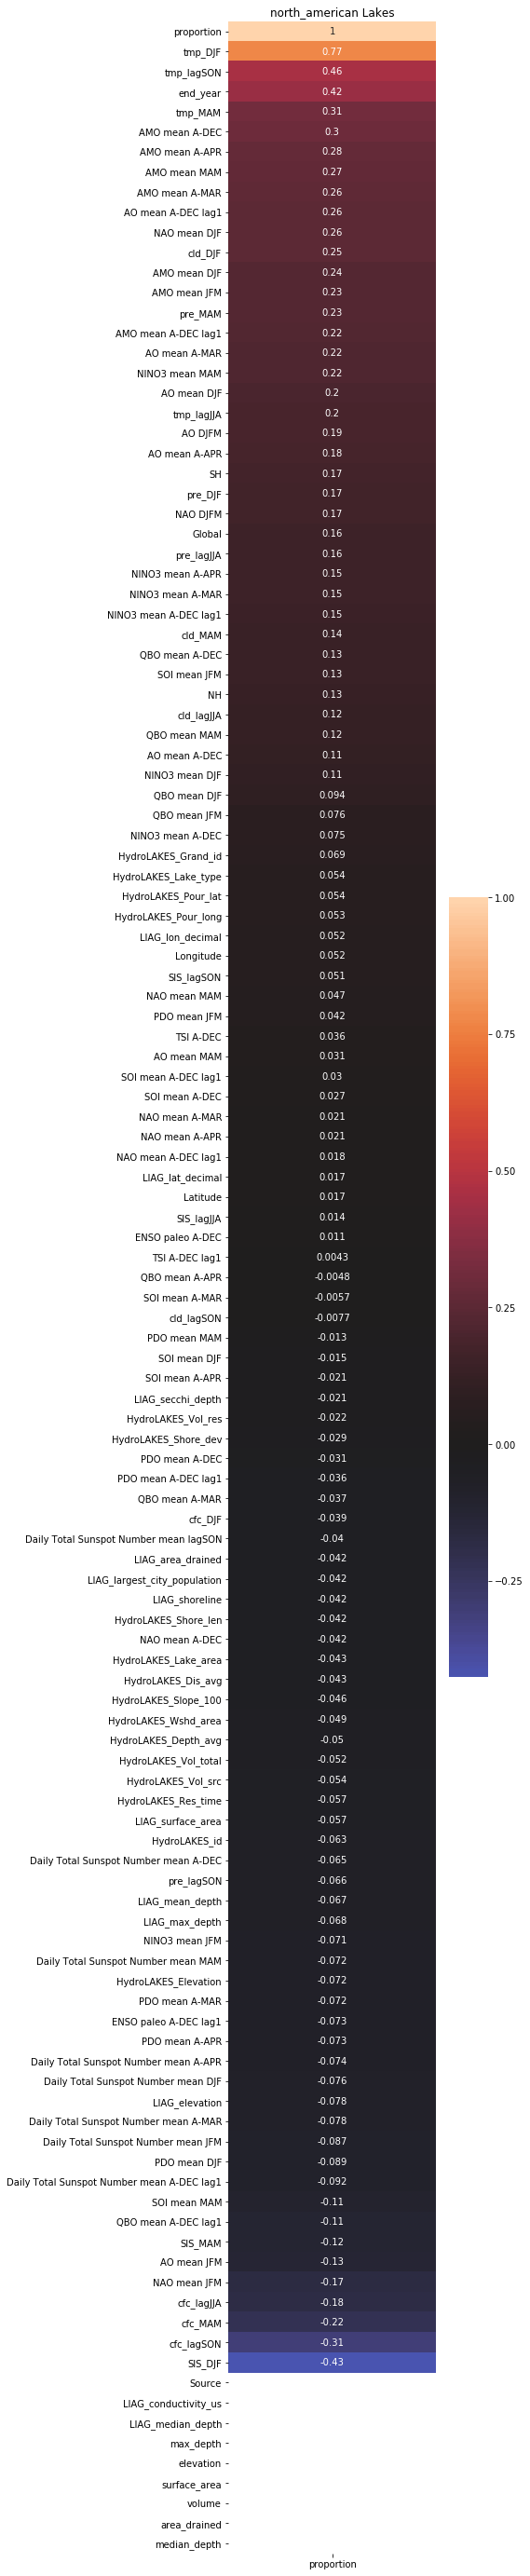

In [57]:
#cmap="YlGnBu"
#, annot=True, center=0
climate_corr_north_american = years_climate_north_american.drop(columns=['start_year', 'no_freeze_count']).corr()

mask = np.zeros_like(climate_corr_north_american, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

graph.figure(figsize=(5, 50))
graph.title('north_american Lakes')
sns.heatmap(climate_corr_north_american[['proportion']].sort_values(by='proportion', ascending=False), annot=True, center=0)
# sns.heatmap(climate_corr_north_american[['proportion', 'no_freeze_count']].sort_values(by='proportion', ascending=False), annot=True, center=0)
# graph.savefig('/home/arshad/Sapna_lab/heatmap_climate_correlation_north_american_lakes_feb_5_2020.png', format='png', dpi=300, bbox_inches = "tight")
graph.show()
# climate_corr_north_american.to_csv('/mnt/c/users/imrit/Downloads/correlations_north_american_feb_27_2020.csv', index=False)

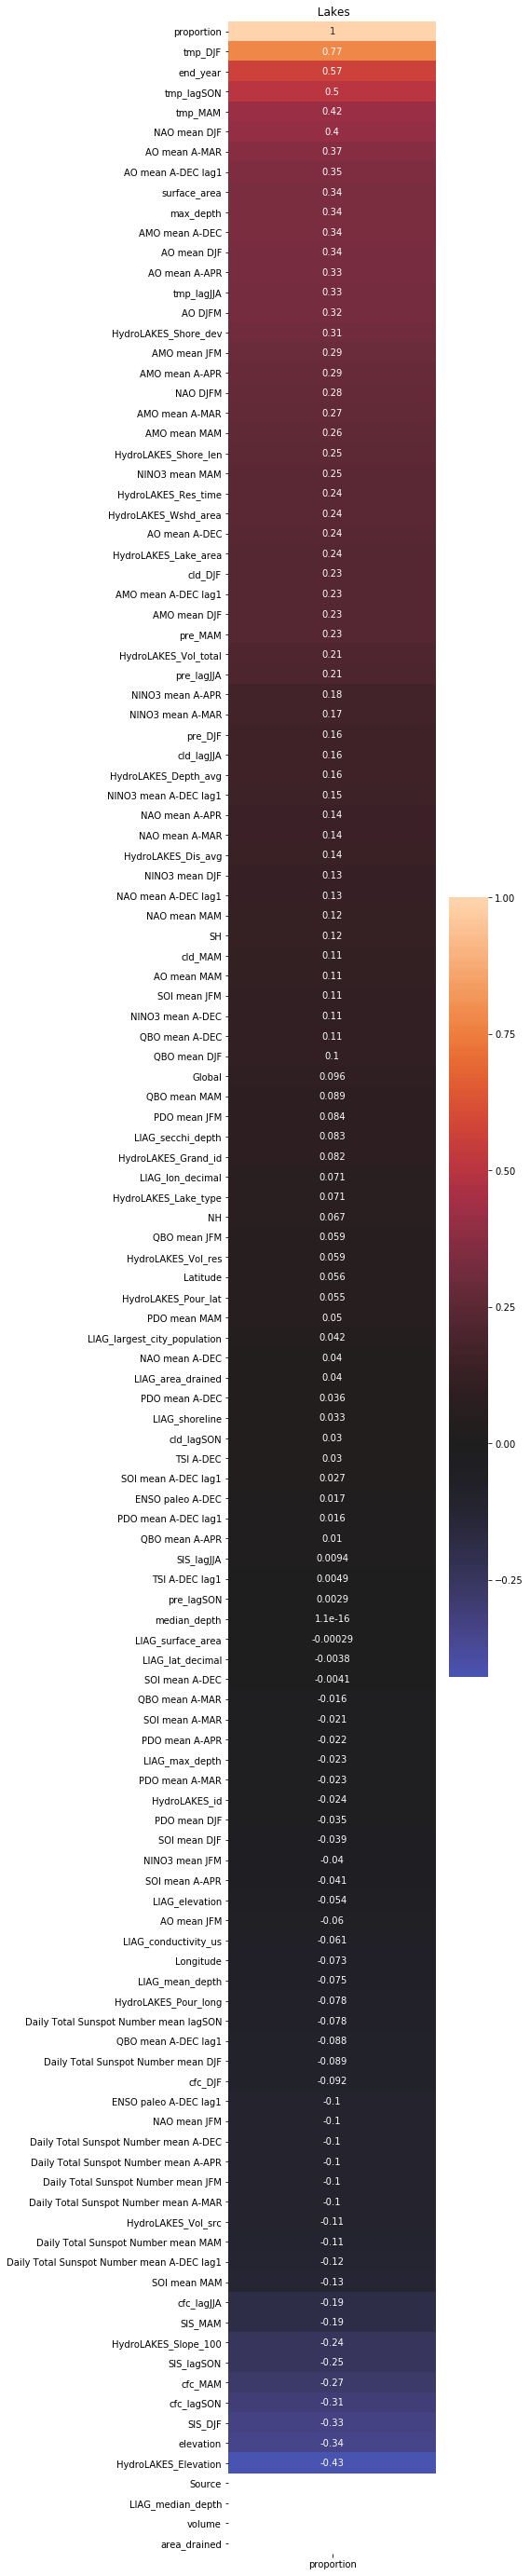

In [59]:
#cmap="YlGnBu"
#, annot=True, center=0
climate_corr = years_climate.drop(columns=['start_year', 'no_freeze_count']).corr()

mask = np.zeros_like(climate_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

graph.figure(figsize=(5, 50))
graph.title(' Lakes')
sns.heatmap(climate_corr[['proportion']].sort_values(by='proportion', ascending=False), annot=True, center=0)
# sns.heatmap(climate_corr_[['proportion', 'no_freeze_count']].sort_values(by='proportion', ascending=False), annot=True, center=0)
# graph.savefig('/home/arshad/Sapna_lab/heatmap_climate_correlation_global_lakes_feb_5_2020.png', format='png', dpi=300, bbox_inches = "tight")
graph.show()
# climate_corr.to_csv('/mnt/c/users/imrit/Downloads/correlations_global_feb_27_2020.csv', index=False)

In [50]:
not_enough_values = ['start_year', 'proportion', 'SIS_lagSON', 'SIS_DJF', 'SIS_MAM','cfc_lagJJA', 'cfc_lagSON', 'cfc_MAM', 
                     'cfc_DJF', ]

display(years_climate[not_enough_values])

strict_sapna_columns = ['tmp_MAM', 'tmp_DJF', 'AMO mean A-DEC', 'AMO mean DJF', 'NINO3 mean A-DEC lag1', 'NAO mean DJF', 
                        'cld_DJF', 'AO mean A-DEC lag1', 'AO DJFM', 'cld_lagSON']
display(years_climate[['start_year', 'proportion'] + strict_sapna_columns])

,start_year,proportion,SIS_lagSON,SIS_DJF,SIS_MAM,cfc_lagJJA,cfc_lagSON,cfc_MAM,cfc_DJF
62,2001,71.428571,110.183275,68.394850,168.713401,50.071429,57.333333,61.595238,64.238095
76,2015,53.846154,NaN,NaN,NaN,NaN,NaN,NaN,NaN
72,2011,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,2016,46.153846,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,1997,42.857143,108.268179,64.799826,171.171370,56.166667,59.071429,61.380952,69.785714
...,...,...,...,...,...,...,...,...,...
37,1976,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,1981,0.000000,NaN,NaN,NaN,NaN,NaN,68.690476,NaN
41,1980,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1940,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,start_year,proportion,tmp_MAM,tmp_DJF,AMO mean A-DEC,AMO mean DJF,NINO3 mean A-DEC lag1,NAO mean DJF,cld_DJF,AO mean A-DEC lag1,AO DJFM,cld_lagSON
62,2001,71.428571,6.438095,-1.985714,0.047167,0.183000,-0.389167,0.236667,71.050001,-0.161500,0.56625,67.464287
76,2015,53.846154,7.843590,-2.002564,0.325583,0.201000,1.497500,1.313333,73.356411,0.629583,0.06275,67.369232
72,2011,50.000000,9.300000,-2.369048,0.195917,-0.039000,-0.612500,1.370000,72.004763,0.525667,0.75050,66.645239
77,2016,46.153846,7.159259,-2.392593,0.298833,0.258333,0.395833,0.653333,73.300002,-0.114250,1.10825,69.348718
58,1997,42.857143,7.969048,-1.940476,0.354750,0.181000,1.619167,-0.226667,70.471429,-0.039667,-0.64725,65.309526
...,...,...,...,...,...,...,...,...,...,...,...,...
37,1976,0.000000,8.311905,-7.597619,-0.206250,-0.386667,0.228333,-1.043333,72.130953,-0.030750,-1.87675,68.959524
42,1981,0.000000,6.161905,-6.997619,-0.229750,-0.050667,-0.210000,0.080000,71.054764,-0.434583,-0.01275,69.859525
41,1980,0.000000,7.011905,-5.730952,-0.093750,-0.200667,0.033333,0.690000,69.245240,-0.643250,-0.53750,69.147621
1,1940,0.000000,6.584616,-5.292308,0.169250,-0.037000,0.612500,NaN,73.174359,NaN,NaN,66.035899


# Models

In [114]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
from IPython.display import display, Markdown

In [115]:
global_correlated_columns = ['tmp_MAM', 'tmp_DJF', 'AMO mean A-DEC', 'AMO mean MAM', 'AMO mean DJF', 'AMO mean JFM', 
                             'AMO mean A-APR', 'AMO mean A-MAR', 'NINO3 mean A-MAR', 'NINO3 mean A-APR', 
                             'NINO3 mean A-DEC lag1', 
                              'SOI mean A-APR', 'SOI mean A-MAR', 'NAO mean JFM'  
                             ]
not_enough_values = ['SIS_lagSON', 'SIS_DJF', 'SIS_MAM','cfc_lagJJA', 'cfc_lagSON']

correlated_columns = ['NAO mean JFM', 'PDO mean DJF', 'NINO3 mean DJF', 'NAO mean MAM', 'NINO3 mean A-APR', 'PDO mean A-APR', 
                      'PDO mean A-MAR', 'NAO mean DJF', 'NINO3 mean A-DEC lag1', 'AMO mean DJF', 'NINO3 mean MAM', 
                      'tmp_lagSON', 'pre_lagJJA', 'AO mean A-MAR', 'AMO mean A-DEC', 'AMO mean DJF', 'AO DJFM', 
                      'NINO3 mean MAM', 'NINO3 mean A-DEC lag1', 'AMO mean JFM', 'AMO mean MAM', 'NINO3 mean A-MAR', 
                      'cld_MAM']

sapna_selected_columns = ['AMO mean A-DEC', 'AMO mean DJF', 'NINO3 mean A-DEC lag1', 'NAO mean DJF', 'cld_DJF', 
                          'AO mean A-DEC lag1', 'AO DJFM', 'cld_lagSON', 'NAO mean MAM', 'NINO3 mean A-APR', 'NINO3 mean MAM', 
                          'NINO3 mean A-DEC lag1', 'AMO mean JFM', 'AMO mean MAM', 'NINO3 mean A-MAR', 'cld_MAM']

In [117]:
years_climate_high_correlated_columns = years_climate[years_climate.columns.intersection(list(set(global_correlated_columns + 
                                                                                         correlated_columns + 
                                                                                                  sapna_selected_columns)) +
                                                                                         ['proportion', 'start_year'])]
years_climate_high_correlated_columns.dropna(inplace=True)
display(years_climate_high_correlated_columns.head(), years_climate_high_correlated_columns.tail())
print(len(years_climate_high_correlated_columns))

/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,start_year,proportion,tmp_lagSON,tmp_DJF,tmp_MAM,pre_lagJJA,cld_lagSON,cld_DJF,cld_MAM,AMO mean A-DEC,...,PDO mean DJF,NINO3 mean DJF,NAO mean DJF,AMO mean DJF,NINO3 mean MAM,NAO mean MAM,AMO mean MAM,AO DJFM,NINO3 mean A-DEC lag1,AO mean A-DEC lag1
11,1950,14.285714,8.554762,-5.090476,6.126191,305.035714,66.690477,71.938097,69.626192,0.194333,...,-1.120000,-0.706667,-0.080000,0.063667,-0.250000,-0.610000,0.118333,-1.08675,-1.098333,-0.199333
12,1951,7.142857,7.990476,-4.311905,6.069048,323.514286,67.747622,72.007146,67.264288,0.285583,...,-1.383333,0.480000,0.473333,0.176667,-0.090000,-0.533333,0.201000,-0.31275,0.375833,-0.364667
13,1952,21.428571,8.150000,-3.595238,6.580953,307.978573,65.342858,73.307144,65.023810,0.254750,...,-0.200000,-0.126667,-0.196667,0.263667,0.433333,-0.790000,0.266000,-0.51100,-0.317500,-0.674917
14,1953,14.285714,9.945238,-4.138095,5.771429,316.771439,59.473811,69.171430,67.690478,0.033333,...,-0.953333,-0.063333,0.213333,0.193667,-0.913333,0.140000,0.052667,0.18050,0.274167,-0.016417
15,1954,7.692308,8.974359,-5.092308,6.635898,326.853848,67.784616,71.502566,65.417950,0.182417,...,-0.606667,-0.873333,-0.756667,0.021667,-1.130000,-0.430000,0.104000,-0.93000,-1.017500,-0.000583


,start_year,proportion,tmp_lagSON,tmp_DJF,tmp_MAM,pre_lagJJA,cld_lagSON,cld_DJF,cld_MAM,AMO mean A-DEC,...,PDO mean DJF,NINO3 mean DJF,NAO mean DJF,AMO mean DJF,NINO3 mean MAM,NAO mean MAM,AMO mean MAM,AO DJFM,NINO3 mean A-DEC lag1,AO mean A-DEC lag1
73,2012,28.571429,9.257143,-3.842857,6.254762,285.114290,67.121430,73.914286,69.190478,0.149000,...,-0.346667,-0.440000,0.023333,0.124333,-0.246667,-0.116667,0.128000,-1.63775,0.115833,-0.181500
74,2013,14.285714,9.107143,-6.173810,6.130953,345.300004,67.390477,71.671430,66.007144,0.084583,...,0.090000,-0.313333,0.860000,-0.027000,0.203333,0.063333,-0.062667,0.43900,-0.331667,0.001000
75,2014,21.428571,9.128572,-5.974359,7.228205,361.514290,69.828573,71.571796,65.907694,0.096833,...,2.420000,0.450000,1.656667,0.011333,0.606667,0.776667,-0.056000,1.09625,0.353333,-0.066667
76,2015,53.846154,10.925641,-2.002564,7.843590,331.600000,67.369232,73.356411,67.984616,0.325583,...,1.430000,2.396667,1.313333,0.201000,0.836667,0.113333,0.232333,0.06275,1.497500,0.629583
77,2016,46.153846,10.987180,-2.392593,7.159259,298.561542,69.348718,73.300002,71.248150,0.298833,...,0.880000,-0.056667,0.653333,0.258333,0.323333,0.186667,0.250333,1.10825,0.395833,-0.114250


67


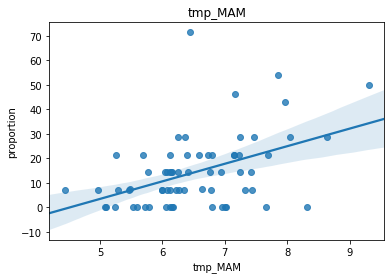

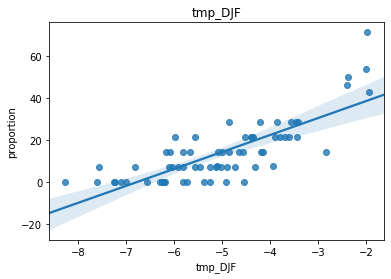

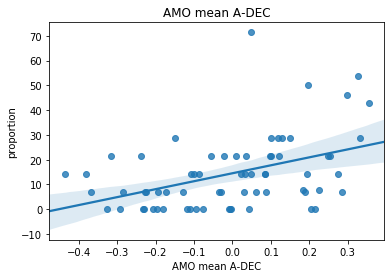

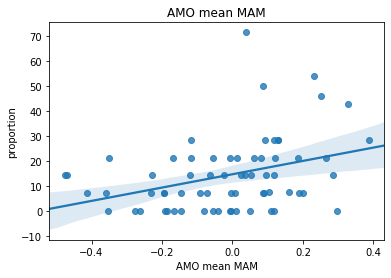

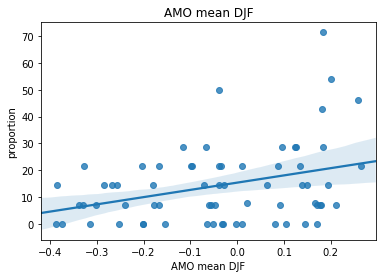

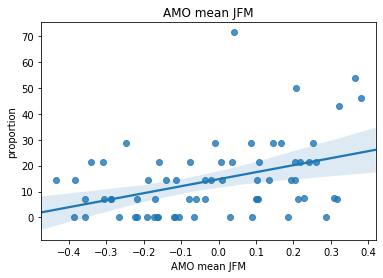

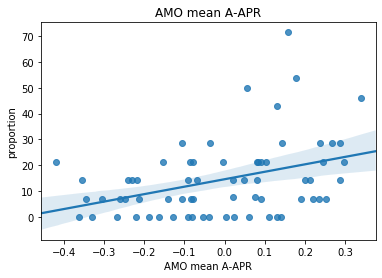

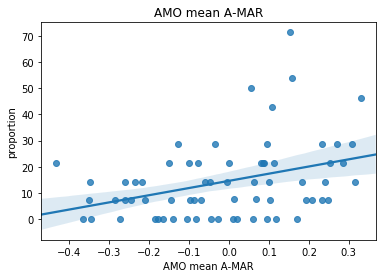

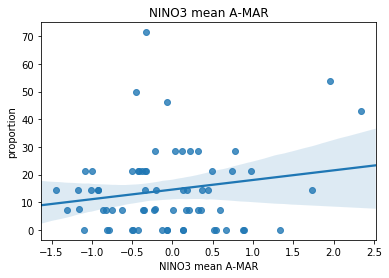

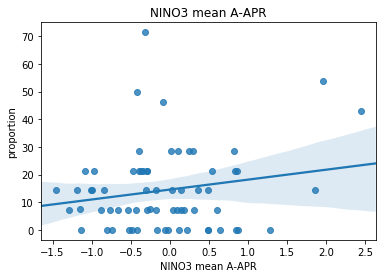

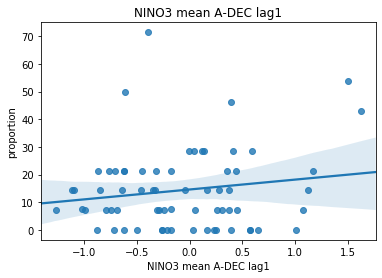

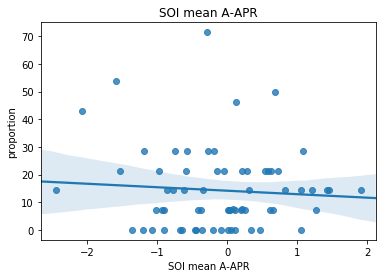

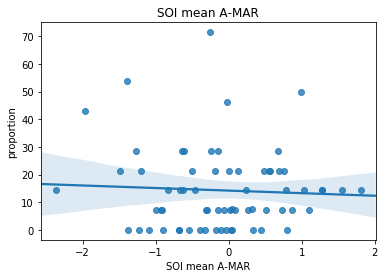

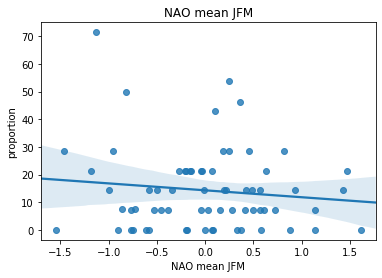

In [119]:
for col in global_correlated_columns:
    graph.title(col)
    sns.regplot(years_climate_high_correlated_columns[col], years_climate_high_correlated_columns['proportion'])
    graph.show()

In [78]:
global_ols_high_correlation = []
results_columns = ['x_data', 'correlation_coeff', 'rsquared', 'rsquared_adj', 'pvalues', 'coef', 'aic', 'bic', 'log_likelihood', 'f_pvalue', 
                   'fvalue', 'model']

for col in list(set(global_correlated_columns + correlated_columns + strict_sapna_columns + sapna_selected_columns)):
#     display(Markdown(f'**{col}**'))
    one_corr = years_climate_high_correlated_columns['proportion'].corr(years_climate_high_correlated_columns[col])
    X = years_climate_high_correlated_columns[col]
    X = sm.add_constant(X)
    results_high_correlated = sm.OLS(years_climate_high_correlated_columns['proportion'], X).fit()
    
    df = pd.DataFrame(columns=results_columns)
    df = df.append({'x_data': col, 
                    'correlation_coeff': one_corr, 
                'rsquared': results_high_correlated.rsquared, 
                'rsquared_adj': results_high_correlated.rsquared_adj, 
                'pvalues':  results_high_correlated.pvalues.values.item(0), 
                'coef': results_high_correlated.params.values.item(0), 
                'aic': results_high_correlated.aic, 
                'bic': results_high_correlated.bic,
                'log_likelihood': results_high_correlated.llf,
                'f_pvalue': results_high_correlated.f_pvalue, 
                'fvalue': results_high_correlated.fvalue, 
                'model': results_high_correlated.model
               }, ignore_index=True)
    
    global_ols_high_correlation.append(df)

global_ols_high_correlation = pd.concat(global_ols_high_correlation).sort_values(by=['rsquared'], ascending=False)
print(len(global_ols_high_correlation))
display(global_ols_high_correlation)
global_ols_high_correlation.to_csv('/mnt/c/Users/imrit/Downloads/extreme_events_single_linear_regressions_intercept_fitted.csv', index=False)

29


,x_data,correlation_coeff,rsquared,rsquared_adj,pvalues,coef,aic,bic,log_likelihood,f_pvalue,fvalue,model
0,AMO mean A-DEC,0.387704,0.150314,0.132612,1.647159e-13,18.544326,399.221383,403.045429,-197.610692,0.005405,8.491468,<statsmodels.regression.linear_model.OLS objec...
0,tmp_MAM,0.387514,0.150167,0.132463,3.324573e-01,-9.947463,399.230016,403.054062,-197.615008,0.005429,8.481716,<statsmodels.regression.linear_model.OLS objec...
0,tmp_DJF,0.375042,0.140657,0.122754,2.633503e-08,31.384821,399.786478,403.610524,-197.893239,0.007283,7.856602,<statsmodels.regression.linear_model.OLS objec...
0,AMO mean MAM,0.357666,0.127925,0.109757,7.130209e-14,19.135484,400.521804,404.345850,-198.260902,0.010770,7.041157,<statsmodels.regression.linear_model.OLS objec...
0,AMO mean JFM,0.349535,0.122175,0.103886,1.519968e-13,18.816387,400.850440,404.674486,-198.425220,0.012843,6.680573,<statsmodels.regression.linear_model.OLS objec...
0,AMO mean A-APR,0.343765,0.118174,0.099803,1.701588e-13,18.801141,401.077762,404.901808,-198.538881,0.014513,6.432535,<statsmodels.regression.linear_model.OLS objec...
0,AMO mean DJF,0.339316,0.115135,0.096701,4.354658e-14,19.679514,401.249776,405.073822,-198.624888,0.015925,6.245593,<statsmodels.regression.linear_model.OLS objec...
0,NINO3 mean A-APR,0.323632,0.104738,0.086087,5.003774e-14,19.784768,401.833880,405.657926,-198.916940,0.021869,5.615579,<statsmodels.regression.linear_model.OLS objec...
0,AMO mean A-MAR,0.322991,0.104323,0.085663,2.027136e-13,18.841794,401.857023,405.681069,-198.928511,0.022148,5.590769,<statsmodels.regression.linear_model.OLS objec...
0,NINO3 mean A-MAR,0.321879,0.103606,0.084931,5.037564e-14,19.814032,401.897059,405.721105,-198.948530,0.022638,5.547874,<statsmodels.regression.linear_model.OLS objec...


### Multiple regression

In [117]:
global_ols_high_correlation = []
results_columns = ['x_data_1', 'x_data_2', 'corr_coeff_1', 'corr_coeff_2', 'rsquared', 'rsquared_adj', 'pvalue_x_data_1', 
                   'pvalue_x_data_2', 'coef_x_data_1', 'coef_x_data_2', 'aic', 'bic', 'log_likelihood', 'f_pvalue', 
                   'fvalue', 'model']

stats_model_variables = list(set(global_correlated_columns + correlated_columns))
# stats_model_variables.remove('tmp_MAM')
# stats_model_variables.remove('tmp_DJF')
# stats_model_variables.remove('cld_MAM')
# # sapna_selected_columns.remove('cld_DJF')
# # sapna_selected_columns.remove('cld_MAM')
# # sapna_selected_columns.remove('cld_lagSON')
# stats_model_variables.remove('tmp_lagSON')
# stats_model_variables.remove('pre_lagJJA')
# stats_model_variables.remove('AMO mean A-APR')
# stats_model_variables.remove('AMO mean A-MAR')
# stats_model_variables.remove('AMO mean DJF')
# # sapna_selected_columns.remove('AMO mean DJF')
# stats_model_variables.remove('AMO mean MAM')
# # sapna_selected_columns.remove('AMO mean MAM')
# stats_model_variables.remove('AMO mean JFM')
# sapna_selected_columns.remove('AMO mean JFM')
# stats_model_variables.remove('AMO mean A-DEC')
# sapna_selected_columns.remove('AMO mean A-DEC')

for col_1 in tqdm(stats_model_variables):
#     display(Markdown(f'**{col}**'))
    for col_2 in sapna_selected_columns: 
        if col_1 == col_2:
            continue
        corr_col_1 = years_climate_high_correlated_columns['proportion'].corr(years_climate_high_correlated_columns[col_1])
        corr_col_2 = years_climate_high_correlated_columns['proportion'].corr(years_climate_high_correlated_columns[col_2])
        results_high_correlated = sm.OLS(years_climate_high_correlated_columns['proportion'], 
                                         years_climate_high_correlated_columns[[col_1, col_2]]).fit()

        df = pd.DataFrame(columns=results_columns)
        df = df.append({'x_data_1': col_1, 
                        'x_data_2': col_2,
                        'corr_coeff_1': corr_col_1, 
                        'corr_coeff_2': corr_col_2,
                    'rsquared': results_high_correlated.rsquared, 
                    'rsquared_adj': results_high_correlated.rsquared_adj, 
                    'pvalue_x_data_1':  results_high_correlated.pvalues.values.item(0),
                        'pvalue_x_data_2':  results_high_correlated.pvalues.values.item(1),
                        'coef_x_data_1': results_high_correlated.params.values.item(0),
                        'coef_x_data_2': results_high_correlated.params.values.item(1),
                    'aic': results_high_correlated.aic, 
                    'bic': results_high_correlated.bic,
                    'log_likelihood': results_high_correlated.llf,
                    'f_pvalue': results_high_correlated.f_pvalue, 
                    'fvalue': results_high_correlated.fvalue, 
                    'model': results_high_correlated.model
                   }, ignore_index=True)

        global_ols_high_correlation.append(df)

global_ols_high_correlation = pd.concat(global_ols_high_correlation).sort_values(by=['rsquared'], ascending=False)
print(len(global_ols_high_correlation))
display(global_ols_high_correlation)
# global_ols_high_correlation.to_csv('/mnt/c/Users/imrit/Downloads/extreme_events_proportion_2_x_linear_regressions.csv', index=False)


100%|██████████| 26/26 [00:07<00:00,  3.45it/s]


403


,x_data_1,x_data_2,corr_coeff_1,corr_coeff_2,rsquared,rsquared_adj,pvalue_x_data_1,pvalue_x_data_2,coef_x_data_1,coef_x_data_2,aic,bic,log_likelihood,f_pvalue,fvalue,model
0,tmp_MAM,AMO mean DJF,0.387514,0.339316,0.744546,0.733902,1.033037e-15,1.160633e-02,3.124510,24.845271,393.514543,397.338589,-194.757271,5.963545e-15,69.950383,<statsmodels.regression.linear_model.OLS objec...
0,tmp_DJF,cld_DJF,0.375042,0.159883,0.743479,0.732790,6.017831e-04,1.358056e-09,3.945752,0.506085,393.722994,397.547040,-194.861497,6.591108e-15,69.559518,<statsmodels.regression.linear_model.OLS objec...
0,tmp_MAM,AMO mean A-DEC,0.387514,0.387704,0.740012,0.729180,1.591457e-14,1.864826e-02,2.943228,21.438070,394.394124,398.218170,-195.197062,9.096268e-15,68.312095,<statsmodels.regression.linear_model.OLS objec...
0,tmp_MAM,AMO mean MAM,0.387514,0.357666,0.738958,0.728081,4.054653e-15,2.081918e-02,3.026584,20.898270,394.596533,398.420579,-195.298266,1.002438e-14,67.939155,<statsmodels.regression.linear_model.OLS objec...
0,tmp_MAM,AO DJFM,0.387514,0.226738,0.732892,0.721762,2.418650e-15,3.924004e-02,3.132404,3.937713,395.745129,399.569175,-195.872565,1.739785e-14,65.851209,<statsmodels.regression.linear_model.OLS objec...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,NINO3 mean A-DEC lag1,AO DJFM,0.281525,0.226738,0.002624,-0.038934,8.497726e-01,7.601414e-01,0.944017,1.092969,461.618832,465.442878,-228.809416,9.388942e-01,0.063135,<statsmodels.regression.linear_model.OLS objec...
0,AO DJFM,NINO3 mean A-DEC lag1,0.226738,0.281525,0.002624,-0.038934,7.601414e-01,8.497726e-01,1.092969,0.944017,461.618832,465.442878,-228.809416,9.388942e-01,0.063135,<statsmodels.regression.linear_model.OLS objec...
0,AO DJFM,NINO3 mean A-DEC lag1,0.226738,0.281525,0.002624,-0.038934,7.601414e-01,8.497726e-01,1.092969,0.944017,461.618832,465.442878,-228.809416,9.388942e-01,0.063135,<statsmodels.regression.linear_model.OLS objec...
0,PDO mean A-APR,AO DJFM,0.121201,0.226738,0.002514,-0.039048,8.610249e-01,7.561271e-01,-0.608111,1.114268,461.624333,465.448379,-228.812166,9.413766e-01,0.060488,<statsmodels.regression.linear_model.OLS objec...


## Best Subset

In [41]:
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

In [66]:
nonan_years_climate = years_climate[years_climate.columns.intersection(['proportion', 'start_year'] + strict_sapna_columns)]
nonan_years_climate.dropna(inplace=True)
nonan_years_climate.drop(columns='start_year', inplace=True)
display(nonan_years_climate.tail())

/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/arshad/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,proportion,tmp_DJF,tmp_MAM,cld_lagSON,cld_DJF,AMO mean A-DEC,NAO mean DJF,AMO mean DJF,AO DJFM,NINO3 mean A-DEC lag1,AO mean A-DEC lag1
48,28.571429,-3.775000,6.441667,66.500003,74.958331,0.149000,0.023333,0.124333,-1.63775,0.115833,-0.181500
49,14.285714,-3.316667,5.916667,65.550003,60.316665,0.084583,0.860000,-0.027000,0.43900,-0.331667,0.001000
50,21.428571,-1.722222,7.700000,67.544445,63.711111,0.096833,1.656667,0.011333,1.09625,0.353333,-0.066667
51,53.846154,-3.090476,6.619048,67.023809,69.885715,0.325583,1.313333,0.201000,0.06275,1.497500,0.629583
52,46.153846,-3.306667,6.693334,71.761112,70.013334,0.298833,0.653333,0.258333,1.10825,0.395833,-0.114250


In [46]:
from tqdm import tnrange, tqdm_notebook, trange

#Initialization variables
Y = nonan_years_climate.proportion
X = nonan_years_climate[strict_sapna_columns]
k = len(strict_sapna_columns)
RSS_list, R_squared_list, feature_list = [],[], []
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in trange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
best_subsets_models = pd.DataFrame({'numb_features': numb_features,'RSS': RSS_list, 'r_squared':R_squared_list,'features':feature_list})

Loop...:   0%|          | 0/10 [00:00<?, ?it/s]


NameError: name 'fit_linear_reg' is not defined

In [62]:
best_subsets_models_min = best_subsets_models[best_subsets_models.groupby('numb_features')['RSS'].transform(min) == best_subsets_models['RSS']]
best_subsets_models_max = best_subsets_models[best_subsets_models.groupby('numb_features')['r_squared'].transform(max) == best_subsets_models['r_squared']]
display(best_subsets_models_min.head(3))
display(best_subsets_models_max.head(3))

,numb_features,RSS,r_squared,features
2,1,7931.310825,0.150314,"(AMO mean A-DEC,)"
32,2,6796.927334,0.271841,"(AMO mean A-DEC, AO DJFM)"
74,3,5635.339505,0.396283,"(tmp_MAM, AMO mean DJF, AO DJFM)"


,numb_features,RSS,r_squared,features
2,1,7931.310825,0.150314,"(AMO mean A-DEC,)"
32,2,6796.927334,0.271841,"(AMO mean A-DEC, AO DJFM)"
74,3,5635.339505,0.396283,"(tmp_MAM, AMO mean DJF, AO DJFM)"


In [57]:
best_subsets_models.sort_values(by='r_squared', ascending=False, inplace=True)
display(best_subsets_models)

,numb_features,RSS,r_squared,features
1022,10,4554.615723,0.512061,"(tmp_MAM, tmp_DJF, AMO mean A-DEC, AMO mean DJ..."
1019,9,4562.893569,0.511175,"(tmp_MAM, tmp_DJF, AMO mean DJF, NINO3 mean A-..."
1012,9,4581.105670,0.509224,"(tmp_MAM, tmp_DJF, AMO mean A-DEC, AMO mean DJ..."
988,8,4590.769692,0.508188,"(tmp_MAM, tmp_DJF, AMO mean DJF, NINO3 mean A-..."
1016,9,4602.977656,0.506880,"(tmp_MAM, tmp_DJF, AMO mean A-DEC, AMO mean DJ..."
...,...,...,...,...
53,2,8889.807666,0.047630,"(AO mean A-DEC lag1, cld_lagSON)"
7,1,8890.441727,0.047562,"(AO mean A-DEC lag1,)"
51,2,9063.189842,0.029055,"(cld_DJF, cld_lagSON)"
6,1,9095.792106,0.025563,"(cld_DJF,)"


In [87]:
global_ols_high_correlation = []
results_columns = ['numb_features', 'x_data', 'rsquared', 'rsquared_adj', 'pvalues', 'coefs', 'aic', 'bic', 
                   'log_likelihood', 'f_pvalue', 'fvalue', 'model']

Y = nonan_years_climate.proportion
X = nonan_years_climate[strict_sapna_columns]
k = len(strict_sapna_columns)
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in trange(1, len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns, k):
#         print(combo)
        X_2 = X[list(combo)]
        X_2 = sm.add_constant(X_2)

        results = sm.OLS(nonans_years_climate['proportion'], X_2).fit()

        df = pd.DataFrame(columns=results_columns)
        df = df.append({'numb_features': len(combo), 
                        'x_data': combo, 
                        'rsquared': results.rsquared, 
                        'rsquared_adj': results.rsquared_adj, 
                        'pvalues':  results.pvalues.values, 
                        'coefs': results.params.values, 
                        'aic': results.aic, 
                        'bic': results.bic,
                        'log_likelihood': results.llf,
                        'f_pvalue': results.f_pvalue, 
                        'fvalue': results.fvalue, 
                        'model': results.model
                   }, ignore_index=True)

        global_ols_high_correlation.append(df)

global_ols_high_correlation = pd.concat(global_ols_high_correlation).sort_values(by=['rsquared'], ascending=False)
print(len(global_ols_high_correlation))
display(global_ols_high_correlation)
global_ols_high_correlation.to_csv('/mnt/c/Users/imrit/Downloads/extreme_events_proportion_multiple_linear_regressions_best_subsets_intercept_fitted.csv', index=False)

Loop...: 100%|██████████| 10/10 [00:19<00:00,  1.99s/it]


1023


,numb_features,x_data,rsquared,rsquared_adj,pvalues,coefs,aic,bic,log_likelihood,f_pvalue,fvalue,model
0,10,"(tmp_MAM, tmp_DJF, AMO mean A-DEC, AMO mean DJ...",0.512061,0.386949,"[0.2637608178340518, 0.11044091111976584, 0.13...","[-44.82260147218261, 2.8666679532224806, 1.903...",389.487525,410.519778,-183.743763,0.000678,4.092810,<statsmodels.regression.linear_model.OLS objec...
0,9,"(tmp_MAM, tmp_DJF, AMO mean DJF, NINO3 mean A-...",0.511175,0.401189,"[0.24649541688072163, 0.07071980094732429, 0.1...","[-45.76459559569307, 3.0264721667400876, 1.920...",387.578316,406.698546,-183.789158,0.000304,4.647646,<statsmodels.regression.linear_model.OLS objec...
0,9,"(tmp_MAM, tmp_DJF, AMO mean A-DEC, AMO mean DJ...",0.509224,0.398799,"[0.14218596406979392, 0.1117120797800197, 0.11...","[-28.34392668539077, 2.822894046944976, 1.9620...",387.777486,406.897716,-183.888743,0.000325,4.611500,<statsmodels.regression.linear_model.OLS objec...
0,8,"(tmp_MAM, tmp_DJF, AMO mean DJF, NINO3 mean A-...",0.508188,0.412225,"[0.12797034177424033, 0.07067872916949114, 0.1...","[-28.920405904024317, 2.9945561241964826, 1.98...",385.882852,403.091059,-183.941426,0.000137,5.295654,<statsmodels.regression.linear_model.OLS objec...
0,9,"(tmp_MAM, tmp_DJF, AMO mean A-DEC, AMO mean DJ...",0.506880,0.395928,"[0.26309759585760456, 0.09591526262630957, 0.1...","[-44.53685748156357, 2.9604622187030865, 1.774...",388.015638,407.135868,-184.007819,0.000352,4.568469,<statsmodels.regression.linear_model.OLS objec...
...,...,...,...,...,...,...,...,...,...,...,...,...
0,2,"(AO mean A-DEC lag1, cld_lagSON)",0.047630,0.007103,"[0.6761280231130218, 0.1372579671428394, 0.954...","[17.072190011193086, 7.504180588717444, 0.0343...",406.925738,412.661807,-200.462869,0.317640,1.175280,<statsmodels.regression.linear_model.OLS objec...
0,1,"(AO mean A-DEC lag1,)",0.047562,0.027719,"[2.1266657581456877e-13, 0.12813858712467865]","[19.420844445985562, 7.541144311408641]",404.929304,408.753350,-200.464652,0.128139,2.396978,<statsmodels.regression.linear_model.OLS objec...
0,2,"(cld_DJF, cld_lagSON)",0.029055,-0.012261,"[0.652490478503572, 0.2523693480681293, 0.6828...","[-22.047299023740308, 0.34804153196791954, 0.2...",407.891524,413.627593,-200.945762,0.500115,0.703233,<statsmodels.regression.linear_model.OLS objec...
0,1,"(cld_DJF,)",0.025563,0.005262,"[0.848314130046962, 0.2673856059216113]","[-3.9848911173217805, 0.33081984894960087]",406.071062,409.895108,-201.035531,0.267386,1.259195,<statsmodels.regression.linear_model.OLS objec...


## Multiple Regressions and Best Subset
#### Annual Oscillations

In [120]:
annual_oscillations = ['AMO mean A-APR', 'AMO mean A-DEC', 'AMO mean A-DEC lag1', 'AMO mean A-MAR',  'AMO mean DJF', 
                       'AMO mean JFM', 'AMO mean MAM', 'AO DJFM', 'AO mean A-APR',  'AO mean A-DEC', 'AO mean A-DEC lag1', 
                       'AO mean A-MAR', 'AO mean DJF', 'AO mean JFM', 'AO mean MAM', 'NAO DJFM', 'NAO mean A-APR', 
                       'NAO mean A-DEC', 'NAO mean A-DEC lag1', 'NAO mean A-MAR', 'NAO mean DJF', 'NAO mean JFM', 
                       'NAO mean MAM', 'NINO3 mean A-APR', 'NINO3 mean A-DEC', 'NINO3 mean A-DEC lag1', 'NINO3 mean A-MAR', 
                       'NINO3 mean DJF', 'NINO3 mean JFM', 'NINO3 mean MAM','PDO mean A-APR', 'PDO mean A-DEC', 
                       'PDO mean A-DEC lag1', 'PDO mean A-MAR', 'PDO mean DJF', 'PDO mean JFM', 'PDO mean MAM', 
                       'QBO mean A-APR', 'QBO mean A-DEC', 'QBO mean A-DEC lag1', 'QBO mean A-MAR', 'QBO mean DJF', 
                       'QBO mean JFM', 'QBO mean MAM', 'SOI mean A-APR', 'SOI mean A-DEC', 'SOI mean A-DEC lag1', 
                       'SOI mean A-MAR', 'SOI mean DJF', 'SOI mean JFM', 'SOI mean MAM', 'TSI A-DEC', 'TSI A-DEC lag1']

annual_oscillations = ['AMO mean A-DEC lag1', 'AO mean A-DEC lag1', 'NAO DJFM', 'NINO3 mean A-DEC lag1', 
                       'PDO mean A-DEC lag1', 'QBO mean A-DEC lag1', 'SOI mean A-DEC lag1', 'TSI A-DEC lag1']

print(len(annual_oscillations))

8


In [122]:
nonan_years_climate = years_climate[years_climate.columns.intersection(['proportion', 'start_year'] + 
                                                                       list(set(annual_oscillations + 
                                                                                strict_sapna_columns + 
                                                                                global_correlated_columns)))]
nonan_years_climate.dropna(inplace=True)
display(nonan_years_climate)
nonan_years_climate.drop(columns='start_year', inplace=True)
print(len(nonan_years_climate))
display(nonan_years_climate.tail())

/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,start_year,proportion,tmp_DJF,tmp_MAM,cld_lagSON,cld_DJF,AMO mean A-DEC,NAO mean JFM,AMO mean JFM,SOI mean A-MAR,...,AMO mean MAM,NAO DJFM,AO DJFM,PDO mean A-DEC lag1,QBO mean A-DEC lag1,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1,TSI A-DEC lag1
11,1950,14.285714,-5.090476,6.126191,66.690477,71.938097,0.194333,0.933333,0.203000,1.275000,...,0.118333,-1.26,-1.08675,-1.810000,-6.433333,1.510833,-1.098333,-0.199333,-0.016833,1361.117920
12,1951,7.142857,-4.311905,6.069048,67.747622,72.007146,0.285583,-0.763333,0.315667,-0.931667,...,0.201000,0.83,-0.31275,-0.769167,-3.045000,-0.694167,0.375833,-0.364667,0.194333,1360.849731
13,1952,21.428571,-3.595238,6.580953,65.342858,73.307144,0.254750,0.630000,0.216667,-0.190000,...,0.266000,0.18,-0.51100,-0.865833,-5.378333,-0.221667,-0.317500,-0.674917,0.285583,1360.822388
14,1953,14.285714,-4.138095,5.771429,59.473811,69.171430,0.033333,0.563333,-0.036667,-0.673333,...,0.052667,0.13,0.18050,-0.156667,-0.545000,-0.767500,0.274167,-0.016417,0.254750,1360.693848
15,1954,7.692308,-5.092308,6.635898,67.784616,71.502566,0.182417,-0.863333,0.307000,0.317500,...,0.104000,-2.52,-0.93000,-0.290833,-10.306667,0.233333,-1.017500,-0.000583,0.033333,1360.700928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,2012,28.571429,-3.842857,6.254762,67.121430,73.914286,0.149000,0.190000,0.166333,-0.249167,...,0.128000,-1.97,-1.63775,-1.100000,-20.786667,-0.180000,0.115833,-0.181500,0.195917,1361.192627
74,2013,14.285714,-6.173810,6.130953,67.390477,71.671430,0.084583,0.423333,0.134333,0.235833,...,-0.062667,3.10,0.43900,-0.517500,9.058333,0.345833,-0.331667,0.001000,0.149000,1361.263062
75,2014,21.428571,-5.974359,7.228205,69.828573,71.571796,0.096833,1.473333,0.242333,-0.505000,...,-0.056000,3.56,1.09625,1.130833,-9.097500,-0.381667,0.353333,-0.066667,0.084583,1361.386230
76,2015,53.846154,-2.002564,7.843590,67.369232,73.356411,0.325583,0.243333,0.364333,-1.395000,...,0.232333,0.98,0.06275,1.634167,-4.162500,-1.174167,1.497500,0.629583,0.096833,1361.409790


67


/home/arshad/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,proportion,tmp_DJF,tmp_MAM,cld_lagSON,cld_DJF,AMO mean A-DEC,NAO mean JFM,AMO mean JFM,SOI mean A-MAR,NINO3 mean A-MAR,...,AMO mean MAM,NAO DJFM,AO DJFM,PDO mean A-DEC lag1,QBO mean A-DEC lag1,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1,TSI A-DEC lag1
73,28.571429,-3.842857,6.254762,67.121430,73.914286,0.149000,0.190000,0.166333,-0.249167,0.117500,...,0.128000,-1.97,-1.63775,-1.100000,-20.786667,-0.180000,0.115833,-0.181500,0.195917,1361.192627
74,14.285714,-6.173810,6.130953,67.390477,71.671430,0.084583,0.423333,0.134333,0.235833,-0.338333,...,-0.062667,3.10,0.43900,-0.517500,9.058333,0.345833,-0.331667,0.001000,0.149000,1361.263062
75,21.428571,-5.974359,7.228205,69.828573,71.571796,0.096833,1.473333,0.242333,-0.505000,0.495833,...,-0.056000,3.56,1.09625,1.130833,-9.097500,-0.381667,0.353333,-0.066667,0.084583,1361.386230
76,53.846154,-2.002564,7.843590,67.369232,73.356411,0.325583,0.243333,0.364333,-1.395000,1.950000,...,0.232333,0.98,0.06275,1.634167,-4.162500,-1.174167,1.497500,0.629583,0.096833,1361.409790
77,46.153846,-2.392593,7.159259,69.348718,73.300002,0.298833,0.356667,0.379000,-0.030000,-0.063333,...,0.250333,1.47,1.10825,1.542500,7.918333,-0.456667,0.395833,-0.114250,0.325583,1360.951904


In [124]:
feb_11_columns = ['tmp_DJF', 'tmp_MAM', 'cld_lagSON', 'cld_DJF',
       'NAO mean JFM', 'NAO mean DJF',
       'NAO DJFM', 'AO DJFM', 'PDO mean A-DEC lag1',
       'QBO mean A-DEC lag1', 'SOI mean A-DEC lag1', 'NINO3 mean A-DEC lag1',
       'AO mean A-DEC lag1', 'AMO mean A-DEC lag1', 'TSI A-DEC lag1']

feb_12_columns = ['tmp_DJF', 'tmp_MAM', 'cld_lagSON', 'cld_DJF','NAO mean DJF',
       'NAO DJFM', 'PDO mean A-DEC lag1',
       'QBO mean A-DEC lag1', 'SOI mean A-DEC lag1', 'NINO3 mean A-DEC lag1',
       'AO mean A-DEC lag1', 'AMO mean A-DEC lag1', 'TSI A-DEC lag1']

In [125]:
test_data = years_climate[years_climate.columns.intersection(['proportion', 'start_year'] + feb_12_columns)]
test_data.dropna(inplace=True)
print(len(test_data))
test_data.head()
test_data.to_csv('/mnt/c/users/imrit/Downloads/data_r_extreme_events_linear_regressions_feb_20.csv')

67


/home/arshad/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [129]:
global_ols_high_correlation = []
results_columns = ['numb_features', 'x_data', 'rsquared', 'rsquared_adj', 'pvalues', 'coefs', 'aic', 'bic', 
                   'log_likelihood', 'f_pvalue', 'fvalue', 'model']

Y = nonan_years_climate.proportion
X = nonan_years_climate[feb_12_columns]
k = len(feb_12_columns)
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in trange(1, len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns, k):
#         print(combo)
        X_2 = X[list(combo)]
        X_2 = sm.add_constant(X_2)

        results = sm.OLS(nonan_years_climate['proportion'], X_2).fit()

        df = pd.DataFrame(columns=results_columns)
        df = df.append({'numb_features': len(combo), 
                        'x_data': combo, 
                        'rsquared': results.rsquared, 
                        'rsquared_adj': results.rsquared_adj, 
                        'pvalues':  results.pvalues.values, 
                        'coefs': results.params.values, 
                        'aic': results.aic, 
                        'bic': results.bic,
                        'log_likelihood': results.llf,
                        'f_pvalue': results.f_pvalue, 
                        'fvalue': results.fvalue, 
                        'model': results.model
                   }, ignore_index=True)

        global_ols_high_correlation.append(df)

global_ols_high_correlation = pd.concat(global_ols_high_correlation).sort_values(by=['aic'], ascending=True)
print(len(global_ols_high_correlation))
display(global_ols_high_correlation)
global_ols_high_correlation.to_csv('/mnt/c/Users/imrit/Downloads/extreme_events_proportion_mult_linear_regressions_annual_oscillations_best_subsets_feb_20_2020.csv', index=False)

Loop...:   0%|          | 0/13 [00:00<?, ?it/s]/home/arshad/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
Loop...: 100%|██████████| 13/13 [01:21<00:00,  6.24s/it]


8191


,numb_features,x_data,rsquared,rsquared_adj,pvalues,coefs,aic,bic,log_likelihood,f_pvalue,fvalue,model
0,3,"(tmp_DJF, tmp_MAM, AMO mean A-DEC lag1)",0.703107,0.688969,"[0.010880611980704563, 1.312195469938985e-13, ...","[23.977014566999447, 7.035171134423878, 3.9514...",474.667678,483.486449,-233.333839,1.318033e-16,49.732576,<statsmodels.regression.linear_model.OLS objec...
0,4,"(tmp_DJF, tmp_MAM, SOI mean A-DEC lag1, AMO me...",0.711039,0.692397,"[0.007896074764846899, 8.778049946960655e-14, ...","[25.04683886322777, 7.165497284410854, 3.91717...",474.853282,485.876745,-232.426641,4.451740e-16,38.140499,<statsmodels.regression.linear_model.OLS objec...
0,4,"(tmp_DJF, tmp_MAM, NINO3 mean A-DEC lag1, AMO ...",0.707513,0.688643,"[0.011881367937236135, 1.5381643744627558e-13,...","[23.706334155710977, 7.182977513157359, 4.0875...",475.665867,486.689330,-232.832933,6.452788e-16,37.493869,<statsmodels.regression.linear_model.OLS objec...
0,4,"(tmp_DJF, tmp_MAM, AO mean A-DEC lag1, AMO mea...",0.706893,0.687983,"[0.009110351646069288, 1.2989878373592615e-11,...","[24.746628208390035, 6.748327892105602, 3.6625...",475.807712,486.831175,-232.903856,6.884715e-16,37.381795,<statsmodels.regression.linear_model.OLS objec...
0,5,"(tmp_DJF, tmp_MAM, PDO mean A-DEC lag1, SOI me...",0.715377,0.692047,"[0.005340171876092232, 8.879093049742541e-14, ...","[27.04273436408622, 7.216116951882939, 3.68399...",475.839869,489.068025,-231.919935,1.880103e-15,30.663723,<statsmodels.regression.linear_model.OLS objec...
...,...,...,...,...,...,...,...,...,...,...,...,...
0,4,"(cld_lagSON, PDO mean A-DEC lag1, QBO mean A-D...",0.024946,-0.037961,"[0.7798723756956621, 0.567721418844467, 0.4030...","[1951.9554341706068, -0.5710475321951967, 1.79...",556.338801,567.362265,-273.169401,8.103572e-01,0.396558,<statsmodels.regression.linear_model.OLS objec...
0,4,"(cld_lagSON, PDO mean A-DEC lag1, SOI mean A-D...",0.018993,-0.044298,"[0.7831142320931883, 0.5677290048289454, 0.321...","[1929.0856427022613, -0.5765636745537537, 2.78...",556.746619,567.770082,-273.373309,8.767982e-01,0.300092,<statsmodels.regression.linear_model.OLS objec...
0,4,"(cld_lagSON, QBO mean A-DEC lag1, SOI mean A-D...",0.013808,-0.049818,"[0.7969264093027078, 0.7079075972085095, 0.416...","[1808.5745107936768, -0.3648200727543476, -0.1...",557.099842,568.123305,-273.549921,9.280054e-01,0.217013,<statsmodels.regression.linear_model.OLS objec...
0,5,"(cld_lagSON, PDO mean A-DEC lag1, QBO mean A-D...",0.042605,-0.035870,"[0.6994820496246046, 0.6236644614067441, 0.922...","[2708.4278844982073, -0.4911348148880025, 0.25...",557.114269,570.342424,-272.557134,7.430041e-01,0.542911,<statsmodels.regression.linear_model.OLS objec...


## Extreme lakes

In [51]:
lake_characteristics_column = ['lakecode', 'lake', 'Latitude', 'Longitude', 'HydroLAKES_Lake_area', 'HydroLAKES_Shore_len', 
                               'HydroLAKES_Shore_dev', 'HydroLAKES_Vol_total', 'HydroLAKES_Vol_res', 'HydroLAKES_Vol_src', 
                               'HydroLAKES_Depth_avg', 'HydroLAKES_Dis_avg', 'HydroLAKES_Res_time', 'HydroLAKES_Elevation', 
                               'HydroLAKES_Slope_100', 'HydroLAKES_Wshd_area', 'HydroLAKES_Pour_long', 'HydroLAKES_Pour_lat', 
                               'LIAG_elevation', 'LIAG_mean_depth', 'LIAG_max_depth', 
                               'LIAG_surface_area', 'LIAG_shoreline', 'LIAG_largest_city_population', 
                               'LIAG_area_drained', 'LIAG_conductivity_us', 'max_depth', 'elevation', 'volume', 'area_drained']

exluded_lake_characteristics_columns = ['Country', 'HydroLAKES_id', 'Contributor', 'Source', 'HydroLAKES_Lake_name', 
                                        'HydroLAKES_Country', 'HydroLAKES_Continent', 'HydroLAKES_Poly_src', 
                                        'HydroLAKES_Lake_type', 'HydroLAKES_Grand_id', 'LIAG_contributor', 'LIAG_filename', 
                                        'LIAG_lat_decimal', 'LIAG_lon_decimal',  'LIAG_continent', 'LIAG_country', 
                                        'LIAG_state', 'continent', 
                                        'LIAG_inlet_streams', 'LIAG_lakename', 'LIAG_longitude', 'LIAG_latitude', 
                                        'lake', 'LIAG_power_plant_discharge', 'LIAG_lakeorriver', 'LIAG_landuse_code',
                                       'LIAG_secchi_depth', 'LIAG_median_depth', 'surface_area', 'median_depth']

In [52]:
# unique_lake_characteristics = drivers_extreme_no[drivers_extreme_no.columns.intersection(lake_characteristics_column)]
# unique_lake_characteristics.drop_duplicates(['lakecode'], inplace=True)
# print(len(unique_lake_characteristics))
# display(unique_lake_characteristics)

In [53]:
# cols_for_lake_charac_groupby_mean = lake_characteristics_column.copy()
# cols_for_lake_charac_groupby_mean.remove('lake')

# make dataframe where I groupby lake and I calculate mean temperature and all the other stuff
# then merge on that
drivers_lake_climate_variables_mean = pd.DataFrame(drivers.groupby('lake').mean())
drivers_lake_climate_variables_mean.reset_index(level=0, inplace=True)
drivers_lake_climate_variables_mean.drop(columns=['start_year', 'end_year'], inplace=True)
drivers_lake_climate_variables_mean

,lake,tmp_lagJJA,tmp_lagSON,tmp_DJF,tmp_MAM,pre_lagJJA,pre_lagSON,pre_DJF,pre_MAM,cld_lagJJA,...,PDO mean A-DEC lag1,QBO mean A-DEC lag1,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,NAO mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1,TSI A-DEC lag1,ENSO paleo A-DEC lag1,Daily Total Sunspot Number mean A-DEC lag1
0,BIG GREEN LAKE,20.425214,8.949573,-7.183983,6.873593,290.460261,199.914105,89.181819,210.788314,58.459403,...,-0.038451,-3.512415,-0.140374,-0.093066,-0.018644,-0.116695,0.003000,1361.081912,-0.013687,97.785053
1,GEORGE,19.266667,8.806751,-6.102137,6.220940,290.551901,252.673421,196.341028,233.346157,63.625317,...,-0.031414,-3.662981,-0.134667,-0.093958,0.000870,-0.106658,0.007309,1361.071094,-0.013687,95.699331
2,GRAND TRAVERSE BAY,18.713676,8.475214,-5.961472,5.303896,238.916669,231.969234,138.677924,185.135068,58.089744,...,-0.038451,-3.512415,-0.140374,-0.093066,-0.018644,-0.116695,0.003000,1361.081912,-0.013687,97.785053
3,Gull Lake,21.511815,11.182701,-3.028205,8.858120,271.236710,226.789875,154.629489,243.719234,59.123629,...,-0.031414,-3.662981,-0.134667,-0.093958,0.000870,-0.106658,0.007309,1361.071094,-0.013687,95.699331
4,LAKE CHAMPLAIN,19.689452,8.941350,-6.423932,6.289744,283.032914,242.472156,165.938464,209.826925,62.486921,...,-0.031414,-3.662981,-0.134667,-0.093958,0.000870,-0.106658,0.007309,1361.071094,-0.013687,95.699331
5,LAKE GENEVA,21.047680,9.860760,-5.888462,7.583333,298.896205,204.416458,117.419232,232.273080,58.050633,...,-0.031414,-3.662981,-0.134667,-0.093958,0.000870,-0.106658,0.007309,1361.071094,-0.013687,95.699331
6,LAKE SUPERIOR AT BAYFIELD,17.811815,7.088608,-9.604274,3.884615,292.318990,206.712660,81.430770,189.275643,57.805908,...,-0.031414,-3.662981,-0.134667,-0.093958,0.000870,-0.106658,0.007309,1361.071094,-0.013687,95.699331
7,Lake Balaton,20.158009,10.890476,0.148246,10.944298,194.270132,141.749352,113.303948,138.697370,54.778789,...,-0.037305,-3.512415,-0.138593,-0.092067,-0.018644,-0.116695,-0.001420,1361.087223,-0.018841,98.846309
8,Lake Suwa,19.087764,10.510127,-2.907692,6.258120,566.322795,370.913928,107.497437,292.182055,80.381014,...,-0.031414,-3.662981,-0.134667,-0.093958,0.000870,-0.106658,0.007309,1361.071094,-0.013687,95.699331
9,Lunz,14.255702,6.368860,-3.603556,5.308445,436.606586,259.943422,189.614669,254.618670,59.470615,...,-0.081261,-3.673321,-0.122610,-0.120428,-0.025295,-0.128214,-0.002479,1361.079309,-0.013687,98.915728


In [54]:
extreme_lakes_freq = pd.DataFrame(drivers_extreme_no['lake'].value_counts()).sort_values(['lake'], ascending=False)
extreme_lakes_freq.reset_index(level=0, inplace=True)
extreme_lakes_freq.rename(columns = {'index': 'lake', 'lake': 'number_extreme_years'}, inplace=True)
display(extreme_lakes_freq)

lake_extreme_characteristics = pd.merge(extreme_lakes_freq, drivers_lake_climate_variables_mean, on='lake')
lake_extreme_characteristics.replace(-999, np.nan, inplace=True)
lake_extreme_characteristics.drop(columns=['LIAG_secchi_depth', 'LIAG_median_depth', 'surface_area', 'median_depth'], 
                                  inplace=True)
display(lake_extreme_characteristics)

# lake_extreme_characteristics.to_csv('/mnt/c/users/imrit/Downloads/data_lake_characteristics_feb_20_2020.csv', index=False)

,lake,number_extreme_years
0,LAKE CHAMPLAIN,36
1,GRAND TRAVERSE BAY,32
2,Lake Suwa,21
3,SEBAGO LAKE,13
4,GEORGE,11
5,Ransfjorden,7
6,Lake Balaton,6
7,LAKE SUPERIOR AT BAYFIELD,4
8,LAKE GENEVA,4
9,OTSEGO,3


,lake,number_extreme_years,tmp_lagJJA,tmp_lagSON,tmp_DJF,tmp_MAM,pre_lagJJA,pre_lagSON,pre_DJF,pre_MAM,...,PDO mean A-DEC lag1,QBO mean A-DEC lag1,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,NAO mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1,TSI A-DEC lag1,ENSO paleo A-DEC lag1,Daily Total Sunspot Number mean A-DEC lag1
0,LAKE CHAMPLAIN,36,19.689452,8.941350,-6.423932,6.289744,283.032914,242.472156,165.938464,209.826925,...,-0.031414,-3.662981,-0.134667,-0.093958,0.000870,-0.106658,0.007309,1361.071094,-0.013687,95.699331
1,GRAND TRAVERSE BAY,32,18.713676,8.475214,-5.961472,5.303896,238.916669,231.969234,138.677924,185.135068,...,-0.038451,-3.512415,-0.140374,-0.093066,-0.018644,-0.116695,0.003000,1361.081912,-0.013687,97.785053
2,Lake Suwa,21,19.087764,10.510127,-2.907692,6.258120,566.322795,370.913928,107.497437,292.182055,...,-0.031414,-3.662981,-0.134667,-0.093958,0.000870,-0.106658,0.007309,1361.071094,-0.013687,95.699331
3,SEBAGO LAKE,13,19.202598,9.254113,-4.959211,6.260088,257.127276,294.825976,259.172372,276.972372,...,-0.028106,-3.426887,-0.142457,-0.081840,-0.020884,-0.113417,0.005944,1361.075151,0.013710,96.328036
4,GEORGE,11,19.266667,8.806751,-6.102137,6.220940,290.551901,252.673421,196.341028,233.346157,...,-0.031414,-3.662981,-0.134667,-0.093958,0.000870,-0.106658,0.007309,1361.071094,-0.013687,95.699331
5,Ransfjorden,7,13.484038,3.844601,-7.015238,2.697143,268.370425,226.135213,140.225716,136.772859,...,-0.074718,-3.387251,-0.111631,-0.096209,-0.018644,-0.116695,-0.004234,1361.085288,-0.024316,96.133225
6,Lake Balaton,6,20.158009,10.890476,0.148246,10.944298,194.270132,141.749352,113.303948,138.697370,...,-0.037305,-3.512415,-0.138593,-0.092067,-0.018644,-0.116695,-0.001420,1361.087223,-0.018841,98.846309
7,LAKE SUPERIOR AT BAYFIELD,4,17.811815,7.088608,-9.604274,3.884615,292.318990,206.712660,81.430770,189.275643,...,-0.031414,-3.662981,-0.134667,-0.093958,0.000870,-0.106658,0.007309,1361.071094,-0.013687,95.699331
8,LAKE GENEVA,4,21.047680,9.860760,-5.888462,7.583333,298.896205,204.416458,117.419232,232.273080,...,-0.031414,-3.662981,-0.134667,-0.093958,0.000870,-0.106658,0.007309,1361.071094,-0.013687,95.699331
9,OTSEGO,3,18.815190,8.871308,-5.460684,6.118376,311.207598,276.393674,220.528209,272.870517,...,-0.031414,-3.662981,-0.134667,-0.093958,0.000870,-0.106658,0.007309,1361.071094,-0.013687,95.699331


In [55]:
lake_extreme_characteristics.columns

Index(['lake', 'number_extreme_years', 'tmp_lagJJA', 'tmp_lagSON', 'tmp_DJF',
       'tmp_MAM', 'pre_lagJJA', 'pre_lagSON', 'pre_DJF', 'pre_MAM',
       ...
       'PDO mean A-DEC lag1', 'QBO mean A-DEC lag1', 'SOI mean A-DEC lag1',
       'NINO3 mean A-DEC lag1', 'NAO mean A-DEC lag1', 'AO mean A-DEC lag1',
       'AMO mean A-DEC lag1', 'TSI A-DEC lag1', 'ENSO paleo A-DEC lag1',
       'Daily Total Sunspot Number mean A-DEC lag1'],
      dtype='object', length=122)

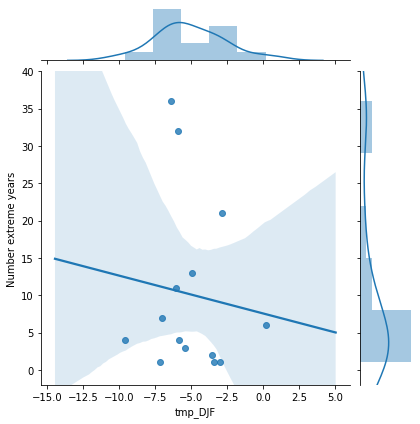

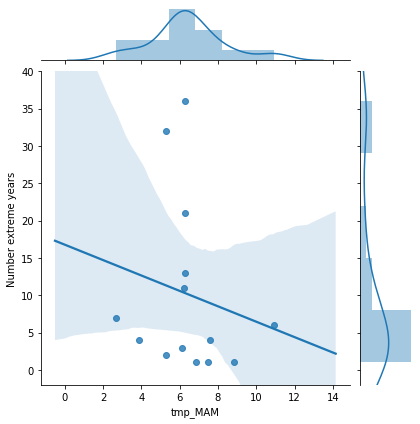

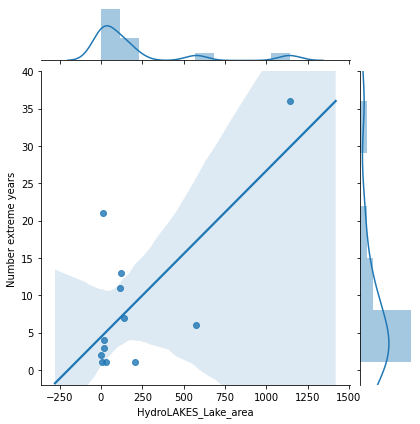

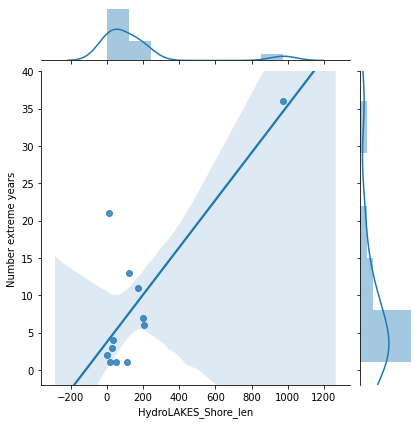

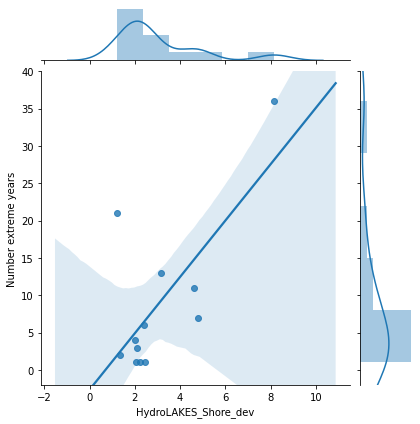

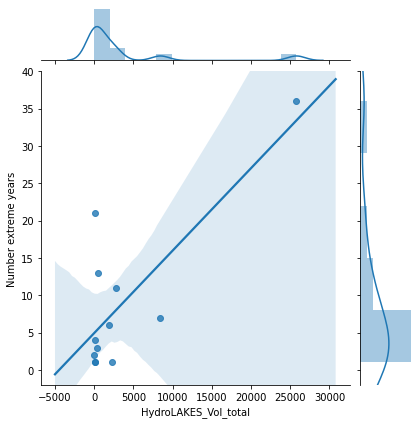

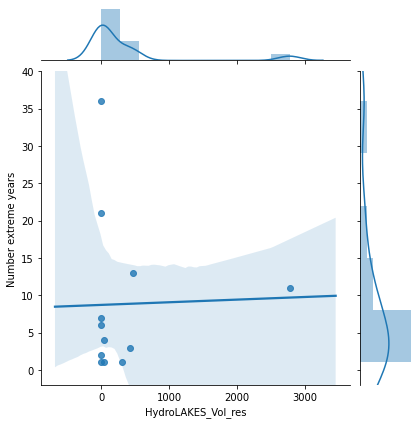

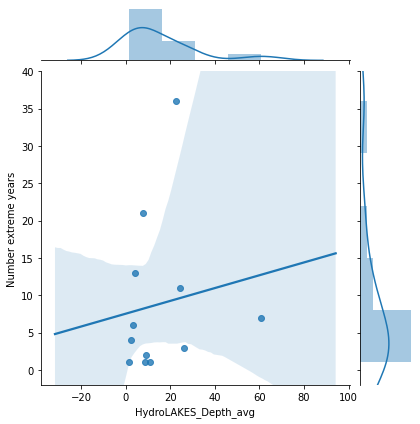

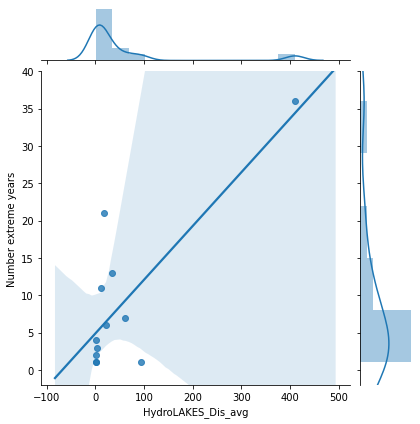

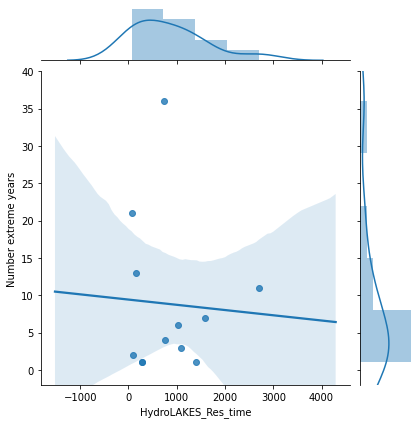

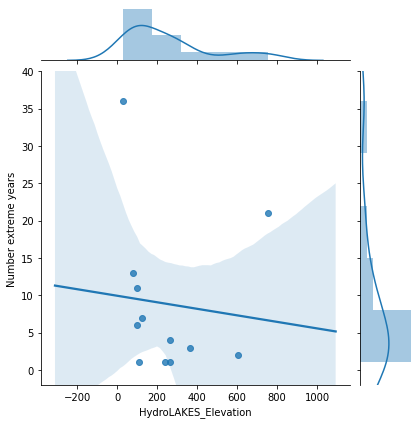

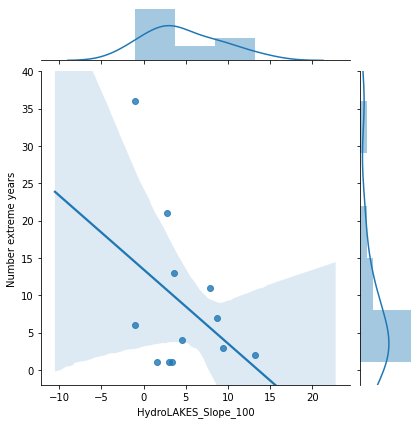

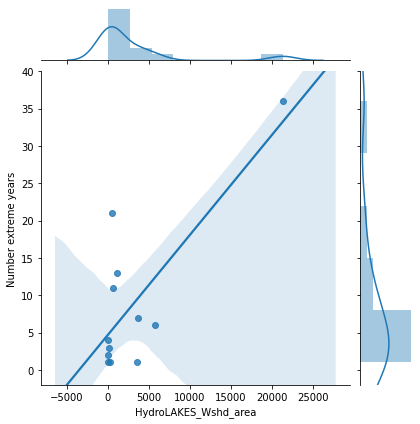

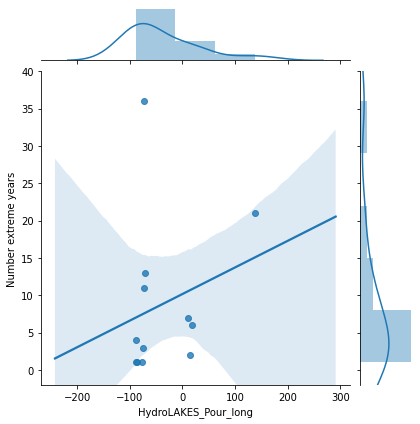

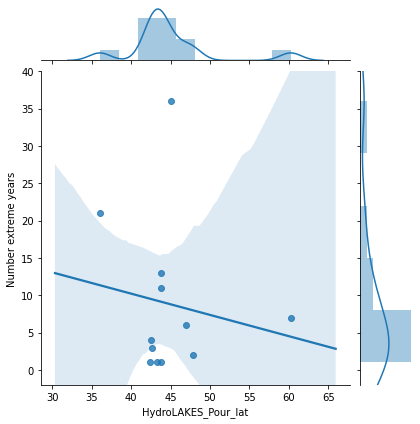

In [56]:
temp_col = ['tmp_DJF', 'tmp_MAM', 'HydroLAKES_Lake_area', 'HydroLAKES_Shore_len', 'HydroLAKES_Shore_dev',
       'HydroLAKES_Vol_total', 'HydroLAKES_Vol_res', 
       'HydroLAKES_Depth_avg', 'HydroLAKES_Dis_avg', 'HydroLAKES_Res_time',
       'HydroLAKES_Elevation', 'HydroLAKES_Slope_100', 'HydroLAKES_Wshd_area',
       'HydroLAKES_Pour_long', 'HydroLAKES_Pour_lat']

for col in temp_col:
#     graph.title(col)
    sns.jointplot(lake_extreme_characteristics[col], lake_extreme_characteristics['number_extreme_years'], kind='reg')
    graph.ylabel('Number extreme years')
    graph.ylim(-2, 40)
    graph.show()
# graph.scatter(lake_extreme_characteristics['HydroLAKES_Depth_avg'], lake_extreme_characteristics['number_extreme_years'])

In [33]:
# lake_extreme_characteristics.to_csv('/mnt/c/users/imrit/Downloads/lake_characteristics.csv', index=False)

In [57]:
lakes_corr = lake_extreme_characteristics.drop(columns=['max_depth', 'elevation', 'continent', 'volume', 
                                                        'area_drained', 'LIAG_conductivity_us', 'LIAG_contributor', 
                                                        'LIAG_filename', 'Country', 'HydroLAKES_id', 'Contributor', 'Source', 
                                                        'HydroLAKES_Lake_name']).corr()
lakes_corr

mask = np.zeros_like(lakes_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

KeyError: "['continent' 'LIAG_contributor' 'LIAG_filename' 'Country' 'Contributor'\n 'HydroLAKES_Lake_name'] not found in axis"

In [ ]:
#cmap="YlGnBu"

graph.figure(figsize=(6, 15))
# sns.heatmap(lakes_corr, annot=True, center=0, mask=mask)
sns.heatmap(lakes_corr[['number_extreme_years']].sort_values(by='number_extreme_years', ascending=False), annot=True, center=0)

# graph.xticks(rotation=30)
graph.tight_layout()
# graph.savefig('/mnt/c/users/imrit/Downloads/Extreme_events_presentation/correlation_lake_characteristics.png')
graph.show()

In [ ]:
# drivers_extreme_no.groupby('start_year').count().sort_values(by='lake', ascending=False)

In [ ]:
# drivers_extreme_no.groupby('lakecode').count().sort_values(by='lakecode', ascending=False)

In [ ]:
# pre_suwa = drivers[drivers['lakecode'] == 'ARAI1']
# suwa_proxy_climate = pre_suwa[pre_suwa.columns.intersection(climate_columns)]
# print(len(suwa_proxy_climate))
# display(suwa_proxy_climate.tail())

# World maps

In [37]:
lakes_lat_longs = drivers_extreme_no.drop_duplicates('lakecode')[['lakecode', 'lake', 'Latitude', 'Longitude', 
                                                                  'HydroLAKES_Country', 'HydroLAKES_Continent']]
display(lakes_lat_longs)

,lakecode,lake,Latitude,Longitude,HydroLAKES_Country,HydroLAKES_Continent
505,ARAI1,Lake Suwa,36.1500,138.0800,Japan,Asia
1859,GAH21,SEBAGO LAKE,43.8700,-70.5700,United States of America,North America
1993,JJM24,BIG GREEN LAKE,43.8000,-89.0000,United States of America,North America
2144,JJM27,LAKE GENEVA,42.5700,-88.5000,United States of America,North America
2306,JJM33,LAKE SUPERIOR AT BAYFIELD,46.8100,-90.8100,NaN,NaN
2411,KMS10,GEORGE,43.8300,-73.4300,United States of America,North America
2599,KMS14,OTSEGO,42.7500,-74.8900,United States of America,North America
2792,LR1,ONEIDA,43.2400,-76.1400,United States of America,North America
2887,MICH03,Gull Lake,42.4000,-85.4100,United States of America,North America
3147,RAA3,GRAND TRAVERSE BAY,44.7500,-85.6200,NaN,NaN


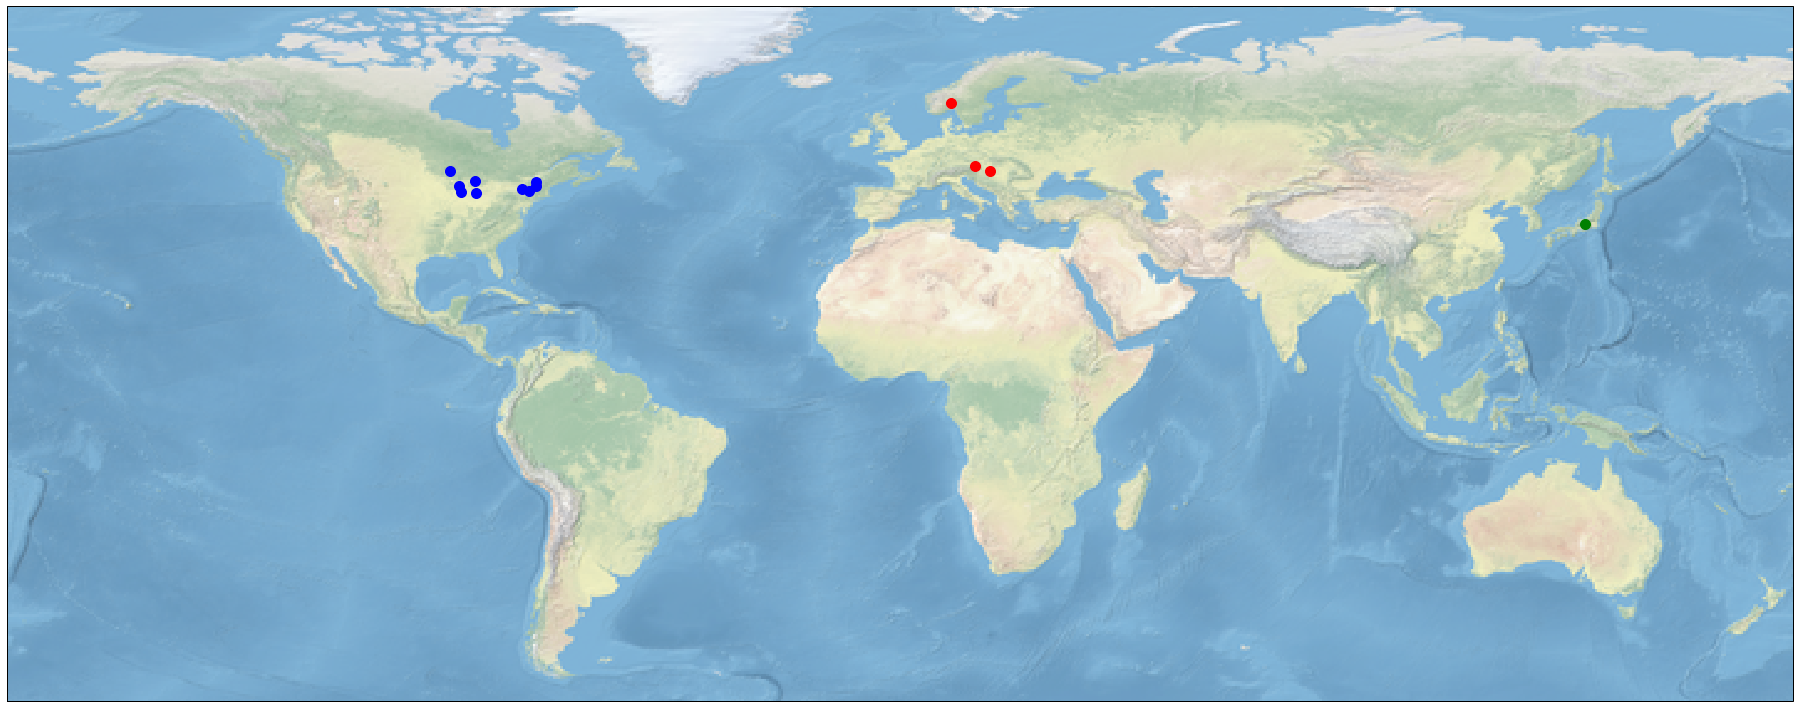

In [43]:
graph.figure(figsize=(32, 18))

plot_1 = graph.axes(projection=ccrs.PlateCarree())
# plot_1.coastlines()
plot_1.stock_img()
plot_1.set_extent((-180, 160, -60, 80))
# plot_1.set_global()
graph.scatter(lakes_lat_longs['Longitude'][:1], lakes_lat_longs['Latitude'][:1],transform=ccrs.Geodetic(), s=100, color='green')
graph.scatter(lakes_lat_longs['Longitude'][2:-3], lakes_lat_longs['Latitude'][2:-3],transform=ccrs.Geodetic(), s=100, color='blue')
graph.scatter(lakes_lat_longs['Longitude'][-3:], lakes_lat_longs['Latitude'][-3:],transform=ccrs.Geodetic(), s=100, color='red')

# graph.show()

# graph.axes(projection=ccrs.Robinson(central_longitude=0, globe=None))
# graph.scatter(lakes_lat_longs['Latitude'], lakes_lat_longs['Longitude'], transform=ccrs.Robinson(central_longitude=0, globe=None))
# graph.show()

In [109]:
fit = rpart(number_extreme_years ~ HydroLAKES_Vol_total + HydroLAKES_Wshd_area + 
            HydroLAKES_Shore_len + HydroLAKES_Lake_area + HydroLAKES_Shore_dev + HydroLAKES_Depth_avg + 
            HydroLAKES_Elevation + tmp_DJF, method="anova", data=ee_data)

SyntaxError: invalid syntax (<ipython-input-109-bbc157ff4dec>, line 1)

# Kevin's predictions

In [58]:
kevin_folder = '/mnt/c/users/imrit/Downloads/Sapna_sharma_lab/Extreme_events/Kevin_predictions/'
dfs = []

for file in os.listdir(kevin_folder):
    lake_name = file.split('IceFreePredictions_')[1].split('.')[0]
    df = pd.read_csv(f'{kevin_folder}/{file}')
    dfs.append(df)

data = pd.concat(dfs)
predicted_totals = pd.DataFrame(data.groupby('start_year').sum())
predicted_totals.reset_index(level=0, inplace=True)

kev_scenarios_col = [col for col in predicted_totals if col !='start_year']
print(kev_scenarios_col)

for col in kev_scenarios_col:
    predicted_totals[col] = predicted_totals[col]*100 /8

rcp_26_columns = [col for col in predicted_totals.columns if '_rcp26' in col]
rcp_60_columns = [col for col in predicted_totals.columns if '_rcp60' in col]
rcp_85_columns = [col for col in predicted_totals.columns if '_rcp85' in col]

predicted_totals['rcp26_avg'] = predicted_totals[rcp_26_columns].mean(axis=1)
predicted_totals['rcp60_avg'] = predicted_totals[rcp_60_columns].mean(axis=1)
predicted_totals['rcp85_avg'] = predicted_totals[rcp_85_columns].mean(axis=1)

display(predicted_totals)

['GFDL-ESM2M_rcp26', 'GFDL-ESM2M_rcp60', 'GFDL-ESM2M_rcp85', 'HadGEM2-ES_rcp26', 'HadGEM2-ES_rcp60', 'HadGEM2-ES_rcp85', 'IPSL-CM5A-LR_rcp26', 'IPSL-CM5A-LR_rcp60', 'IPSL-CM5A-LR_rcp85', 'MIROC5_rcp26', 'MIROC5_rcp60', 'MIROC5_rcp85']


,start_year,GFDL-ESM2M_rcp26,GFDL-ESM2M_rcp60,GFDL-ESM2M_rcp85,HadGEM2-ES_rcp26,HadGEM2-ES_rcp60,HadGEM2-ES_rcp85,IPSL-CM5A-LR_rcp26,IPSL-CM5A-LR_rcp60,IPSL-CM5A-LR_rcp85,MIROC5_rcp26,MIROC5_rcp60,MIROC5_rcp85,rcp26_avg,rcp60_avg,rcp85_avg
0,2020,37.5,37.5,37.5,75.0,25.0,37.5,50.0,12.5,25.0,50.0,12.5,75.0,53.125,21.875,43.750
1,2021,87.5,37.5,37.5,12.5,25.0,87.5,25.0,12.5,12.5,25.0,25.0,62.5,37.500,25.000,50.000
2,2022,25.0,0.0,0.0,12.5,37.5,50.0,12.5,12.5,12.5,62.5,25.0,25.0,28.125,18.750,21.875
3,2023,12.5,37.5,25.0,87.5,87.5,87.5,25.0,37.5,25.0,37.5,25.0,37.5,40.625,46.875,43.750
4,2024,12.5,37.5,50.0,87.5,37.5,37.5,62.5,50.0,75.0,12.5,50.0,12.5,43.750,43.750,43.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2094,37.5,25.0,87.5,100.0,100.0,100.0,87.5,62.5,100.0,75.0,100.0,100.0,75.000,71.875,96.875
75,2095,12.5,87.5,100.0,75.0,87.5,100.0,25.0,87.5,100.0,12.5,87.5,100.0,31.250,87.500,100.000
76,2096,25.0,87.5,100.0,100.0,87.5,100.0,37.5,87.5,100.0,37.5,100.0,100.0,50.000,90.625,100.000
77,2097,12.5,12.5,87.5,87.5,100.0,100.0,87.5,87.5,100.0,75.0,87.5,100.0,65.625,71.875,96.875


In [59]:
kevin_folder = '/mnt/c/users/imrit/Downloads/Sapna_sharma_lab/Extreme_events/Kevin_predictions/'
dfs = []

for file in os.listdir(kevin_folder):
    lake_name = file.split('IceFreePredictions_')[1].split('.')[0]
    df = pd.read_csv(f'{kevin_folder}/{file}')
    df['lake'] = lake_name
    dfs.append(df)

idiot = pd.concat(dfs)

kev_sum_indiv_lakes = pd.DataFrame(idiot.groupby('lake').sum())
kev_sum_indiv_lakes.reset_index(level=0, inplace=True)
kev_sum_indiv_lakes.drop(columns=['start_year'], inplace=True)
kev_sum_indiv_lakes = kev_sum_indiv_lakes.T
kev_sum_indiv_lakes.rename(columns=kev_sum_indiv_lakes.iloc[0], inplace=True)
kev_sum_indiv_lakes.drop(kev_sum_indiv_lakes.index[0], inplace=True)
display(kev_sum_indiv_lakes)

,George,Grand_Traverse_Bay,Lake_Balaton,Lake_Champlain,Lake_Superior_at_Bayfield,Lake_Suwa,Ransfjorden,Sebago_Lake
GFDL-ESM2M_rcp26,17,32,19,44,7,57,35,22
GFDL-ESM2M_rcp60,30,50,23,54,14,58,50,31
GFDL-ESM2M_rcp85,47,58,37,66,24,73,54,51
HadGEM2-ES_rcp26,48,56,58,69,27,77,34,54
HadGEM2-ES_rcp60,50,55,65,71,33,77,39,57
HadGEM2-ES_rcp85,66,68,65,75,59,78,57,68
IPSL-CM5A-LR_rcp26,29,41,29,57,15,60,48,33
IPSL-CM5A-LR_rcp60,36,40,44,56,17,74,56,40
IPSL-CM5A-LR_rcp85,57,61,59,70,43,73,60,62
MIROC5_rcp26,36,59,24,62,18,71,17,42


In [60]:
years_climate.head()

,start_year,no_freeze_count,proportion,end_year,tmp_lagJJA,tmp_lagSON,tmp_DJF,tmp_MAM,pre_lagJJA,pre_lagSON,...,PDO mean A-DEC lag1,QBO mean A-DEC lag1,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,NAO mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1,TSI A-DEC lag1,ENSO paleo A-DEC lag1,Daily Total Sunspot Number mean A-DEC lag1
62,2001,10,71.428571,2002,19.171429,9.690476,-1.985714,6.438095,278.850001,238.314287,...,-0.562500,-15.238333,-0.078333,-0.389167,-0.182500,-0.161500,0.101333,1361.568604,0.065,170.408219
76,2015,7,53.846154,2016,19.505129,10.925641,-2.002564,7.843590,331.600000,263.876926,...,1.634167,-4.162500,-1.174167,1.497500,0.433333,0.629583,0.096833,1361.409790,NaN,69.816438
72,2011,7,50.000000,2012,19.835714,10.152381,-2.369048,9.300000,332.785715,277.785721,...,-1.230833,1.963333,1.395833,-0.612500,0.293333,0.525667,0.084583,1361.068970,NaN,80.841096
77,2016,6,46.153846,2017,20.443590,10.987180,-2.392593,7.159259,298.561542,257.830771,...,1.542500,7.918333,-0.456667,0.395833,-0.038333,-0.114250,0.325583,1360.951904,NaN,39.822404
58,1997,6,42.857143,1998,18.623810,8.057143,-1.940476,7.969048,300.371436,206.200001,...,1.460833,7.863333,-1.288333,1.619167,-0.156667,-0.039667,0.034250,1360.807251,-0.393,28.936986


In [61]:
predicted_data.head()

,lakecode,lake,start_year,end_year,FrozeYN,tmp_lagJJA,tmp_lagSON,tmp_DJF,tmp_MAM,pre_lagJJA,...,PDO mean A-DEC lag1,QBO mean A-DEC lag1,SOI mean A-DEC lag1,NINO3 mean A-DEC lag1,NAO mean A-DEC lag1,AO mean A-DEC lag1,AMO mean A-DEC lag1,TSI A-DEC lag1,ENSO paleo A-DEC lag1,Daily Total Sunspot Number mean A-DEC lag1
505,ARAI1,Lake Suwa,1948,1949,N,19.200000,10.333334,-1.300000,4.766667,550.90000,...,-0.874167,-6.252500,-0.232500,-0.095833,NaN,NaN,0.005000,1361.506348,-0.124,193.030055
518,ARAI1,Lake Suwa,1961,1962,N,19.800001,11.866667,-2.866667,6.100000,630.90000,...,-0.817500,4.416667,-0.010833,-0.305833,0.043333,-0.045167,0.088167,1360.995728,-0.873,76.430137
528,ARAI1,Lake Suwa,1971,1972,N,18.866667,9.200000,-2.066667,6.300000,600.90000,...,-1.290833,4.799167,1.072500,-0.989167,0.010000,0.006083,-0.326667,1361.040039,-1.466,94.400000
535,ARAI1,Lake Suwa,1978,1979,N,20.566668,10.000000,-1.300000,6.033333,380.80002,...,0.235833,6.806667,-0.287500,-0.292500,0.317500,-0.150333,-0.196833,1361.216187,0.270,130.991781
543,ARAI1,Lake Suwa,1986,1987,N,18.466667,9.933333,-2.133333,6.633334,501.30002,...,1.239167,-0.984167,-0.322500,-0.039167,0.503333,0.084833,-0.292000,1360.641724,-0.409,14.764384


In [62]:
predicted_totals.head()

,start_year,GFDL-ESM2M_rcp26,GFDL-ESM2M_rcp60,GFDL-ESM2M_rcp85,HadGEM2-ES_rcp26,HadGEM2-ES_rcp60,HadGEM2-ES_rcp85,IPSL-CM5A-LR_rcp26,IPSL-CM5A-LR_rcp60,IPSL-CM5A-LR_rcp85,MIROC5_rcp26,MIROC5_rcp60,MIROC5_rcp85,rcp26_avg,rcp60_avg,rcp85_avg
0,2020,37.5,37.5,37.5,75.0,25.0,37.5,50.0,12.5,25.0,50.0,12.5,75.0,53.125,21.875,43.750
1,2021,87.5,37.5,37.5,12.5,25.0,87.5,25.0,12.5,12.5,25.0,25.0,62.5,37.500,25.000,50.000
2,2022,25.0,0.0,0.0,12.5,37.5,50.0,12.5,12.5,12.5,62.5,25.0,25.0,28.125,18.750,21.875
3,2023,12.5,37.5,25.0,87.5,87.5,87.5,25.0,37.5,25.0,37.5,25.0,37.5,40.625,46.875,43.750
4,2024,12.5,37.5,50.0,87.5,37.5,37.5,62.5,50.0,75.0,12.5,50.0,12.5,43.750,43.750,43.750


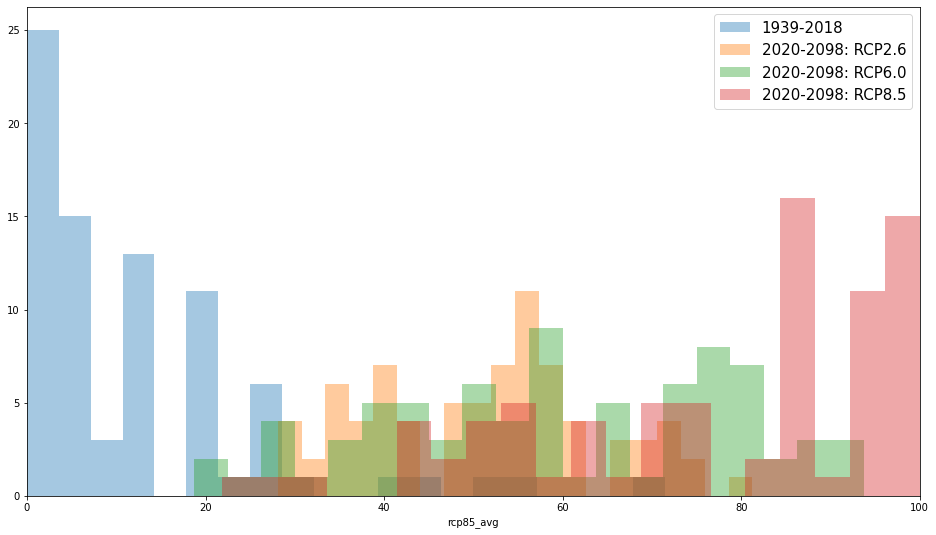

In [63]:
graph.figure(figsize=(16,9))
sns.distplot(years_climate['proportion'], label='1939-2018', kde=False, bins=20)
sns.distplot(predicted_totals['rcp26_avg'], label='2020-2098: RCP2.6', kde=False, bins=20)
sns.distplot(predicted_totals['rcp60_avg'], label='2020-2098: RCP6.0', kde=False, bins=20)
sns.distplot(predicted_totals['rcp85_avg'], label='2020-2098: RCP8.5', kde=False, bins=20)
graph.xlim(0, 100)
graph.legend(fontsize=15)
graph.show()

In [29]:
stats.ks_2samp(predicted_totals['rcp26_avg'], predicted_totals['rcp60_avg'])

Ks_2sampResult(statistic=0.27848101265822783, pvalue=0.004190220170180564)

In [64]:
kev_sum_indiv_lakes['George']

GFDL-ESM2M_rcp26      17
GFDL-ESM2M_rcp60      30
GFDL-ESM2M_rcp85      47
HadGEM2-ES_rcp26      48
HadGEM2-ES_rcp60      50
HadGEM2-ES_rcp85      66
IPSL-CM5A-LR_rcp26    29
IPSL-CM5A-LR_rcp60    36
IPSL-CM5A-LR_rcp85    57
MIROC5_rcp26          36
MIROC5_rcp60          50
MIROC5_rcp85          67
Name: George, dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc24641e910>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc2461f4210>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc24641e6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc245e5b350>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc245e5b6d0>],
 'means': []}

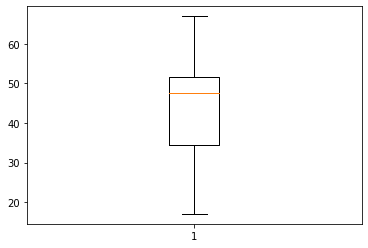

In [65]:
graph.boxplot(kev_sum_indiv_lakes['George'])

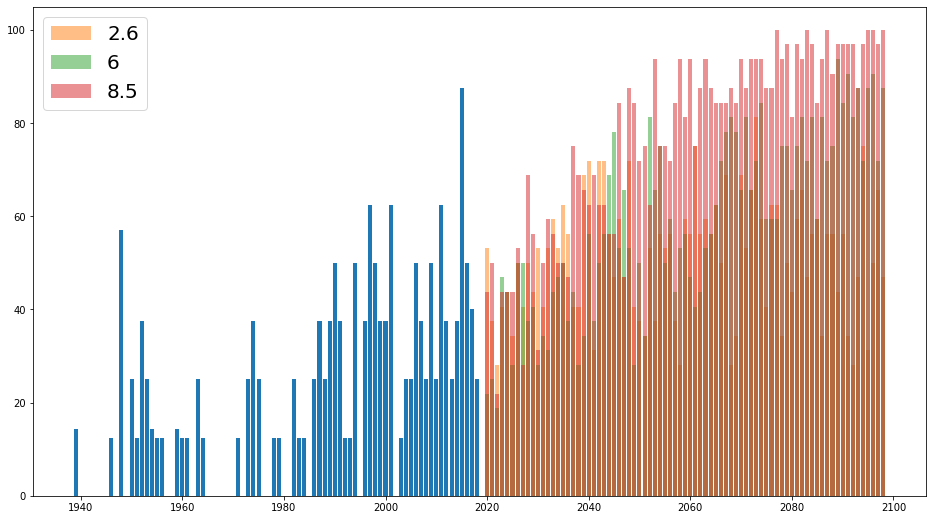

In [66]:
graph.figure(figsize=(16,9))
graph.bar(years_climate_predicted['start_year'], years_climate_predicted['proportion'])
graph.bar(predicted_totals['start_year'], predicted_totals['rcp26_avg'], label='2.6', alpha=0.5)
graph.bar(predicted_totals['start_year'], predicted_totals['rcp60_avg'], label='6', alpha=0.5)
graph.bar(predicted_totals['start_year'], predicted_totals['rcp85_avg'], label='8.5', alpha=0.5)
graph.legend(fontsize=20)
graph.show()

In [67]:
historical_data_8_lakes = years_climate_predicted[['start_year', 'no_freeze_count','proportion']]
# predict_data = predicted_totals[['start_year', 'rcp26_avg', 'rcp60_avg']]
display(historical_data_8_lakes.head())

,start_year,no_freeze_count,proportion
0,1939,1,14.285714
1,1940,0,0.000000
2,1941,0,0.000000
3,1942,0,0.000000
4,1943,0,0.000000


In [68]:
all_prop_data_8_lakes = historical_data_8_lakes.append(predicted_totals, sort=False)

climate_scenarios_columns = [col for col in all_prop_data_8_lakes if 'rcp' in col]

for col in climate_scenarios_columns:
    all_prop_data_8_lakes[col].fillna(all_prop_data_8_lakes['proportion'], inplace=True)

display(all_prop_data_8_lakes)

,start_year,no_freeze_count,proportion,GFDL-ESM2M_rcp26,GFDL-ESM2M_rcp60,GFDL-ESM2M_rcp85,HadGEM2-ES_rcp26,HadGEM2-ES_rcp60,HadGEM2-ES_rcp85,IPSL-CM5A-LR_rcp26,IPSL-CM5A-LR_rcp60,IPSL-CM5A-LR_rcp85,MIROC5_rcp26,MIROC5_rcp60,MIROC5_rcp85,rcp26_avg,rcp60_avg,rcp85_avg
0,1939,1.0,14.285714,14.285714,14.285714,14.285714,14.285714,14.285714,14.285714,14.285714,14.285714,14.285714,14.285714,14.285714,14.285714,14.285714,14.285714,14.285714
1,1940,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1941,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1942,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1943,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,2094,NaN,NaN,37.500000,25.000000,87.500000,100.000000,100.000000,100.000000,87.500000,62.500000,100.000000,75.000000,100.000000,100.000000,75.000000,71.875000,96.875000
75,2095,NaN,NaN,12.500000,87.500000,100.000000,75.000000,87.500000,100.000000,25.000000,87.500000,100.000000,12.500000,87.500000,100.000000,31.250000,87.500000,100.000000
76,2096,NaN,NaN,25.000000,87.500000,100.000000,100.000000,87.500000,100.000000,37.500000,87.500000,100.000000,37.500000,100.000000,100.000000,50.000000,90.625000,100.000000
77,2097,NaN,NaN,12.500000,12.500000,87.500000,87.500000,100.000000,100.000000,87.500000,87.500000,100.000000,75.000000,87.500000,100.000000,65.625000,71.875000,96.875000


In [69]:
rol_mean_26_GFDL = all_prop_data_8_lakes['GFDL-ESM2M_rcp26'].rolling(window=20).mean()
rol_mean_26_HADGEM = all_prop_data_8_lakes['HadGEM2-ES_rcp26'].rolling(window=20).mean()
rol_mean_26_IPSL = all_prop_data_8_lakes['IPSL-CM5A-LR_rcp26'].rolling(window=20).mean()
rol_mean_26_MIROC = all_prop_data_8_lakes['MIROC5_rcp26'].rolling(window=20).mean()
rol_mean_26_avg = all_prop_data_8_lakes['rcp26_avg'].rolling(window=20).mean()

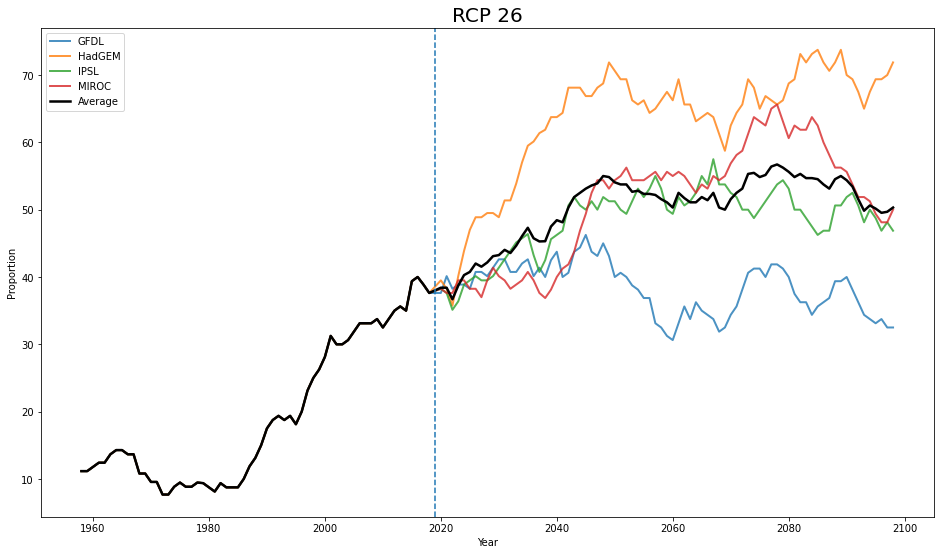

In [70]:
alpha_val = 0.8
line_width = 2

graph.figure(figsize=(16,9))
graph.title('RCP 26', fontsize=20)
# graph.bar(all_prop_data_8_lakes['start_year'], all_prop_data_8_lakes['rcp26_avg'], label='Normal', alpha=0.2)
graph.plot(all_prop_data_8_lakes['start_year'], rol_mean_26_GFDL, label='GFDL', alpha=alpha_val, linewidth = line_width)
graph.plot(all_prop_data_8_lakes['start_year'], rol_mean_26_HADGEM, label='HadGEM', alpha=alpha_val, linewidth = line_width)
graph.plot(all_prop_data_8_lakes['start_year'], rol_mean_26_IPSL, label='IPSL', alpha=alpha_val, linewidth = line_width)
graph.plot(all_prop_data_8_lakes['start_year'], rol_mean_26_MIROC, label='MIROC', alpha=alpha_val, linewidth = line_width)
graph.plot(all_prop_data_8_lakes['start_year'], rol_mean_26_avg, label='Average', alpha=1, linewidth = 2.5, color='black')
graph.axvline(2019, linestyle='--')
graph.legend()
graph.ylabel('Proportion')
graph.xlabel('Year')
graph.show()

In [71]:
rol_mean_60_GFDL = all_prop_data_8_lakes['GFDL-ESM2M_rcp60'].rolling(window=20).mean()
rol_mean_60_HADGEM = all_prop_data_8_lakes['HadGEM2-ES_rcp60'].rolling(window=20).mean()
rol_mean_60_IPSL = all_prop_data_8_lakes['IPSL-CM5A-LR_rcp60'].rolling(window=20).mean()
rol_mean_60_MIROC = all_prop_data_8_lakes['MIROC5_rcp60'].rolling(window=20).mean()
rol_mean_60_avg = all_prop_data_8_lakes['rcp60_avg'].rolling(window=20).mean()

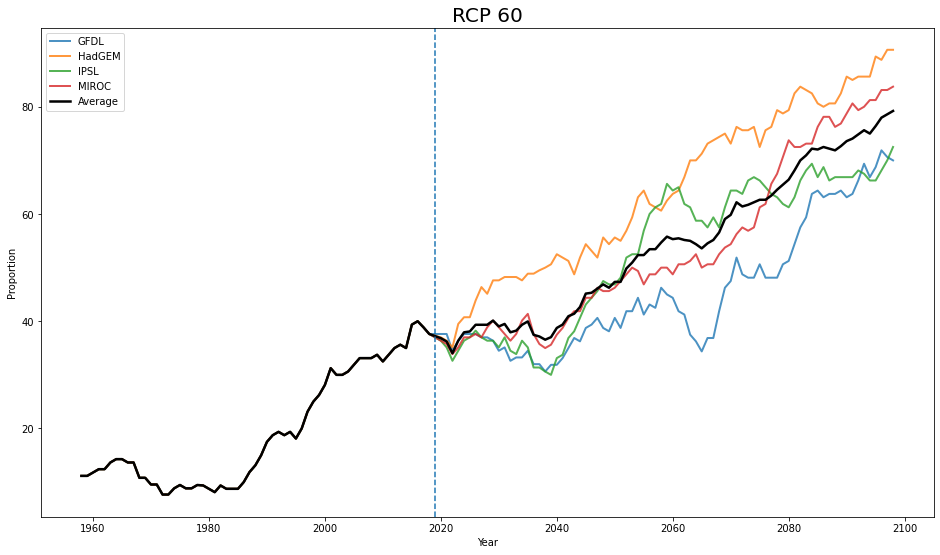

In [72]:
alpha_val = 0.8
line_width = 2

graph.figure(figsize=(16,9))
graph.title('RCP 60', fontsize=20)
# graph.bar(all_prop_data_8_lakes['start_year'], all_prop_data_8_lakes['rcp60_avg'], label='Normal', alpha=0.2)
graph.plot(all_prop_data_8_lakes['start_year'], rol_mean_60_GFDL, label='GFDL', alpha=alpha_val, linewidth = line_width)
graph.plot(all_prop_data_8_lakes['start_year'], rol_mean_60_HADGEM, label='HadGEM', alpha=alpha_val, linewidth = line_width)
graph.plot(all_prop_data_8_lakes['start_year'], rol_mean_60_IPSL, label='IPSL', alpha=alpha_val, linewidth = line_width)
graph.plot(all_prop_data_8_lakes['start_year'], rol_mean_60_MIROC, label='MIROC', alpha=alpha_val, linewidth = line_width)
graph.plot(all_prop_data_8_lakes['start_year'], rol_mean_60_avg, label='Average', alpha=1, linewidth = 2.5, color='black')
graph.axvline(2019, linestyle='--')
graph.legend()
graph.ylabel('Proportion')
graph.xlabel('Year')
graph.show()

In [73]:
rol_mean_85_GFDL = all_prop_data_8_lakes['GFDL-ESM2M_rcp85'].rolling(window=20).mean()
rol_mean_85_HADGEM = all_prop_data_8_lakes['HadGEM2-ES_rcp85'].rolling(window=20).mean()
rol_mean_85_IPSL = all_prop_data_8_lakes['IPSL-CM5A-LR_rcp85'].rolling(window=20).mean()
rol_mean_85_MIROC = all_prop_data_8_lakes['MIROC5_rcp85'].rolling(window=20).mean()
rol_mean_85_avg = all_prop_data_8_lakes['rcp85_avg'].rolling(window=20).mean()

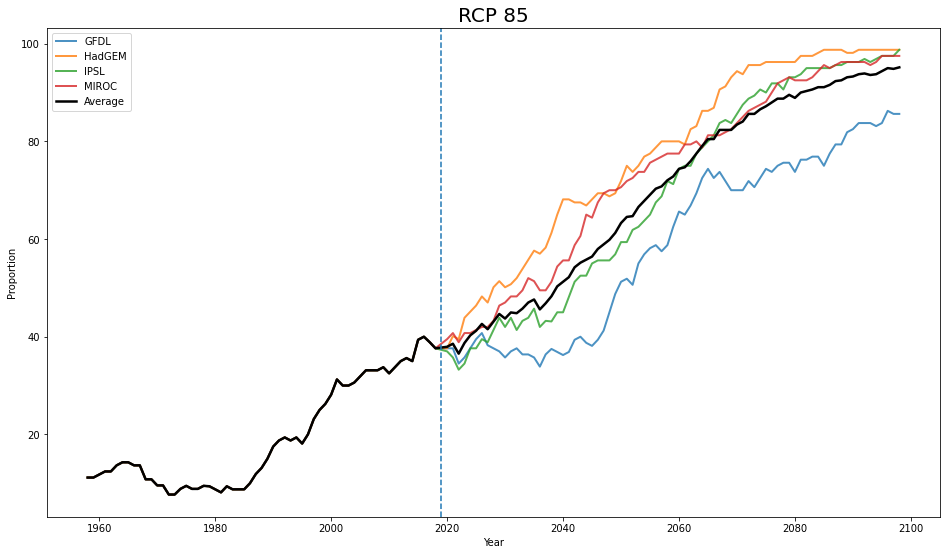

In [74]:
alpha_val = 0.8
line_width = 2

graph.figure(figsize=(16,9))
graph.title('RCP 85', fontsize=20)
# graph.bar(all_prop_data_8_lakes['start_year'], all_prop_data_8_lakes['rcp85_avg'], label='Normal', alpha=0.2)
graph.plot(all_prop_data_8_lakes['start_year'], rol_mean_85_GFDL, label='GFDL', alpha=alpha_val, linewidth = line_width)
graph.plot(all_prop_data_8_lakes['start_year'], rol_mean_85_HADGEM, label='HadGEM', alpha=alpha_val, linewidth = line_width)
graph.plot(all_prop_data_8_lakes['start_year'], rol_mean_85_IPSL, label='IPSL', alpha=alpha_val, linewidth = line_width)
graph.plot(all_prop_data_8_lakes['start_year'], rol_mean_85_MIROC, label='MIROC', alpha=alpha_val, linewidth = line_width)
graph.plot(all_prop_data_8_lakes['start_year'], rol_mean_85_avg, label='Average', alpha=1, linewidth = 2.5, color='black')
graph.axvline(2019, linestyle='--')
graph.legend()
graph.ylabel('Proportion')
graph.xlabel('Year')
graph.show()

In [75]:
# alpha_val = 0.5
# line_width = 3

# years_value = np.arange(1950, 2100)
# years_interval = []

# for year in years_value:
#     years_interval.append(year)
#     df = all_prop_data_8_lakes[all_prop_data_8_lakes['start_year'].isin(years_interval)]

#     graph.figure(figsize=(16,9))
#     graph.title('RCP averages', fontsize=20)
#     avg_26 = rol_mean_26_avg[:len(df)]
#     avg_60 = rol_mean_60_avg[:len(df)]
#     avg_85 = rol_mean_85_avg[:len(df)]

#     graph.plot(df['start_year'], avg_26, label='Average RCP 2.6', alpha=alpha_val, linewidth = line_width)
#     graph.plot(df['start_year'], avg_60, label='Average RCP 6.0', alpha=alpha_val, linewidth = line_width)
#     graph.plot(df['start_year'], avg_85, label='Average RCP 8.5', alpha=alpha_val, linewidth = line_width)
#     graph.axvline(2019, linestyle='--')
#     graph.legend(fontsize=15)
#     graph.ylabel('Proportion')
#     graph.xlabel('Year')
#     graph.show()

In [76]:
rol_mean_all_historical = years_climate['proportion'].rolling(window=20).mean()

In [80]:
rol_mean_26_avg

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
        ...   
74    50.62500
75    50.15625
76    49.53125
77    49.68750
78    50.31250
Name: rcp26_avg, Length: 159, dtype: float64

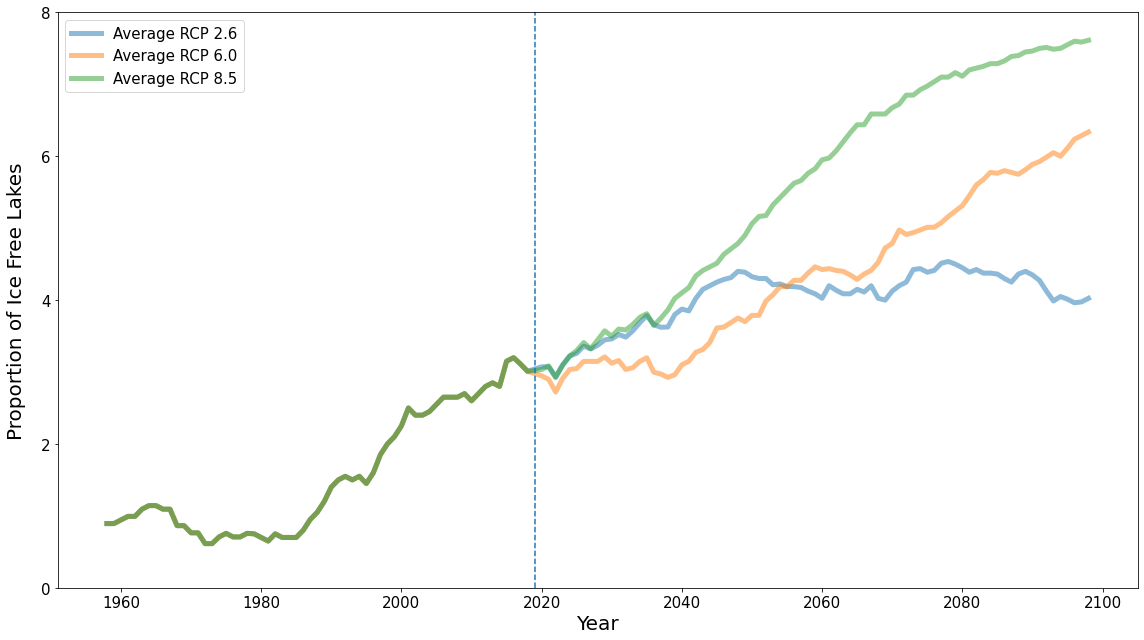

In [87]:
alpha_val = 0.5
line_width = 5

graph.figure(figsize=(16,9))
# graph.title('RCP averages', fontsize=20)
# graph.plot(years_climate['start_year'], rol_mean_all_historical, label='All Historical', alpha=alpha_val, 
#            linewidth = line_width)
graph.plot(all_prop_data_8_lakes['start_year'], rol_mean_26_avg/100*8, label='Average RCP 2.6', alpha=alpha_val, 
           linewidth = line_width)
graph.plot(all_prop_data_8_lakes['start_year'], rol_mean_60_avg/100*8, label='Average RCP 6.0', alpha=alpha_val, 
           linewidth = line_width)
graph.plot(all_prop_data_8_lakes['start_year'], rol_mean_85_avg/100*8, label='Average RCP 8.5', alpha=alpha_val, 
           linewidth = line_width)
graph.axvline(2019, linestyle='--')
graph.legend(fontsize=15)
graph.yticks([0, 2, 4, 6, 8], fontsize=15)
graph.ylabel('Proportion of Ice Free Lakes', fontsize=20, labelpad=15)
graph.xticks(fontsize=15)
graph.xlabel('Year', fontsize=20)
graph.tight_layout()
graph.savefig('/mnt/c/users/imrit/Downloads/Sapna_sharma_lab/Extreme_events/Graphs/rcp_averages_aug_09_2020.pdf', 
              bbox_inches='tight')
graph.show()

In [38]:
exp_mean_26_5 = all_prop_data_8_lakes['rcp26_avg'].ewm(span=5, adjust=False).mean()
exp_mean_26_10 = all_prop_data_8_lakes['rcp26_avg'].ewm(span=10, adjust=False).mean()
exp_mean_26_20 = all_prop_data_8_lakes['rcp26_avg'].ewm(span=20, adjust=False).mean()
exp_mean_26_30 = all_prop_data_8_lakes['rcp26_avg'].ewm(span=30, adjust=False).mean()
exp_mean_26_40 = all_prop_data_8_lakes['rcp26_avg'].ewm(span=40, adjust=False).mean()
exp_mean_26_50 = all_prop_data_8_lakes['rcp26_avg'].ewm(span=50, adjust=False).mean()

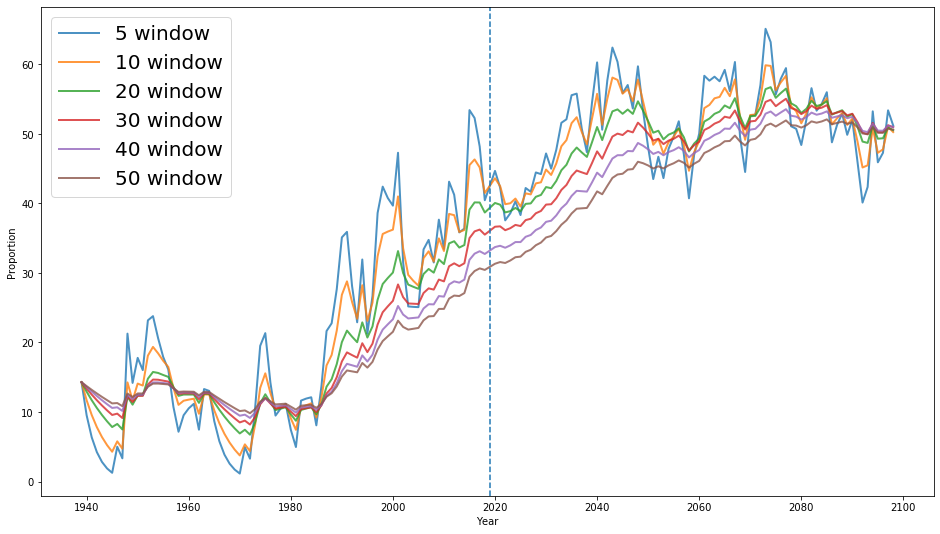

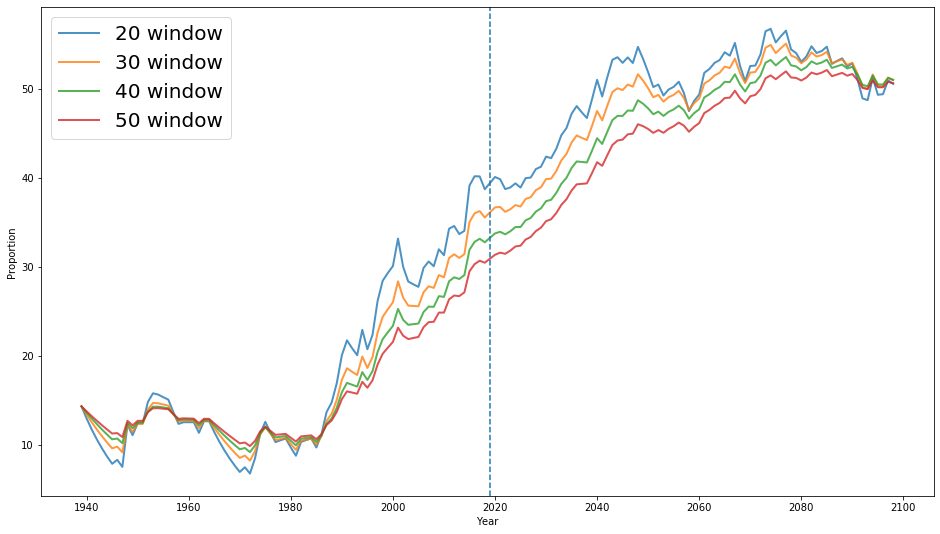

In [39]:
alpha_val = 0.8
line_width = 2

graph.figure(figsize=(16,9))
# graph.plot(all_prop_data_8_lakes['start_year'], all_prop_data_8_lakes['rcp26_avg'], label='Normal', alpha=alpha_val)
graph.plot(all_prop_data_8_lakes['start_year'], exp_mean_26_5, label='5 window', alpha=alpha_val, linewidth = line_width)
graph.plot(all_prop_data_8_lakes['start_year'], exp_mean_26_10, label='10 window', alpha=alpha_val, linewidth = line_width)
graph.plot(all_prop_data_8_lakes['start_year'], exp_mean_26_20, label='20 window', alpha=alpha_val, linewidth = line_width)
graph.plot(all_prop_data_8_lakes['start_year'], exp_mean_26_30, label='30 window', alpha=alpha_val, linewidth = line_width)
graph.plot(all_prop_data_8_lakes['start_year'], exp_mean_26_40, label='40 window', alpha=alpha_val, linewidth = line_width)
graph.plot(all_prop_data_8_lakes['start_year'], exp_mean_26_50, label='50 window', alpha=alpha_val, linewidth = line_width)
graph.axvline(2019, linestyle='--')
graph.legend(fontsize=20)
graph.ylabel('Proportion')
graph.xlabel('Year')
graph.show()

graph.figure(figsize=(16,9))
graph.plot(all_prop_data_8_lakes['start_year'], exp_mean_26_20, label='20 window', alpha=alpha_val, linewidth = line_width)
graph.plot(all_prop_data_8_lakes['start_year'], exp_mean_26_30, label='30 window', alpha=alpha_val, linewidth = line_width)
graph.plot(all_prop_data_8_lakes['start_year'], exp_mean_26_40, label='40 window', alpha=alpha_val, linewidth = line_width)
graph.plot(all_prop_data_8_lakes['start_year'], exp_mean_26_50, label='50 window', alpha=alpha_val, linewidth = line_width)
graph.axvline(2019, linestyle='--')
graph.legend(fontsize=20)
graph.ylabel('Proportion')
graph.xlabel('Year')
graph.show()

# Further analysis

In [2]:
ice_free_lakes = pd.read_csv('/mnt/c/Users/imrit/Downloads/Sapna_sharma_lab/Extreme_events/Data/IceFreeLakes_v1.3.1.csv')
print(len(ice_free_lakes))
display(ice_free_lakes.head())

# for lake in ice_free_lakes['lake'].unique():
#     df = ice_free_lakes[ice_free_lakes['lake'] == lake]
#     df.to_csv(f'/mnt/c/Users/imrit/Downloads/Sapna_sharma_lab/Extreme_events/Data/Lakes/{lake}.csv', index=False)

5446


,lake,lakecode,start_year,FrozeYN,Latitude,Longitude,Hylak_id,Lake_name,Country,Continent,...,cld_lagSON,cld_DJF,cld_MAM,IceFree,log_Shore_dev,log_Elevation,log_Vol_total,log_Lake_area,log_Depth_avg,log_Shore_len
0,Lake Suwa,ARAI1,1443,Y,36.05,138.08,14842,NaN,Japan,Asia,...,NaN,NaN,NaN,0.0,0.075547,2.877947,1.999218,1.103804,0.897627,1.177825
1,Lake Suwa,ARAI1,1444,Y,36.05,138.08,14842,NaN,Japan,Asia,...,NaN,NaN,NaN,0.0,0.075547,2.877947,1.999218,1.103804,0.897627,1.177825
2,Lake Suwa,ARAI1,1445,Y,36.05,138.08,14842,NaN,Japan,Asia,...,NaN,NaN,NaN,0.0,0.075547,2.877947,1.999218,1.103804,0.897627,1.177825
3,Lake Suwa,ARAI1,1446,Y,36.05,138.08,14842,NaN,Japan,Asia,...,NaN,NaN,NaN,0.0,0.075547,2.877947,1.999218,1.103804,0.897627,1.177825
4,Lake Suwa,ARAI1,1447,Y,36.05,138.08,14842,NaN,Japan,Asia,...,NaN,NaN,NaN,0.0,0.075547,2.877947,1.999218,1.103804,0.897627,1.177825


### Number No freeze per lakes

In [3]:
path = '/mnt/c/Users/imrit/Downloads/Sapna_sharma_lab/Extreme_events/Data/Lakes/'
dfs = []

for file in os.listdir(path):
    df = pd.read_csv(f'{path}{file}')
    lake_name = df['lake'].unique()[0]
    start_year, last_year, length_data = df['start_year'].iloc[0], df['start_year'].iloc[-1], len(df)
    number_no_freeze = (df['FrozeYN'].values == 'N').sum()
    dfs.append([lake_name, start_year, last_year, length_data, number_no_freeze])

In [4]:
lakes_number_no_freeze = pd.DataFrame(dfs).sort_values(by=1)
lakes_number_no_freeze.rename(columns={0: 'lake_name', 1: 'start_year', 2: 'end_year', 3: 'length_data', 
                                       4: 'number_no_freeze'}, inplace=True)
display(lakes_number_no_freeze)
# lakes_number_no_freeze.to_csv('/mnt/c/Users/imrit/Downloads/Sapna_sharma_lab/Extreme_events/Results/lakes_number_no_freeze_june_18_2020.csv', 
#                               index=False)

,lake_name,start_year,end_year,length_data,number_no_freeze
6,Constance,874,2016,1143,1108
19,Lake Suwa,1443,2018,576,53
26,Ransfjorden,1757,2016,260,10
28,Sebago Lake,1806,2018,213,14
14,LAKE CHAMPLAIN,1815,2018,204,42
23,Oneida Lake,1826,2018,193,1
24,Otsego,1842,2018,177,3
7,Grand Traverse Bay,1850,2016,167,44
2,Bayfield,1857,2018,162,4
15,LAKE GENEVA,1862,2018,157,4


### Proportion Ice Free

In [7]:
non_freeze = ice_free_lakes[ice_free_lakes['FrozeYN'] == 'N']

indices = np.arange(ice_free_lakes['start_year'].min(), ice_free_lakes['start_year'].max()+1)

no_freeze_freq = pd.DataFrame(non_freeze['start_year'].value_counts().reindex(index=indices, fill_value=0).sort_index())
all_years_counts = pd.DataFrame(ice_free_lakes['start_year'].value_counts().sort_index())

year_counts = pd.merge(no_freeze_freq, all_years_counts, left_index=True, right_index=True)
year_counts.reset_index(level=0, inplace=True)

year_counts.rename(columns={'index': 'start_year', 'start_year_x': 'number_no_freeze_lakes', 
                            'start_year_y': 'number_lakes'}, 
                   inplace=True)
year_counts['proportion'] = year_counts['number_no_freeze_lakes'] / year_counts['number_lakes'] * 100
display(year_counts.head(), year_counts.tail(10))
# year_counts.to_csv('/mnt/c/Users/imrit/Downloads/Sapna_sharma_lab/Extreme_events/Results/proportion_no_freeze_permanent_ice_loss_june_18_2020.csv', 
#                    index=False)

,start_year,number_no_freeze_lakes,number_lakes,proportion
0,874,0,1,0.0
1,875,1,1,100.0
2,876,1,1,100.0
3,877,1,1,100.0
4,878,1,1,100.0


,start_year,number_no_freeze_lakes,number_lakes,proportion
1135,2009,14,28,50.000000
1136,2010,11,28,39.285714
1137,2011,14,28,50.000000
1138,2012,13,28,46.428571
1139,2013,15,28,53.571429
1140,2014,13,28,46.428571
1141,2015,18,28,64.285714
1142,2016,15,28,53.571429
1143,2017,12,22,54.545455
1144,2018,10,20,50.000000


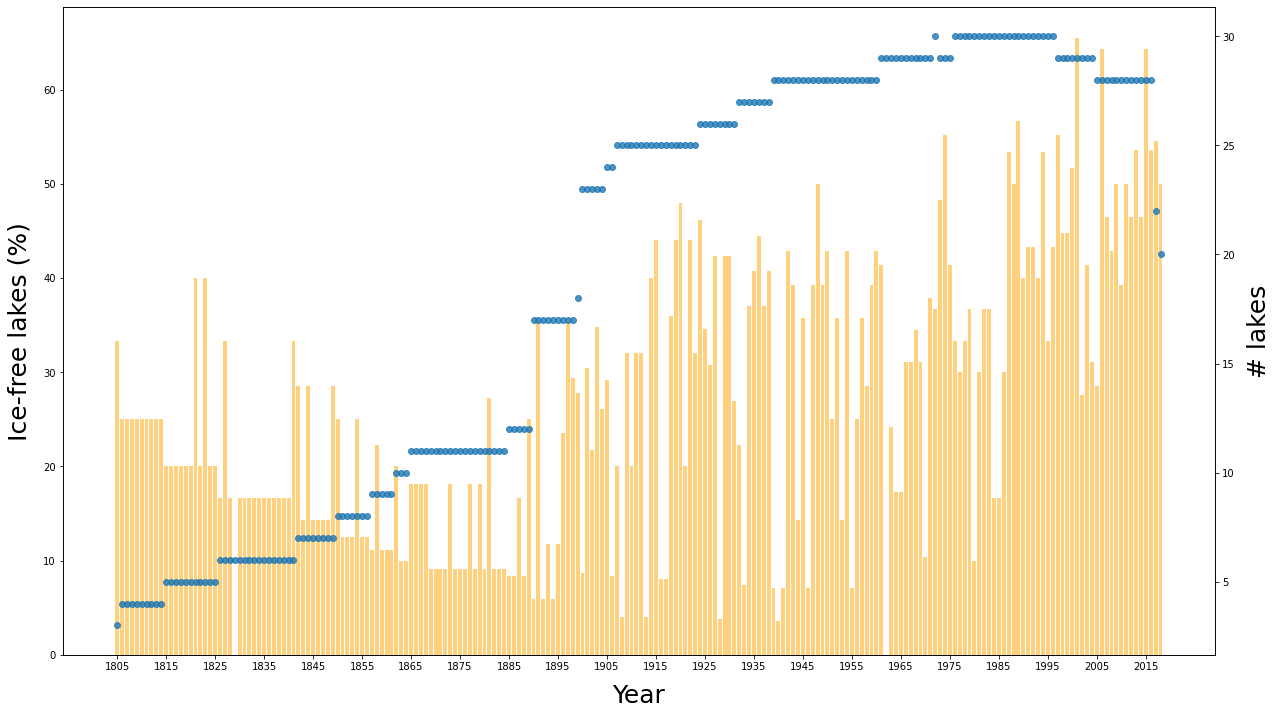

In [8]:
fig = graph.figure(figsize=(16,9))

ax1 = fig.add_axes([0, 0, 1, 1])
ax2 = fig.add_axes()
ax2 = ax1.twinx()

year_threshold = 1805
df_yr_subset = year_counts.loc[year_counts['start_year'] >= year_threshold]

ax1.bar(df_yr_subset['start_year'], df_yr_subset['proportion'], color='orange', alpha=0.5)
ax2.scatter(df_yr_subset['start_year'], df_yr_subset['number_lakes'], alpha=0.8)
ax1.set_ylabel('Ice-free lakes (%)', fontsize=25, labelpad=12)
ax2.set_ylabel('# lakes', fontsize=25, labelpad=12)
graph.xticks(np.arange(df_yr_subset['start_year'].min(), df_yr_subset['start_year'].max(), 10), fontsize=15)
ax1.set_xlabel('Year', fontsize=25, labelpad=12)
# graph.tight_layout()
graph.xticks(fontsize=20)
graph.savefig('/mnt/c/Users/imrit/Downloads/Sapna_sharma_lab/Extreme_events/Results/proportion_non_freeze_june_18_2020.png', bbox_inches='tight')
graph.show()